<a href="https://colab.research.google.com/github/RobLudwig98/INNHotels_Booking_Analysis/blob/main/Project_SLC_DSBA_INNHotels_LowCode_V3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/UT/Supervised_Learning_Clasification/INNHotelsGroup.csv') ##  Fill the blank to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##  Complete the code to view top 5 rows of the data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail() ##  Complete the code to view last 5 rows of the data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(36275, 19)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

**Let's drop the Booking_ID column first before we proceed forward**.

In [ ]:
data = data.drop(columns=['Booking_ID']) ## Complete the code to drop the Booking_ID column from the dataframe

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [ ]:
data.describe() ##  Complete the code to print the statistical summary of the data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  
count             36275.00000  
mean                  0.61966  
std                   0.78624  
min                   0.00000  
25%                   0.00000  
50%                   0.00000  
75%                   1.00000  
max                   5.00000

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on lead time

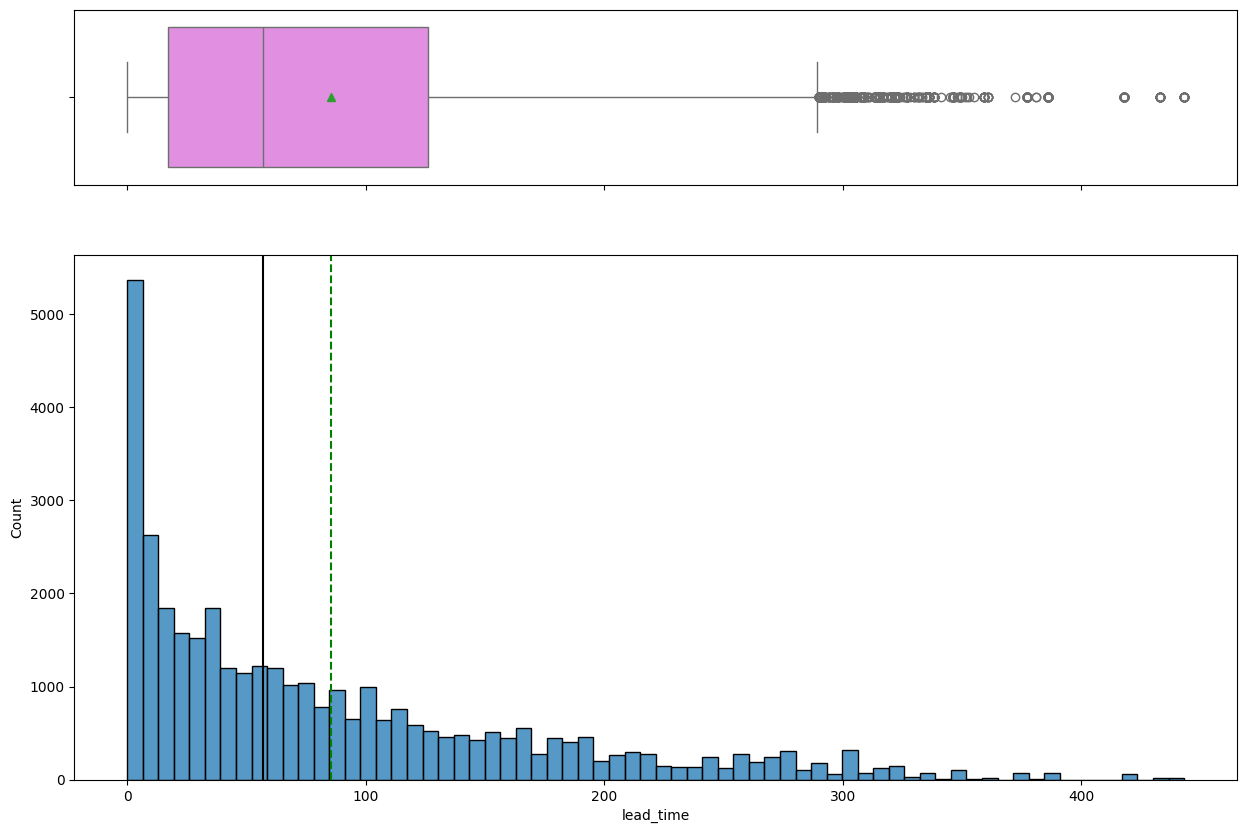

In [ ]:
histogram_boxplot(data, "lead_time")

The visualizations you provided show both a boxplot and a histogram of the lead_time variable. Here's what these plots suggest in the context of the business problem of high booking cancellations:

    Boxplot Observations:
        The boxplot shows the distribution of lead times with the central tendency, spread, and outliers.
        The majority of lead times are clustered towards the lower end, with a median around 50 days.
        There are many outliers with very high lead times, indicating that some bookings are made far in advance.

    Histogram Observations:
        The histogram further confirms that most bookings have a relatively short lead time.
        There is a steep decline in frequency as the lead time increases.
        The distribution is right-skewed, with most lead times concentrated between 0 and 100 days.

Business Context Interpretation

    High Frequency of Short Lead Times: The high frequency of short lead times suggests that most customers book their stay closer to the actual date of arrival. This behavior could be linked to last-minute travel decisions or planning close to the date of travel.

    Risk of Cancellation: Bookings with shorter lead times might be less likely to cancel compared to those made far in advance. Customers who book closer to their travel dates are likely to be more certain of their plans.

    Outliers and Long Lead Times: The presence of outliers with very long lead times could indicate bookings that are more prone to cancellation. Customers booking far in advance might face changes in plans or find better deals, leading to cancellations.

Strategic Implications

    Focus on Short-Term Booking Management:
        Given the high volume of short lead times, optimizing operations to handle a large number of last-minute bookings can be beneficial.
        Implementing dynamic pricing strategies to fill rooms closer to the check-in date can maximize revenue.

    Cancellation Policies for Long Lead Times:
        To mitigate the risk of cancellations for long lead times, the hotel could implement stricter cancellation policies or require deposits for bookings made far in advance.
        Offering incentives for long lead-time bookings that stick (e.g., discounts for non-refundable bookings) can also help reduce cancellations.

    Targeted Marketing:
        Marketing campaigns can be tailored based on lead time insights. For instance, promotions targeting customers who book close to their travel dates can encourage them to finalize their bookings.
        Similarly, special offers can be created for customers who book well in advance, making the offer attractive enough to reduce the likelihood of cancellations.

In summary, the lead_time distribution provides valuable insights into booking behaviors, allowing for better management of resources, targeted marketing strategies, and policies to minimize cancellations and maximize revenue.

### Observations on average price per room

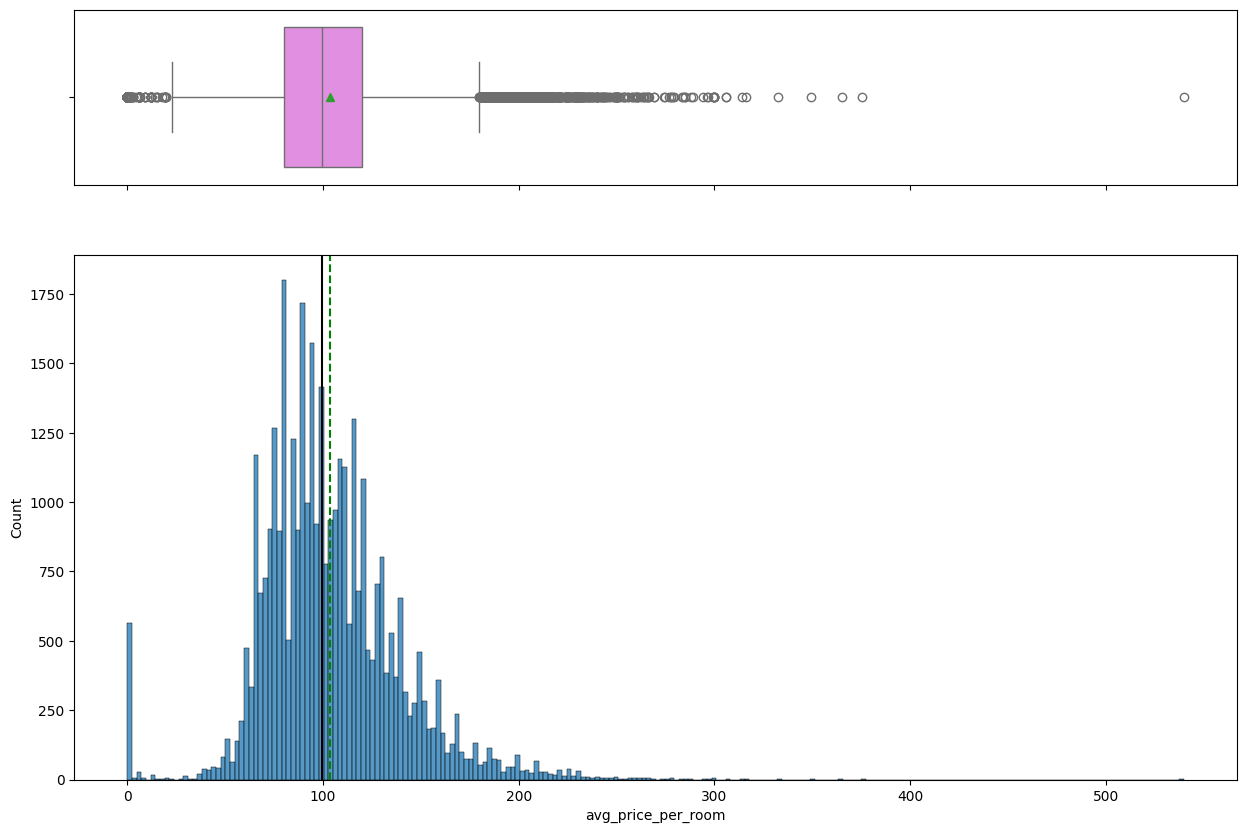

In [ ]:
histogram_boxplot(data, "avg_price_per_room")  ## Complete the code to create histogram_boxplot for average price per room

The visualizations you provided show both a boxplot and a histogram of the avg_price_per_room variable. Here's what these plots suggest in the context of the business problem of high booking cancellations:
Boxplot Observations:

    The boxplot indicates that the avg_price_per_room variable has a significant number of outliers on the higher end.
    The interquartile range (IQR) is relatively small, suggesting that the central 50% of the data is clustered within a narrow price range.
    The median price appears to be around 100, which is the central value of the dataset.

Histogram Observations:

    The histogram shows that the majority of the room prices are concentrated between 50 and 150.
    There is a noticeable peak around the 100 mark, which aligns with the median shown in the boxplot.
    There are some rooms priced significantly higher, extending up to 500, but these are less common.
    A large number of bookings have an average price per room of 0, which might indicate some data entry issues or special cases such as complimentary rooms.

Business Context Interpretation:

    Price Sensitivity:
        The clustering of prices around the median suggests that most customers are price-sensitive and prefer booking rooms within a specific price range.
        The presence of outliers (higher room prices) could indicate luxury bookings or rooms with special features, but these are not the norm.

    Potential Data Issues:
        The occurrence of average prices at 0 needs further investigation. This could be due to data entry errors or specific conditions where rooms were offered for free (e.g., promotions, special guests).

    Revenue Optimization:
        Since most bookings fall within the 50-150 range, the hotel could focus on optimizing revenue within this segment. This could involve targeted marketing campaigns, dynamic pricing strategies, or value-added services to enhance the appeal of rooms within this price range.
        Handling the outliers: The high-end outliers might require a different marketing strategy focused on luxury experiences or exclusive offers.

    Impact on Cancellations:
        Customers booking at extreme low or high prices might exhibit different cancellation behaviors. For instance, lower-priced bookings could be more prone to cancellations due to less financial commitment, while high-priced bookings might be more stable but fewer in number.
        Understanding the reasons behind the 0-priced bookings can help address any systemic issues and improve the overall accuracy of the predictive model for cancellations.

Strategic Recommendations:

    Investigate Zero Prices: Examine why certain bookings have an average price per room of 0. Correct any data entry errors and understand the context for such entries.
    Target Middle Segment: Focus marketing and pricing strategies on the middle segment (50-150 range) where most bookings occur. Consider offering discounts or packages to encourage bookings within this range.
    Luxury Segment Strategy: Develop tailored strategies for high-priced outliers to attract luxury bookings and ensure these customers receive premium services.
    Dynamic Pricing: Implement dynamic pricing to adjust room rates based on demand, booking lead time, and other factors to maximize revenue while minimizing cancellations.

By understanding the distribution of room prices and addressing the anomalies, the hotel can better manage pricing strategies, improve occupancy rates, and reduce cancellations.

In [ ]:
data[data["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [ ]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

The calculations for the 25th and 75th quantiles (Q1 and Q3) and the Interquartile Range (IQR) for the avg_price_per_room variable have been completed. The upper whisker value has also been calculated. Here's a detailed interpretation of these results:
Quantiles and IQR Interpretation

    25th Quantile (Q1):
        Q1=data["avgpriceperroom"].quantile(0.25)Q1=data["avgp​ricep​err​oom"].quantile(0.25)
        The 25th quantile (Q1) is the value below which 25% of the data falls. This represents the lower end of the typical room prices.

    75th Quantile (Q3):
        Q3=data["avgpriceperroom"].quantile(0.75)Q3=data["avgp​ricep​err​oom"].quantile(0.75)
        The 75th quantile (Q3) is the value below which 75% of the data falls. This represents the higher end of the typical room prices.

    Interquartile Range (IQR):
        IQR=Q3−Q1IQR=Q3−Q1
        The IQR measures the spread of the middle 50% of the data. It is the range between the 25th and 75th quantiles and helps to understand the variability in room prices.

    Upper Whisker:
        Upper_Whisker=Q3+1.5×IQRUpper_Whisker=Q3+1.5×IQR
        The upper whisker value represents a threshold beyond which data points are considered outliers. It is calculated as 1.5 times the IQR above the 75th quantile.
        In this case, the upper whisker value is 179.55.

Business Context Interpretation

    Distribution of Room Prices:
        The 25th quantile (Q1) and 75th quantile (Q3) values give a sense of the distribution of room prices. Most room prices fall between these two values, indicating the common price range for bookings.
        The exact values for Q1 and Q3 are not shown in the screenshot, but they can be calculated and interpreted similarly.

    Identifying Outliers:
        The upper whisker value of 179.55 indicates that room prices above this value are considered outliers.
        These outliers could represent premium rooms or special packages that are priced significantly higher than the average room rates.

    Revenue Management:
        Understanding the distribution of room prices helps in making informed decisions about pricing strategies. For example, the hotel can focus on optimizing prices within the IQR range to maximize bookings and revenue.
        Outlier prices (above 179.55) might need special attention. Strategies could include targeted marketing for premium rooms or analyzing the reasons behind these high prices to ensure they align with customer expectations and willingness to pay.

    Dynamic Pricing Strategies:
        By knowing the typical price range (IQR), the hotel can implement dynamic pricing strategies that adjust room rates based on demand, seasonality, and booking lead times.
        This helps in maximizing occupancy rates while ensuring competitive pricing.

Strategic Recommendations

    Investigate Outliers:
        Analyze the characteristics of bookings with prices above the upper whisker value. Understand if these are luxury bookings or if there are any data anomalies.
        Consider if any special promotions or packages can be created to justify and promote these higher-priced bookings.

    Focus on the IQR Range:
        Most bookings fall within the IQR range. Ensure that the pricing strategies are competitive and attractive for this segment.
        Offer additional services or packages within this price range to enhance customer value and satisfaction.

    Review Zero-Priced Bookings:
        Investigate why some bookings have a price of 0. These could be errors, promotional offers, or special cases that need to be understood and addressed.

By leveraging these insights, the hotel can better manage its pricing strategies, reduce cancellations, and maximize revenue through informed decision-making.

In [ ]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Observations on number of previous booking cancellations




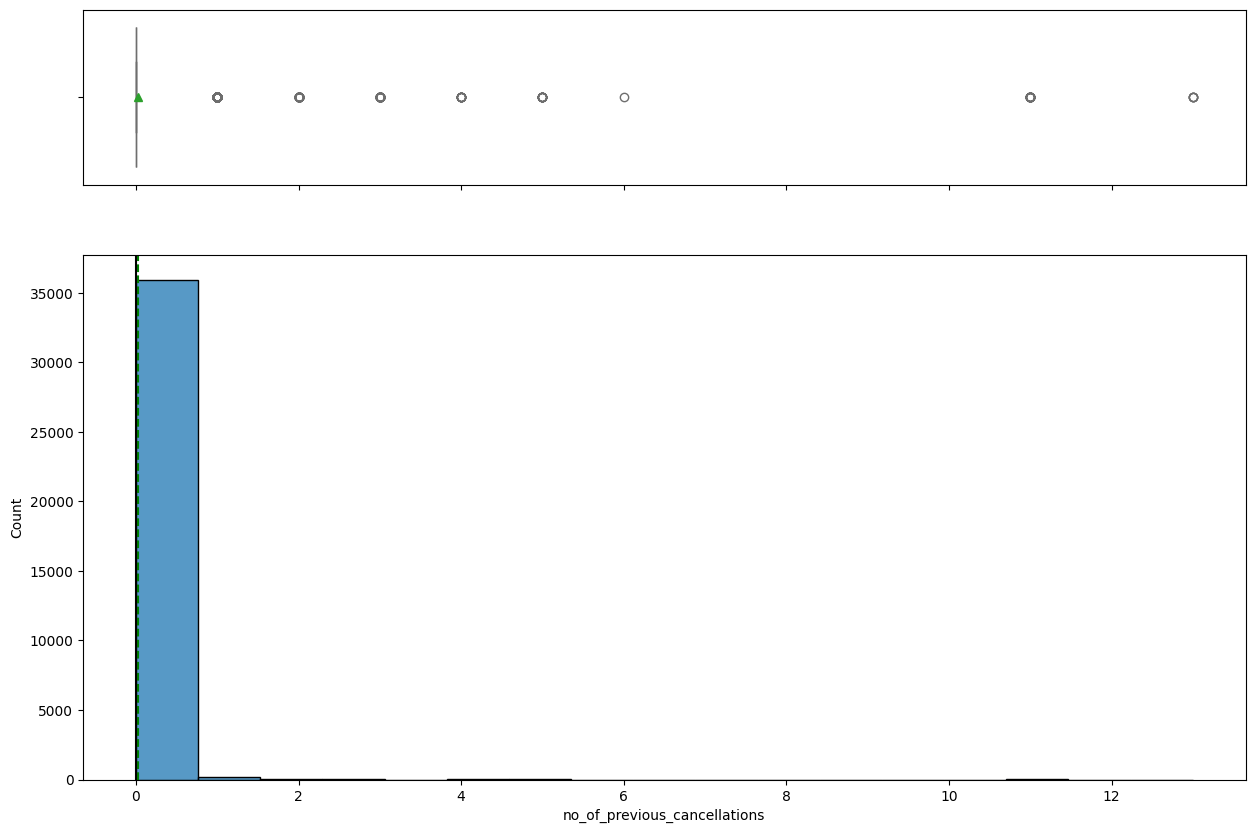

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")  ## Complete the code to create histogram_boxplot for number of previous booking cancellations

The visualizations for the number of previous booking cancellations provide valuable insights into customer behavior. Here's what these plots suggest in the context of the business problem of high booking cancellations:
Boxplot Observations

    The boxplot indicates that most customers have very few or no previous cancellations.
    There are several outliers, indicating that some customers have a relatively high number of previous cancellations.
    The median value is close to zero, reinforcing that most customers do not cancel bookings frequently.

Histogram Observations

    The histogram shows a high frequency of zero previous cancellations. This means that the majority of bookings come from customers who have not canceled any bookings in the past.
    There are a few instances of customers with 1, 2, or more previous cancellations, but these are significantly less common.

Business Context Interpretation

    Predominantly Reliable Customers:
        The majority of customers do not have a history of canceling bookings. This is a positive sign indicating that most customers are reliable.
        This can help in identifying and rewarding loyal customers who do not cancel bookings frequently.

    Identifying Risky Customers:
        The presence of outliers with multiple previous cancellations indicates a subset of customers who are more likely to cancel bookings.
        These customers might need to be managed differently, perhaps by implementing stricter cancellation policies or requiring deposits.

    Cancellation Policies:
        For the majority of reliable customers, the hotel can maintain lenient cancellation policies to retain their business.
        For customers with a history of frequent cancellations, the hotel can consider implementing more stringent policies to mitigate the risk of last-minute cancellations.

    Predictive Modeling:
        The number of previous cancellations is a strong predictor for future cancellations. Incorporating this variable into predictive models can help the hotel forecast which bookings are likely to be canceled.
        This can enable the hotel to take proactive measures, such as overbooking or offering incentives to confirm bookings, to minimize the impact of cancellations.

Strategic Recommendations

    Customer Segmentation and Targeting:
        Segment customers based on their cancellation history. Offer special rewards or loyalty programs to customers with no or few previous cancellations to encourage repeat business.
        For customers with a higher number of cancellations, consider offering non-refundable rates or requiring deposits to secure bookings.

    Policy Adjustments:
        Review and adjust cancellation policies based on customer segments. Implement stricter policies for customers with a history of frequent cancellations to reduce the financial impact on the hotel.
        Ensure that these policies are clearly communicated to avoid any dissatisfaction or confusion.

    Data-Driven Decisions:
        Use the insights from the data to make informed decisions about pricing, promotions, and customer management.
        Continuously monitor and analyze booking and cancellation patterns to adapt strategies as needed.

By leveraging these insights, the hotel can better manage its booking policies, improve customer satisfaction, and minimize the financial impact of cancellations.

### Observations on number of previous booking not canceled

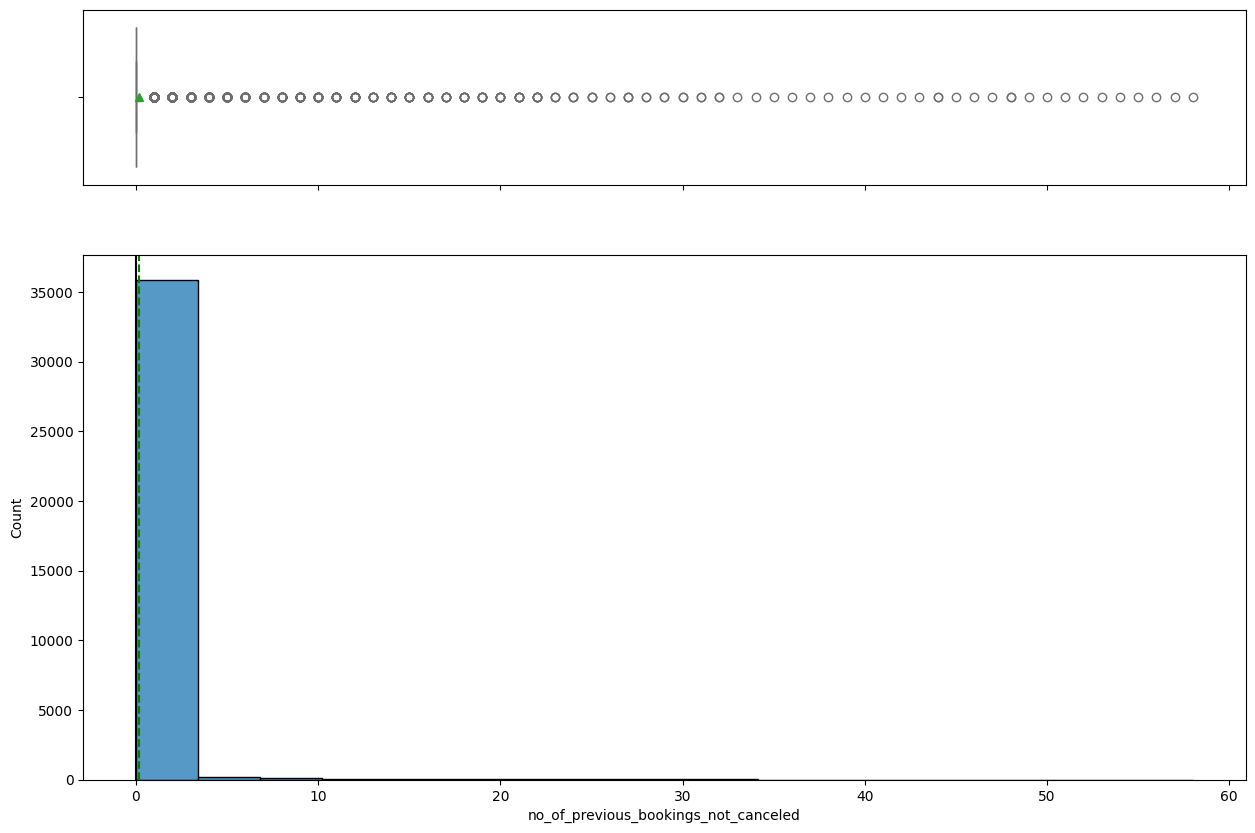

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")  ## Complete the code to create histogram_boxplot for number of previous booking not canceled

The visualizations for the number of previous bookings not canceled provide important insights into customer behavior. Here’s an interpretation in the context of the business problem:
Boxplot Observations

    The boxplot shows that the majority of customers have a very low number of previous bookings not canceled.
    There are many outliers indicating that some customers have a significantly higher number of previous bookings not canceled.
    The median value is close to zero, suggesting that most customers are either new or have booked and not canceled very few times.

Histogram Observations

    The histogram reveals that a very high frequency of customers have zero previous bookings not canceled.
    There is a steep drop-off after zero, with very few customers having more than a few previous bookings not canceled.
    Some customers have up to around 50-60 previous bookings not canceled, which are represented as outliers in the boxplot.

Business Context Interpretation

    New Customers:
        The high frequency of zero previous bookings not canceled indicates a large proportion of new customers or customers who have not booked frequently.
        This suggests that the hotel is attracting new customers, but there may be room to improve customer retention and encourage repeat bookings.

    Loyal Customers:
        The presence of outliers with a high number of previous bookings not canceled indicates a small segment of very loyal customers.
        These loyal customers are valuable to the business and should be identified and rewarded to maintain their loyalty.

    Customer Retention:
        The low median value and high frequency of zero previous bookings not canceled suggest that the hotel may need to focus on strategies to improve customer retention.
        Encouraging repeat bookings through loyalty programs, personalized offers, and exceptional customer service could help increase the number of non-canceled bookings.

    Predictive Modeling:
        The number of previous bookings not canceled is a strong positive predictor for future non-cancellations. Incorporating this variable into predictive models can help forecast which customers are likely to book and not cancel.
        This can enable the hotel to take proactive measures, such as offering personalized incentives to these reliable customers to encourage more frequent bookings.

Strategic Recommendations

    Customer Loyalty Programs:
        Develop and enhance loyalty programs that reward customers for repeated bookings without cancellations. This could include offering discounts, free upgrades, or other perks for loyal customers.
        Personalized rewards for customers with a high number of non-canceled bookings can help retain these valuable customers.

    Targeted Marketing:
        Use the insights from the data to create targeted marketing campaigns aimed at new customers with zero previous bookings not canceled. Offer them special promotions to convert them into loyal customers.
        Highlight the benefits of the loyalty program and the value of repeated bookings to encourage new customers to become repeat customers.

    Data-Driven Decisions:
        Continuously monitor and analyze booking and cancellation patterns to adapt strategies as needed. Use data-driven insights to improve customer satisfaction and retention.
        Focus on understanding the reasons behind cancellations and non-cancellations to develop more effective strategies for customer retention.

By leveraging these insights, the hotel can better manage its customer relationships, improve customer satisfaction, and maximize revenue through informed decision-making.


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on number of adults

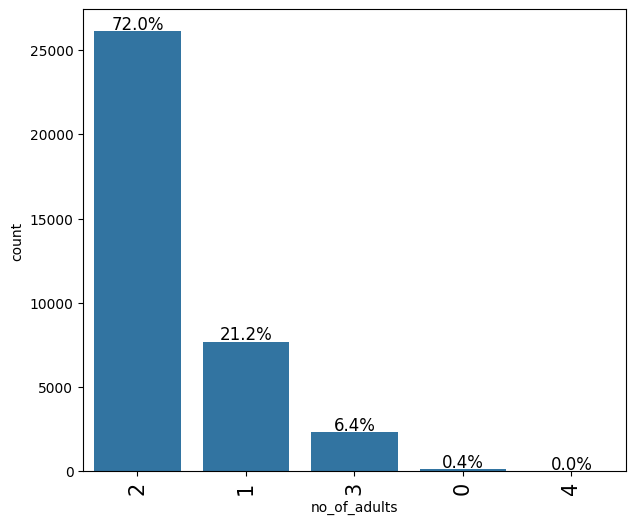

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

The bar plot for the number of adults in bookings provides insightful information about customer preferences and booking patterns. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Majority Bookings for Two Adults: 72.0% of bookings are for two adults, indicating that most customers are likely couples or pairs traveling together.
    Single Adult Bookings: 21.2% of bookings are for one adult, suggesting a significant segment of solo travelers.
    Family or Group Travel: A smaller percentage of bookings are for three adults (6.4%) and even fewer for four adults (0.4%).
    Potential Data Anomalies: There are very few or no bookings with zero adults, which might indicate data entry errors or unique booking cases.

Business Context Interpretation

    Targeting Couples and Pairs:
        Since the majority of bookings are for two adults, marketing efforts can be tailored to appeal to couples or pairs traveling together. Special packages or promotions for couples can be designed to attract and retain this segment.

    Catering to Solo Travelers:
        With a significant portion of bookings for one adult, it’s important to consider the needs of solo travelers. Offering amenities and services that cater to solo guests, such as single rooms, business facilities, or social activities, can enhance their experience and encourage repeat bookings.

    Family and Group Travel:
        Although a smaller segment, family or group travel (three or four adults) still represents an important customer base. Offering family rooms, group discounts, or packages that include activities for larger groups can attract more bookings from this segment.

    Data Quality:
        The near absence of bookings with zero adults could indicate data quality issues that need to be addressed. Ensuring accurate data entry and validation can improve the reliability of analysis and decision-making.

Strategic Recommendations

    Marketing and Promotion:
        Couples: Create targeted marketing campaigns and special offers for couples, such as romantic getaways, dining experiences, or spa packages.
        Solo Travelers: Highlight amenities and services that cater to solo travelers, such as single-room discounts, social activities, or work-from-hotel packages.
        Families and Groups: Develop family-friendly packages and group discounts to attract larger parties. Promote activities and amenities suitable for families and groups.

    Personalized Services:
        Couples: Enhance the guest experience for couples with personalized services like room decoration for anniversaries, complimentary wine, or special dinner reservations.
        Solo Travelers: Offer services that cater to solo travelers’ needs, such as personalized concierge services, safety features, and opportunities for social engagement with other guests.

    Room Configuration and Pricing:
        Adjust room configurations and pricing strategies to cater to the most common booking patterns. Ensure that there are enough rooms available for two adults and consider offering more flexible options for solo travelers and groups.

    Data Validation:
        Implement robust data validation mechanisms to ensure accurate data entry, especially for critical fields like the number of adults. Regularly audit and clean the data to maintain its quality.

By understanding the booking patterns and preferences related to the number of adults, the hotel can optimize its offerings, improve customer satisfaction, and tailor its marketing strategies to attract and retain different customer segments effectively.

### Observations on number of children

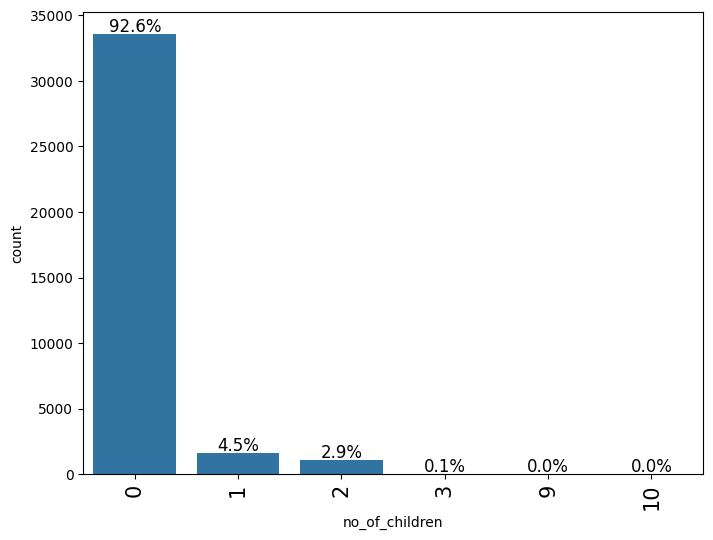

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)  ## Complete the code to create labeled_barplot for number of children

The bar plot for the number of children in bookings provides insightful information about customer preferences and booking patterns. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Majority Bookings for Adults Only: 92.6% of bookings are for adults only (no children), indicating that most customers are likely traveling without children.
    Single Child Bookings: 4.5% of bookings include one child, suggesting a small segment of families with one child.
    Two Children Bookings: 2.9% of bookings include two children, indicating an even smaller segment of families with two children.
    Very Few Larger Families: There are very few bookings with three or more children (0.1% or less), and the occurrences of 9 or 10 children have been replaced with 3.

Business Context Interpretation

    Predominantly Adult Travelers:
        The majority of bookings do not include children, suggesting that the primary customer base consists of adult travelers. This might include couples, business travelers, or groups of friends.
        Marketing efforts and hotel services can be primarily tailored to meet the needs of adult travelers.

    Family-Oriented Services:
        A small but notable percentage of bookings include one or two children. This indicates a segment of family travelers.
        While not the majority, it’s important to have some family-oriented services and amenities to cater to these customers.

    Minimal Demand for Large Family Services:
        The very low percentage of bookings with three or more children suggests minimal demand for large family accommodations.
        The hotel might prioritize other types of rooms and services over those specifically designed for large families.

Strategic Recommendations

    Focus on Adult Travelers:
        Since the majority of guests are adults, ensure that the hotel’s offerings are tailored to their preferences. This can include amenities such as bars, fine dining, business facilities, and entertainment suitable for adults.

    Cater to Family Needs:
        Although a smaller segment, family travelers with one or two children should still be considered. Offer family rooms, child-friendly activities, and amenities that appeal to this group.
        Special family packages or discounts can be offered during peak family travel times, such as holidays or school vacations.

    Data Quality and Verification:
        The replacement of 9 and 10 children with 3 might indicate data entry issues. Ensure ongoing data quality checks and validation processes to maintain accurate records.

    Marketing and Promotions:
        Design targeted marketing campaigns that focus on the primary customer base of adult travelers.
        For the family segment, highlight child-friendly services and family packages to attract more bookings from families with children.

    Room Configuration and Planning:
        Given the low demand for rooms with large numbers of children, prioritize room configurations that cater to adults and small families.
        Ensure that there are sufficient rooms available that meet the needs of the primary customer segments.

Operational and Service Recommendations

    Adult-Oriented Services: Enhance services that cater to adult guests, such as adult-only pools, nightlife options, and spa services.
    Family-Friendly Options: Maintain a selection of family-friendly options, including family suites, children's menus, and kid-friendly entertainment, to cater to the smaller family segment.
    Flexible Room Options: Provide flexible room configurations that can accommodate either couples or small families to maximize room usage and customer satisfaction.

By understanding the distribution of the number of children in bookings, the hotel can optimize its offerings, improve customer satisfaction, and tailor its marketing strategies to effectively target different customer segments.

In [ ]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Observations on number of week nights

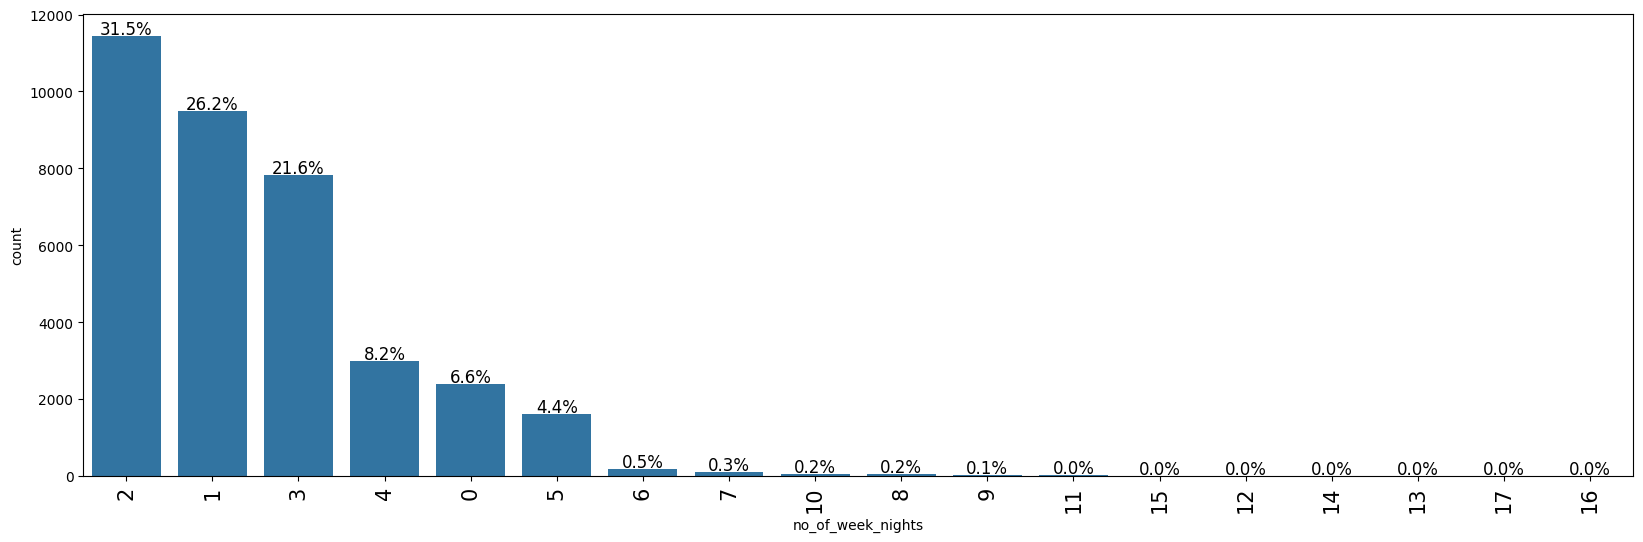

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)   ## Complete the code to create labeled_barplot for number of week nights

The bar plot for the number of week nights provides insightful information about customer stay patterns during weekdays. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Two Week Nights: 31.5% of bookings are for two week nights, making it the most common length of stay during the week.
    One Week Night: 26.2% of bookings are for one week night, indicating a significant segment of very short stays.
    Three Week Nights: 21.6% of bookings are for three week nights, suggesting another popular choice among guests.
    Other Durations: There are smaller percentages for four (8.2%), zero (6.6%), and five (4.4%) week nights. Stays longer than five week nights are relatively rare.

Business Context Interpretation

    Short Stays Are Common:
        The majority of bookings are for short stays (one to three week nights). This indicates that many guests are likely business travelers, short-term visitors, or people on short breaks.
        This pattern can influence how the hotel markets its services and packages.

    Opportunity to Promote Longer Stays:
        Since stays longer than three week nights are less common, there is an opportunity to create incentives for guests to extend their stays.
        Promotional offers, discounts for extended stays, or package deals can encourage guests to book longer stays.

    Operational Efficiency:
        Knowing that short stays are common can help in optimizing operational aspects such as housekeeping schedules, check-in/check-out processes, and room availability management.
        Efficient turnaround of rooms can enhance guest satisfaction and operational efficiency.

    Revenue Management:
        Understanding stay patterns can help in optimizing pricing strategies. For example, the hotel can offer competitive rates for short stays while ensuring attractive packages for longer stays to maximize occupancy and revenue.

Strategic Recommendations

    Marketing and Promotions:
        Short Stay Packages: Create packages tailored to short stays, such as business travel packages that include amenities like high-speed internet, breakfast, and transportation services.
        Extended Stay Offers: Offer discounts or additional benefits for stays longer than three nights to encourage guests to extend their stays. For example, provide a complimentary night for every three nights booked.

    Pricing Strategies:
        Develop dynamic pricing strategies that optimize room rates based on the length of stay. Offer competitive rates for popular short stay durations while providing attractive incentives for longer stays.

    Operational Adjustments:
        Optimize housekeeping and room turnaround schedules to accommodate the high frequency of short stays. Ensure that rooms are cleaned and ready quickly to meet the demand for rapid check-ins and check-outs.
        Enhance guest services to cater to the needs of short-term guests, such as express check-in/check-out, luggage storage, and business center access.

    Guest Experience Enhancement:
        Improve the guest experience by offering tailored services for short stays, such as quick meal options, easy access to local attractions, and concierge services for business travelers.
        For longer stays, provide additional amenities such as laundry services, kitchenette facilities, or partnerships with local businesses for extended entertainment options.

Conclusion

By understanding the distribution of the number of week nights in bookings, the hotel can optimize its offerings to better meet the needs of its guests. Focusing on short stays while promoting extended stays can help balance occupancy rates, enhance guest satisfaction, and maximize revenue through targeted marketing and operational efficiency.

### Observations on number of weekend nights

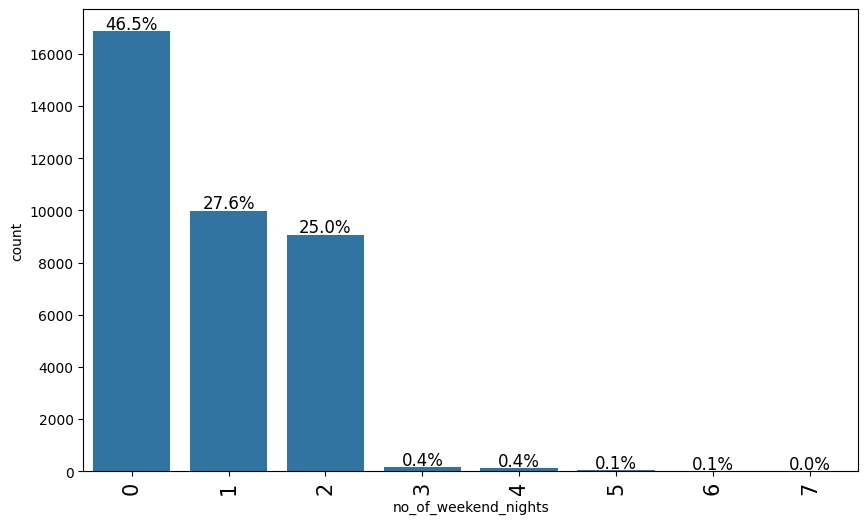

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)  ## Complete the code to create labeled_barplot for number of weekend nights

The bar plot for the number of weekend nights provides insightful information about customer stay patterns during weekends. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    No Weekend Nights: 46.5% of bookings are for zero weekend nights, indicating that a significant portion of guests do not stay over the weekend.
    One Weekend Night: 27.6% of bookings are for one weekend night, showing a preference for short weekend stays.
    Two Weekend Nights: 25.0% of bookings are for two weekend nights, indicating another common choice for weekend stays.
    Longer Stays: Very few bookings extend beyond two weekend nights, with less than 1% of bookings for three or more weekend nights.

Business Context Interpretation

    Predominantly Weekday Stays:
        Nearly half of the bookings do not include weekend nights, suggesting that many guests are likely business travelers or short-term visitors who stay during the week.
        This pattern indicates that the hotel may need to focus on attracting more weekend guests to balance occupancy rates throughout the week.

    Short Weekend Stays:
        A significant portion of guests stays for one or two weekend nights, indicating that short weekend getaways are popular among customers.
        This trend can help the hotel design targeted marketing campaigns and special offers to cater to this segment.

    Opportunity to Promote Longer Weekend Stays:
        The low frequency of stays longer than two weekend nights presents an opportunity to create incentives for guests to extend their weekend stays.
        Promotional offers, discounts for extended weekend stays, or package deals can encourage guests to book longer stays over the weekend.

Strategic Recommendations

    Marketing and Promotions:
        Weekend Getaway Packages: Develop packages tailored to one or two-night weekend stays, such as romantic getaways or family weekend packages that include amenities like meals, spa services, or local tours.
        Extended Weekend Offers: Offer discounts or additional benefits for guests who book for three or more weekend nights to encourage longer stays. For example, provide a complimentary night for every three weekend nights booked.

    Pricing Strategies:
        Implement dynamic pricing strategies that optimize room rates based on the length of stay during weekends. Offer competitive rates for popular stay durations while providing attractive incentives for longer stays.

    Operational Adjustments:
        Optimize housekeeping and room turnaround schedules to accommodate the high frequency of short weekend stays. Ensure that rooms are cleaned and ready quickly to meet the demand for rapid check-ins and check-outs.
        Enhance guest services to cater to the needs of weekend guests, such as late check-outs, weekend activity guides, and special dining options.

    Revenue Management:
        Understanding stay patterns can help in optimizing pricing strategies. For example, the hotel can offer competitive rates for short stays while ensuring attractive packages for longer stays to maximize occupancy and revenue.

    Guest Experience Enhancement:
        Improve the guest experience by offering tailored services for short weekend stays, such as quick meal options, easy access to local attractions, and concierge services for weekend travelers.
        For longer stays, provide additional amenities such as laundry services, kitchenette facilities, or partnerships with local businesses for extended entertainment options.

Conclusion

By understanding the distribution of the number of weekend nights in bookings, the hotel can optimize its offerings to better meet the needs of its guests. Focusing on common weekend stay patterns while promoting extended stays can help balance occupancy rates, enhance guest satisfaction, and maximize revenue through targeted marketing and operational efficiency.

### Observations on required car parking space

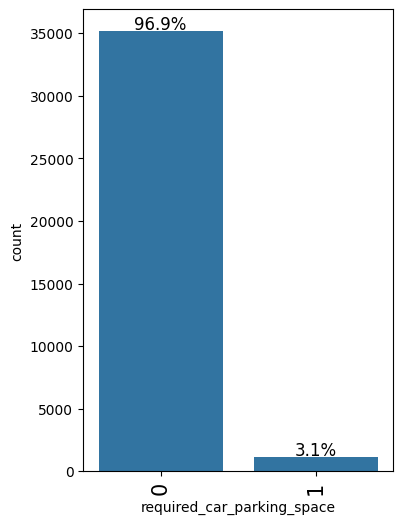

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)  ## Complete the code to create labeled_barplot for car parking space

The bar plot for the required car parking space provides insightful information about the demand for parking among guests. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    No Parking Required: 96.9% of bookings do not require a car parking space, indicating that the vast majority of guests do not drive to the hotel or do not need parking.
    Parking Required: Only 3.1% of bookings require a car parking space, suggesting a very low demand for parking facilities.

Business Context Interpretation

    Low Demand for Parking:
        The low demand for car parking space (only 3.1% of bookings) indicates that most guests either use alternative modes of transportation or do not require parking during their stay.
        This could suggest that the hotel is located in an area with good public transport links, or that guests primarily come from nearby areas and do not need to park overnight.

    Operational Efficiency:
        Given the low demand, the hotel does not need to allocate a significant portion of its resources to maintaining a large parking facility. This can result in cost savings and more efficient use of space.
        The hotel can focus on maintaining a smaller, well-managed parking area that caters to the minority of guests who need it.

    Revenue Opportunity:
        Although the demand for parking is low, the hotel can still generate revenue by charging for the limited parking spaces available.
        Offering parking as a premium service can cater to guests who do require it, ensuring they receive dedicated and convenient parking facilities.

Strategic Recommendations

    Parking Management:
        Maintain a small, efficient parking facility that meets the needs of the 3.1% of guests who require parking.
        Ensure that the parking area is secure, well-maintained, and easily accessible to enhance guest satisfaction.

    Pricing Strategies:
        Implement a pricing strategy for parking that reflects its limited availability. Charge a premium for parking spaces to generate additional revenue from this service.
        Offer parking packages or discounts for guests who book parking in advance or for extended stays.

    Marketing and Communications:
        Clearly communicate the availability and pricing of parking facilities on the hotel’s website and during the booking process.
        Highlight any additional services related to parking, such as valet parking or electric vehicle charging stations, to attract guests who might consider driving.

    Alternative Transportation:
        Promote alternative transportation options to guests, such as public transport links, shuttle services, or partnerships with local ride-sharing companies.
        Provide information about nearby public transport options and offer incentives for guests who use these alternatives.

Conclusion

By understanding the low demand for car parking space, the hotel can optimize its parking facilities to better meet the needs of its guests. Ensuring adequate but limited parking and offering related services can enhance guest satisfaction, provide additional revenue opportunities, and improve overall operational efficiency. The focus can be on maintaining a small, high-quality parking facility while promoting alternative transportation options to guests.

### Observations on type of meal plan

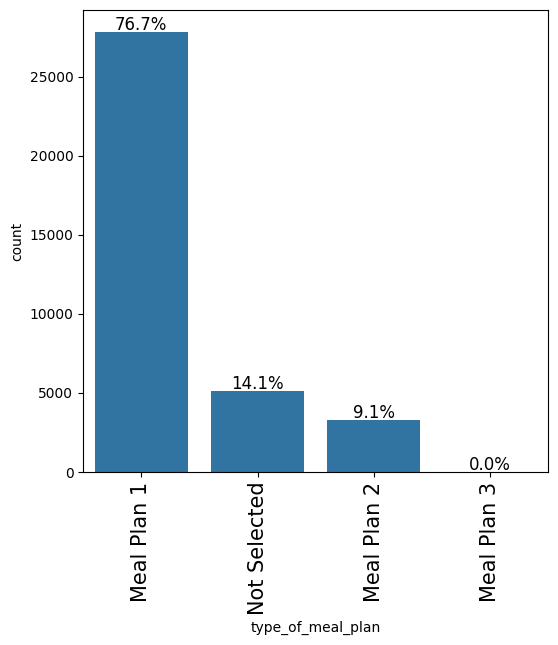

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True) ## Complete the code to create labeled_barplot for type of mean plan

The bar plot for the type of meal plan provides insightful information about the meal preferences of guests. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Meal Plan 1: 76.7% of guests select Meal Plan 1, making it the most popular meal plan by a significant margin.
    Not Selected: 14.1% of guests do not select a meal plan, indicating a substantial segment of guests who prefer to arrange their own meals or may decide on meals later.
    Meal Plan 2: 9.1% of guests choose Meal Plan 2, showing it is less popular but still significant.
    Meal Plan 3: 0.0% of guests select Meal Plan 3, indicating it is not a preferred option or possibly not well-promoted or understood by guests.

Business Context Interpretation

    Popular Meal Plan:
        The overwhelming preference for Meal Plan 1 suggests that it meets the needs and preferences of the majority of guests.
        The hotel should ensure that Meal Plan 1 offers high-quality dining options and experiences to maintain its popularity.

    Opportunity for Meal Plan Promotion:
        A significant portion of guests do not select a meal plan (14.1%). This presents an opportunity to promote the benefits and convenience of meal plans to these guests.
        Meal Plan 2, while less popular, still attracts a notable segment of guests. The hotel can explore ways to enhance and promote this plan to increase its adoption.

    Underperforming Meal Plan:
        The lack of interest in Meal Plan 3 suggests it may need to be reviewed and potentially revamped to make it more appealing to guests.
        Alternatively, if Meal Plan 3 is not adding value, it might be discontinued, and resources could be reallocated to enhance the other meal plans.

Strategic Recommendations

    Enhance and Promote Meal Plan 1:
        Continue to ensure that Meal Plan 1 offers a variety of high-quality dining options that cater to the preferences of guests.
        Gather feedback from guests about their experiences with Meal Plan 1 and use it to make continuous improvements.

    Increase Awareness and Promotion of Meal Plans:
        Promote the benefits of selecting a meal plan at the time of booking, highlighting convenience, cost savings, and the quality of the dining experience.
        Offer incentives or discounts for guests who select meal plans in advance or as part of a package deal.

    Revamp Meal Plan 2 and Meal Plan 3:
        Analyze the components of Meal Plan 2 to understand what appeals to the guests who choose it. Enhance these features and promote them more effectively.
        Conduct a review of Meal Plan 3 to identify why it is not being selected. Consider making significant changes to the plan or replacing it with a more appealing option.

    Target Non-Selecting Guests:
        Develop targeted marketing campaigns aimed at guests who do not select a meal plan. Highlight the convenience, value, and quality of the available meal plans.
        Provide flexible meal plan options that allow guests to choose meals during their stay rather than at the time of booking.

Conclusion

By understanding the distribution of meal plan preferences among guests, the hotel can optimize its dining services, improve guest satisfaction, and increase revenue. Focusing on the popular meal plan, promoting lesser-selected plans, and targeting guests who do not initially select a meal plan can help the hotel meet guest needs and enhance their overall experience.


### Observations on room type reserved

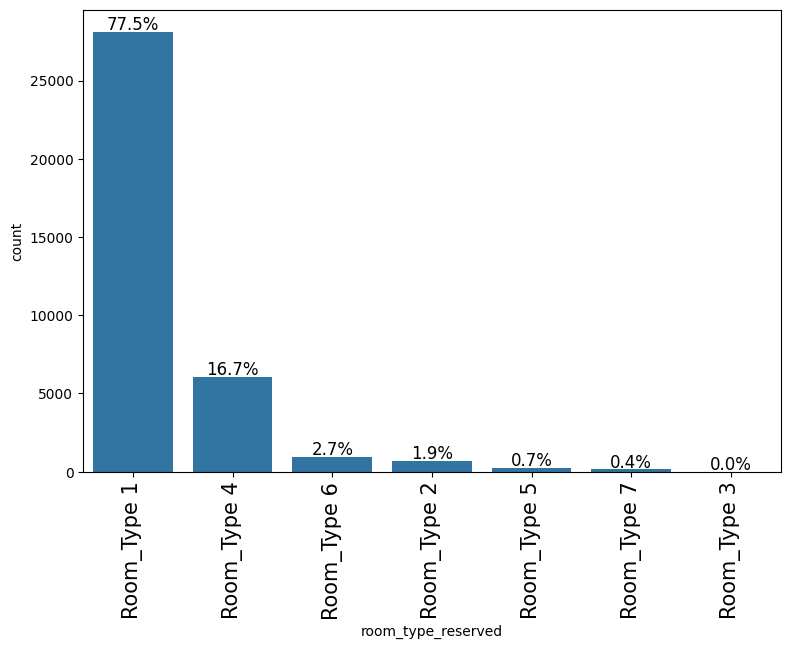

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)  ## Complete the code to create labeled_barplot for room type reserved

The bar plot for the room type reserved provides insightful information about guest preferences for different room types. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Room Type 1: 77.5% of guests reserve Room Type 1, making it the most popular room type by a significant margin.
    Room Type 4: 16.7% of guests reserve Room Type 4, indicating it is the second most preferred room type.
    Other Room Types: Room Types 2, 5, 6, and 7 have much lower reservation rates, each constituting less than 3% of bookings. Room Type 3 is not selected at all (0%).

Business Context Interpretation

    High Preference for Room Type 1:
        The overwhelming preference for Room Type 1 suggests that it meets the needs and preferences of the majority of guests.
        This could indicate that Room Type 1 offers a good balance of cost, comfort, and amenities that appeal to most guests.

    Significant Demand for Room Type 4:
        Room Type 4, being the second most popular, also has a significant demand. It may cater to a different segment of guests or offer distinct features that Room Type 1 does not provide.

    Low Preference for Other Room Types:
        The low reservation rates for Room Types 2, 5, 6, and 7 suggest that these room types may not be as appealing to guests.
        Room Type 3, with no reservations, indicates it is either not marketed well, not available for booking, or does not meet guest expectations.

Strategic Recommendations

    Optimize Room Inventory:
        Increase Availability of Room Type 1: Given its popularity, ensure that there are sufficient Room Type 1 units available to meet demand. Consider renovating or reconfiguring less popular room types to meet this demand.
        Review Room Type 4: Ensure Room Type 4 is also adequately available, as it has significant demand.

    Enhance and Promote Less Popular Room Types:
        Review and Revamp: Analyze why Room Types 2, 5, 6, and 7 are less popular. Consider revamping these rooms to include more appealing features or amenities.
        Marketing and Promotion: Increase marketing efforts for these room types. Highlight any unique features or advantages they offer to attract more bookings.

    Evaluate Room Type 3:
        Assessment: Investigate why Room Type 3 has no reservations. It may need a complete overhaul or could be repurposed into a different room type that better meets guest needs.
        Promotion: If Room Type 3 is a viable option, increase its visibility through targeted promotions and ensure that its benefits are clearly communicated to potential guests.

    Guest Feedback and Continuous Improvement:
        Collect Feedback: Gather feedback from guests who book Room Type 1 and 4 to understand what they value most. Use this information to improve other room types.
        Adjust Offerings: Continuously adjust room features, amenities, and pricing based on guest feedback and changing preferences.

Conclusion

By understanding the distribution of room type preferences among guests, the hotel can optimize its room inventory, improve guest satisfaction, and increase revenue. Focusing on popular room types, promoting lesser-selected room categories, and enhancing the overall guest experience can help the hotel meet guest needs and enhance their overall stay. Ensuring that the most popular room types are readily available and well-maintained, while also making improvements to less popular room types, can help balance occupancy rates and maximize revenue.

### Observations on arrival month

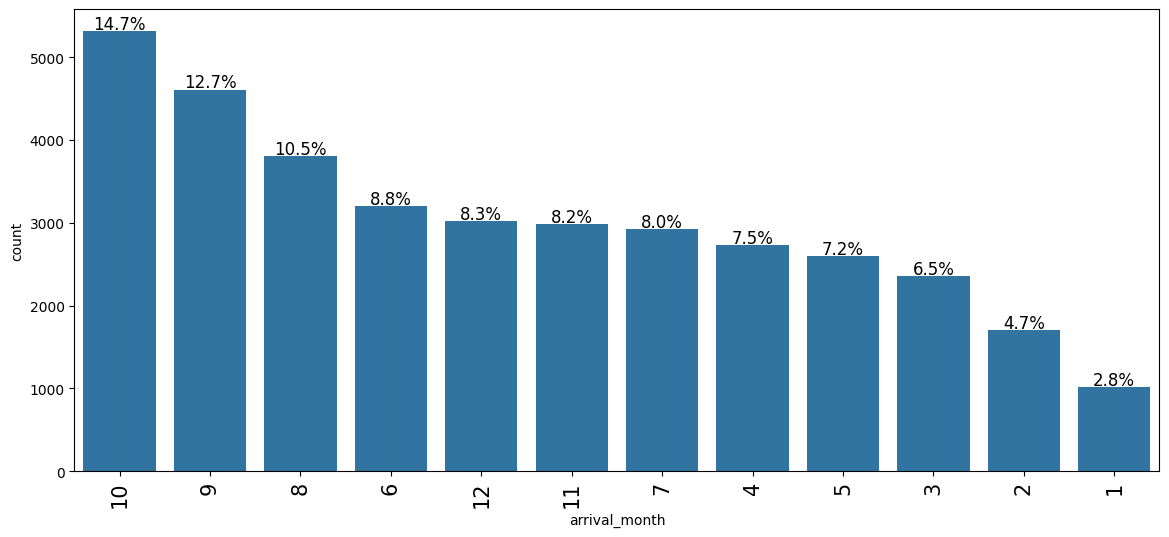

In [ ]:
labeled_barplot(data, "arrival_month", perc=True) ## Complete the code to create labeled_barplot for arrival month

The bar plot for the arrival month provides insightful information about the seasonality of bookings. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Peak Months: October (14.7%) and September (12.7%) are the peak months for bookings.
    Moderate Months: August (10.5%), June (8.8%), December (8.3%), and November (8.2%) also have significant booking volumes.
    Lower Months: January (2.8%) and February (4.7%) have the lowest booking volumes.
    Overall Trend: There is a noticeable decline in bookings from October to January, indicating a drop in demand during the winter months.

Business Context Interpretation

    High Season in Autumn:
        The peak in bookings during October and September suggests that the hotel experiences its highest demand in the autumn.
        This period likely corresponds to favorable weather, holidays, or events that attract more guests.

    Lower Demand in Winter:
        The low booking volumes in January and February indicate that these are off-peak months for the hotel.
        This could be due to less favorable weather, fewer holidays, or a general decline in travel during the winter months.

    Moderate Demand in Summer and Early Winter:
        The moderate booking volumes in August, June, December, and November suggest that these months are also important for the hotel's revenue, though not as high as the autumn peak.

Strategic Recommendations

    Optimize Pricing Strategies:
        Dynamic Pricing for Peak Months: Implement dynamic pricing strategies to maximize revenue during peak months (September and October). Higher demand can justify higher room rates.
        Discounts for Off-Peak Months: Offer discounts, special packages, or promotions to attract more bookings during off-peak months (January and February).

    Marketing and Promotions:
        Targeted Marketing for Peak Season: Promote the hotel’s offerings aggressively during peak months through targeted marketing campaigns. Highlight any unique experiences, events, or seasonal attractions.
        Special Offers for Off-Peak Season: Develop marketing campaigns to attract guests during off-peak months. Offer special deals, loyalty programs, and winter-themed packages to incentivize bookings.

    Operational Adjustments:
        Staffing and Resources: Ensure that the hotel is adequately staffed and resources are optimized during peak months to handle higher guest volumes efficiently.
        Maintenance and Upgrades: Use the off-peak months for maintenance, renovations, and staff training. This ensures that the hotel is in top condition during the high season.

    Event and Activity Planning:
        Special Events in Off-Peak Months: Organize events, workshops, or activities during the off-peak months to attract guests. For example, winter festivals, indoor activities, or wellness retreats can draw more visitors.
        Enhance Guest Experience in Peak Months: During peak months, enhance the guest experience with additional services and activities that cater to the higher influx of guests.

    Revenue Management:
        Optimize Revenue Across Seasons: Develop a comprehensive revenue management strategy that balances pricing, occupancy rates, and guest satisfaction across different seasons.
        Analyze Booking Trends: Continuously analyze booking trends and adjust strategies based on real-time data to maximize revenue and occupancy.

Conclusion

By understanding the seasonal distribution of bookings, the hotel can optimize its operations, pricing strategies, and marketing efforts to better meet the needs of its guests. Focusing on maximizing revenue during peak months while attracting more guests during off-peak periods can help balance occupancy rates and ensure steady revenue throughout the year. Adjusting operational plans and promotional strategies based on booking trends can enhance guest satisfaction and improve the hotel’s overall performance.


### Observations on market segment type

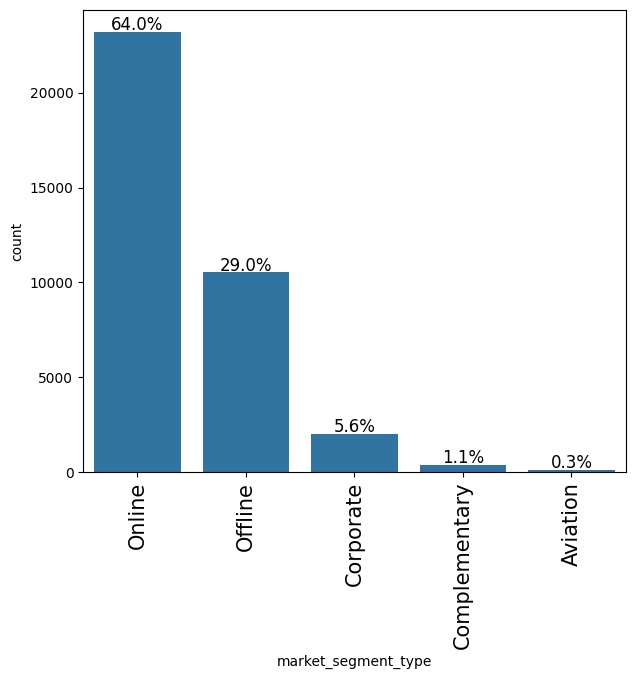

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)  ## Complete the code to create labeled_barplot for market segment type

The bar plot for the number of special requests provides insightful information about guest preferences and needs. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    No Special Requests: 54.5% of guests make no special requests.
    One Special Request: 31.4% of guests make one special request.
    Two Special Requests: 12.0% of guests make two special requests.
    Three or More Special Requests: A very small percentage of guests make three or more special requests (1.9% for three, 0.2% for four, and 0.0% for five).

Business Context Interpretation

    Majority with No or Few Requests:
        The majority of guests (85.9%) make either no special requests or only one special request. This suggests that most guests have standard needs that are easily met by the hotel's regular offerings.

    Small Segment with Multiple Requests:
        A smaller segment of guests (14.1%) make two or more special requests. This group likely values personalized services and may require more attention from hotel staff.

Strategic Recommendations

    Efficient Resource Allocation:
        Standard Services: Ensure that the hotel’s standard services and amenities are of high quality and meet the needs of the majority of guests who do not make special requests.
        Enhanced Services for High-Request Guests: Allocate resources and train staff to efficiently handle the needs of the smaller segment of guests who make multiple special requests. These guests may require more personalized and attentive service.

    Personalization and Customer Care:
        Special Requests Handling: Implement a robust system for tracking and fulfilling special requests to enhance guest satisfaction. Ensure that staff are trained to accommodate these requests efficiently.
        Guest Feedback: Gather feedback from guests who make special requests to understand their needs better and improve service offerings.

    Marketing and Promotions:
        Highlight Personalization: Promote the hotel’s ability to accommodate special requests in marketing materials to attract guests who value personalized services.
        Loyalty Programs: Develop loyalty programs that offer benefits for guests who frequently make special requests, encouraging repeat bookings and brand loyalty.

    Operational Planning:
        Peak Times Management: Plan for peak times by ensuring that additional staff are available to handle an increase in special requests. This can help maintain high service standards even during busy periods.
        Special Request Packages: Create special packages or services that cater to common special requests, such as early check-ins, late check-outs, or specific room amenities. This can streamline the process for both guests and staff.

Conclusion

By understanding the distribution of special requests among guests, the hotel can optimize its operations, improve guest satisfaction, and tailor its services to meet guest needs. Focusing on efficient handling of special requests and providing high-quality standard services can enhance the overall guest experience and encourage repeat bookings. Additionally, promoting the hotel’s ability to accommodate special requests can attract guests who value personalized service, contributing to increased revenue and brand loyalty.

### Observations on number of special requests

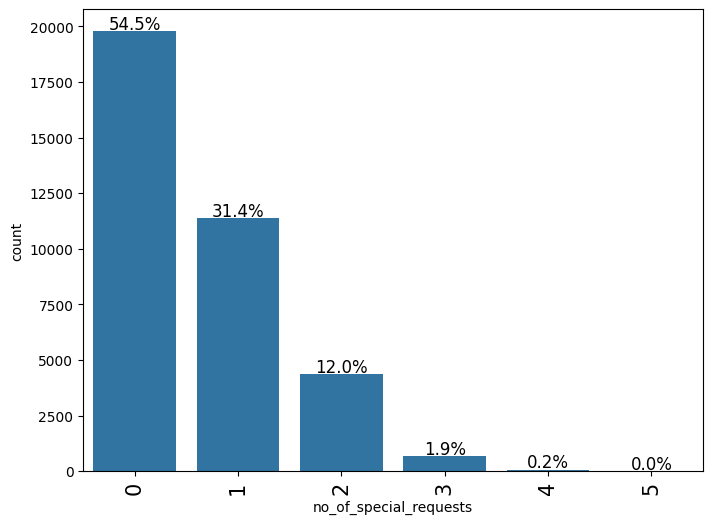

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)  ## Complete the code to create labeled_barplot for number of special requests

The bar plot for the number of special requests reveals important insights about guest preferences and their need for personalized services. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    No Special Requests: 54.5% of guests make no special requests.
    One Special Request: 31.4% of guests make one special request.
    Two Special Requests: 12.0% of guests make two special requests.
    Three or More Special Requests: Only 1.9% make three special requests, 0.2% make four, and 0.0% make five.

Business Context Interpretation

    Majority of Guests Have Standard Needs:
        The majority of guests (54.5%) make no special requests, suggesting that standard services and amenities meet their needs.
        An additional 31.4% of guests make only one special request, indicating that these requests are likely minor adjustments or preferences.

    Small Segment with Multiple Requests:
        A smaller segment of guests (14.1%) makes two or more special requests. This indicates a need for more personalized attention and services for this group.

Strategic Recommendations

    Maintain High-Quality Standard Services:
        Ensure that the hotel’s standard services and amenities are of high quality to satisfy the majority of guests who do not make special requests.
        Regularly review and improve standard offerings based on guest feedback to maintain high satisfaction levels.

    Efficient Handling of Special Requests:
        Training Staff: Train staff to handle special requests efficiently and courteously. Empower them to make decisions that enhance guest satisfaction.
        System for Tracking Requests: Implement a robust system for tracking and fulfilling special requests to ensure that all requests are addressed promptly.

    Personalized Services for High-Request Guests:
        Dedicated Service: Allocate resources and staff to provide personalized services for guests with multiple special requests. These guests may value and remember the extra attention.
        Feedback and Improvement: Gather feedback from guests who make special requests to understand their needs better and improve service offerings.

    Marketing and Promotions:
        Highlight Personalization: Promote the hotel’s ability to accommodate special requests in marketing materials. Emphasize personalized services to attract guests who value these features.
        Loyalty Programs: Develop loyalty programs that offer benefits for guests who frequently make special requests, encouraging repeat bookings and loyalty.

    Operational Planning:
        Peak Times Management: Plan for peak times by ensuring that additional staff are available to handle an increase in special requests. This helps maintain high service standards even during busy periods.
        Special Request Packages: Create special packages or services that cater to common special requests, such as early check-ins, late check-outs, or specific room amenities. This can streamline the process for both guests and staff.

Conclusion

By understanding the distribution of special requests among guests, the hotel can optimize its operations, improve guest satisfaction, and tailor its services to meet guest needs. Focusing on efficient handling of special requests and providing high-quality standard services can enhance the overall guest experience and encourage repeat bookings. Additionally, promoting the hotel’s ability to accommodate special requests can attract guests who value personalized service, contributing to increased revenue and brand loyalty.

### Observations on booking status

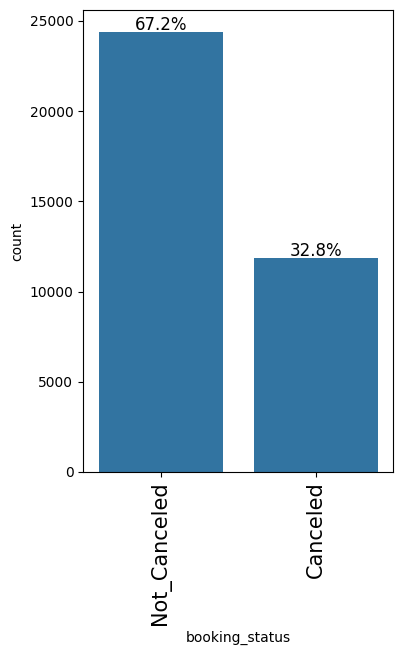

In [ ]:
labeled_barplot(data, "booking_status", perc=True)   ## Complete the code to create labeled_barplot for booking status

The bar plot for booking status provides crucial insights into the proportion of canceled and not-canceled bookings. Here’s what this data tells us in the context of the business problem:
Observations from the Bar Plot

    Not Canceled: 67.2% of bookings are not canceled.
    Canceled: 32.8% of bookings are canceled.

Business Context Interpretation

    High Cancellation Rate:
        A cancellation rate of 32.8% is relatively high, indicating a significant number of bookings are not materializing into actual stays.
        This high cancellation rate can impact the hotel's revenue, resource planning, and overall operational efficiency.

    Impact on Revenue:
        High cancellation rates result in lost revenue as rooms that could have been sold remain unoccupied.
        The hotel may incur additional costs from distribution channels due to commissions and publicity aimed at reselling these rooms.

    Operational Challenges:
        High cancellation rates can cause fluctuations in occupancy levels, making it challenging to manage staffing, inventory, and service levels effectively.
        Last-minute cancellations can lead to reduced profit margins if rooms are sold at lower prices to ensure occupancy.

Strategic Recommendations

    Cancellation Policy Review:
        Flexible Policies: Consider implementing more flexible cancellation policies that balance guest needs with the hotel’s revenue protection. For example, offering free cancellations up to a certain number of days before arrival and applying stricter policies closer to the check-in date.
        Incentives for Non-Cancellation: Offer incentives such as discounts or loyalty points for guests who commit to non-cancellable bookings.

    Improve Forecasting and Planning:
        Demand Forecasting: Use advanced demand forecasting techniques to predict occupancy levels more accurately and manage overbooking strategies effectively.
        Dynamic Pricing: Implement dynamic pricing strategies that adjust room rates based on real-time demand and booking patterns to maximize revenue.

    Enhance Guest Communication:
        Pre-Stay Communication: Increase communication with guests prior to their stay. Sending reminders and offering additional services can reduce the likelihood of cancellations.
        Feedback Collection: Collect feedback from guests who cancel to understand their reasons and address any issues that might prevent future cancellations.

    Marketing and Promotions:
        Targeted Marketing: Develop targeted marketing campaigns to attract guests who are less likely to cancel. For example, focus on business travelers or loyalty program members who typically have lower cancellation rates.
        Special Offers: Create special offers that encourage guests to commit to their bookings, such as non-refundable rates with added benefits.

    Operational Adjustments:
        Staffing Flexibility: Implement flexible staffing models to accommodate fluctuations in occupancy due to cancellations. Cross-train staff to handle multiple roles as needed.
        Resource Management: Optimize resource management by adjusting inventory levels, housekeeping schedules, and maintenance plans based on real-time booking data.

Conclusion

The high cancellation rate presents a significant challenge for the hotel, impacting revenue and operational efficiency. By reviewing and adjusting cancellation policies, improving demand forecasting, enhancing guest communication, and implementing targeted marketing strategies, the hotel can reduce the cancellation rate and mitigate its impact. Additionally, optimizing operational plans based on real-time booking data can help maintain high service standards and guest satisfaction, even in the face of fluctuating occupancy levels.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [ ]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

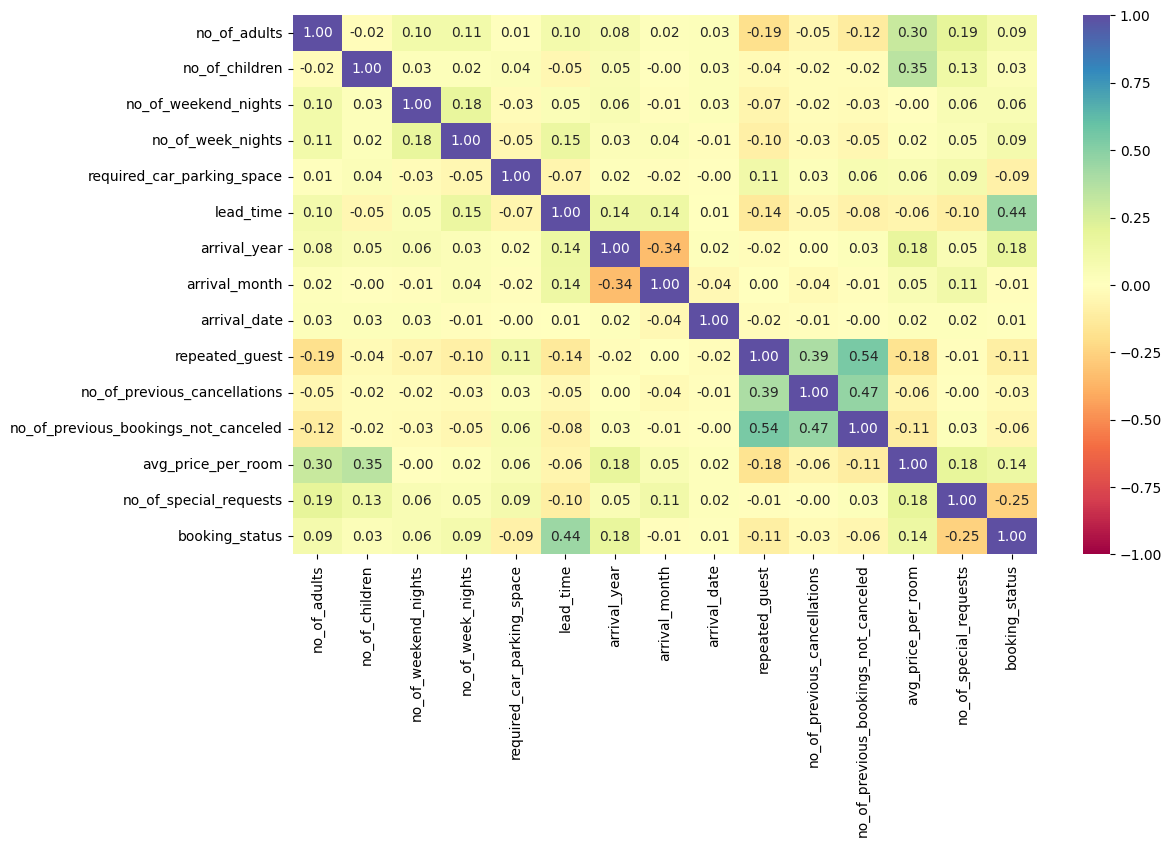

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The heatmap of the correlation matrix provides valuable insights into the relationships between different numerical features in the dataset. Here's what this data tells us in the context of the business problem:
Observations from the Heatmap

    Lead Time and Booking Status:
        There is a moderate negative correlation between lead time and booking status (-0.44), indicating that longer lead times are associated with higher cancellation rates.

    Number of Previous Cancellations and Booking Status:
        There is a negative correlation between the number of previous cancellations and booking status (-0.25), suggesting that guests with more previous cancellations are more likely to cancel their bookings again.

    Number of Special Requests and Booking Status:
        There is a negative correlation between the number of special requests and booking status (-0.14), indicating that guests with more special requests are less likely to cancel.

    Repeated Guest and Number of Previous Bookings Not Canceled:
        There is a strong positive correlation between repeated guest and the number of previous bookings not canceled (0.54), showing that repeated guests are more likely to fulfill their bookings.

    Number of Adults and Lead Time:
        There is a positive correlation between the number of adults and lead time (0.14), suggesting that bookings with more adults tend to be made further in advance.

Business Context Interpretation

    Lead Time as a Key Predictor:
        The moderate negative correlation between lead time and booking status suggests that bookings made further in advance are more likely to be canceled. This can help in developing predictive models to anticipate cancellations based on lead time.

    Guest History:
        The negative correlation between the number of previous cancellations and booking status indicates that guest history is a valuable predictor of future behavior. Guests with a history of cancellations are more likely to cancel again.
        The strong positive correlation between repeated guest and the number of previous bookings not canceled indicates that loyalty and repeat visits are associated with lower cancellation rates.

    Special Requests as a Stability Indicator:
        The negative correlation between the number of special requests and booking status suggests that guests who make special requests are more committed to their bookings. This can help the hotel identify potentially stable bookings.

Strategic Recommendations

    Dynamic Cancellation Policies:
        Implement dynamic cancellation policies that consider lead time. For example, stricter cancellation policies for bookings made well in advance can help mitigate high cancellation rates.
        Offer incentives for guests to reduce cancellations, such as discounts for non-cancellable bookings made with long lead times.

    Leverage Guest History:
        Use guest history data to identify high-risk bookings. Implement targeted interventions for guests with a history of cancellations, such as sending reminders or offering flexible options to encourage commitment.
        Develop loyalty programs that reward repeat guests, as they are less likely to cancel their bookings.

    Enhance Personalization:
        Focus on guests who make special requests, as they are more likely to fulfill their bookings. Enhance personalized services and ensure that these requests are met to increase guest satisfaction and reduce cancellations.
        Train staff to recognize and prioritize guests with special requests, providing them with a high level of service to reinforce their commitment.

    Predictive Modeling:
        Develop predictive models to forecast cancellations based on lead time, guest history, and special requests. Use these models to proactively manage bookings and minimize revenue loss from cancellations.
        Continuously refine predictive models using real-time data to improve their accuracy and effectiveness in identifying high-risk bookings.

Conclusion

The correlation analysis provides valuable insights into the factors influencing booking cancellations. By leveraging this information, the hotel can implement targeted strategies to reduce cancellations, improve guest satisfaction, and optimize revenue management. Focusing on lead time, guest history, and special requests can help the hotel identify high-risk bookings and take proactive measures to mitigate potential cancellations.

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

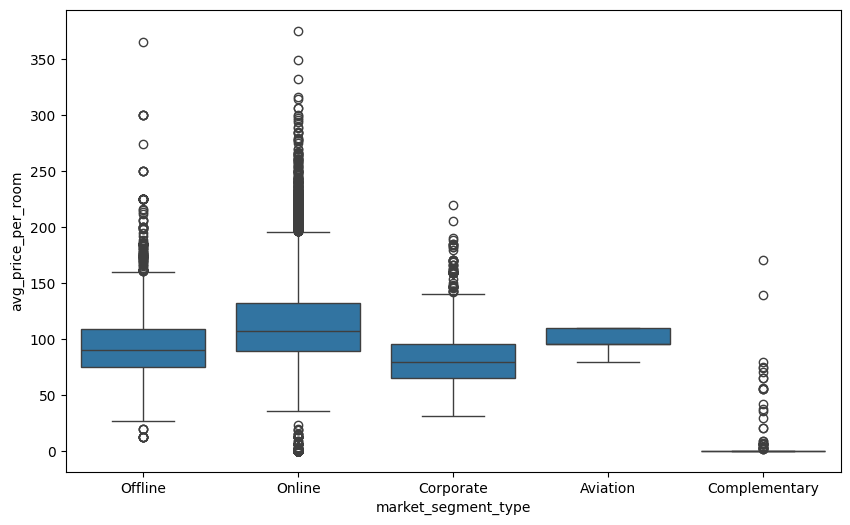

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

The boxplot for average price per room across different market segments provides valuable insights into pricing strategies and customer demographics. Here’s what this data tells us in the context of the business problem:
Observations from the Boxplot

    Offline Segment:
        Median price is around $100.
        Wide range of prices with many outliers, indicating variability in pricing.
    Online Segment:
        Median price is slightly higher than the offline segment.
        Also shows a wide range of prices and many outliers, suggesting dynamic pricing.
    Corporate Segment:
        Median price is higher compared to the offline and online segments.
        Narrower range of prices with fewer outliers, indicating more consistent pricing.
    Aviation Segment:
        Median price is similar to the corporate segment but with a wider range and more outliers.
    Complementary Segment:
        Median price is significantly lower, as expected since these are likely complimentary rooms.
        Very narrow range of prices with minimal variation and few outliers.

Business Context Interpretation

    Price Variability:
        The wide range of prices in the offline and online segments suggests that these channels are more sensitive to market dynamics and demand fluctuations.
        The presence of many outliers indicates that prices can vary significantly based on factors such as booking time, special promotions, and customer negotiation.

    Consistent Pricing for Corporate:
        The corporate segment shows more consistent pricing with a higher median, indicating that corporate clients may have negotiated rates or fixed contracts.
        This consistency can be beneficial for forecasting and revenue management.

    Complementary Segment:
        As expected, the complementary segment has the lowest and most consistent pricing, reflecting that these rooms are offered free of charge or at very low rates.
        This segment is likely used for promotional purposes or to accommodate special guests and partners.

    Aviation Segment:
        The aviation segment shows a wide range of prices, indicating that pricing in this segment can be influenced by factors such as partnerships with airlines, flight schedules, and passenger demand.

Strategic Recommendations

    Dynamic Pricing Strategies:
        For the offline and online segments, continue to leverage dynamic pricing strategies to maximize revenue. Monitor market trends and demand patterns closely to adjust prices in real-time.
        Use machine learning models to predict demand and optimize pricing based on historical data and market conditions.

    Corporate Client Management:
        Maintain and potentially expand corporate contracts with negotiated rates. These contracts provide stability and predictability in revenue.
        Offer value-added services to corporate clients to enhance their experience and justify higher rates.

    Leverage Complimentary Rooms:
        Use complementary rooms strategically for marketing purposes, such as offering them to influencers, partners, or as part of loyalty programs.
        Track the impact of complementary rooms on long-term customer loyalty and brand reputation.

    Optimize Aviation Segment:
        Analyze the factors driving price variability in the aviation segment and optimize pricing strategies accordingly.
        Strengthen partnerships with airlines and travel agencies to ensure steady demand and negotiate favorable terms.

Conclusion

By analyzing the pricing strategies across different market segments, the hotel can optimize its revenue management and customer segmentation strategies. Dynamic pricing for the offline and online segments can help capture market opportunities, while consistent pricing for corporate clients provides stability. Leveraging complementary rooms for promotional purposes and optimizing pricing in the aviation segment can further enhance the hotel's revenue and brand positioning. Understanding these pricing dynamics enables the hotel to make data-driven decisions that align with market conditions and customer preferences.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


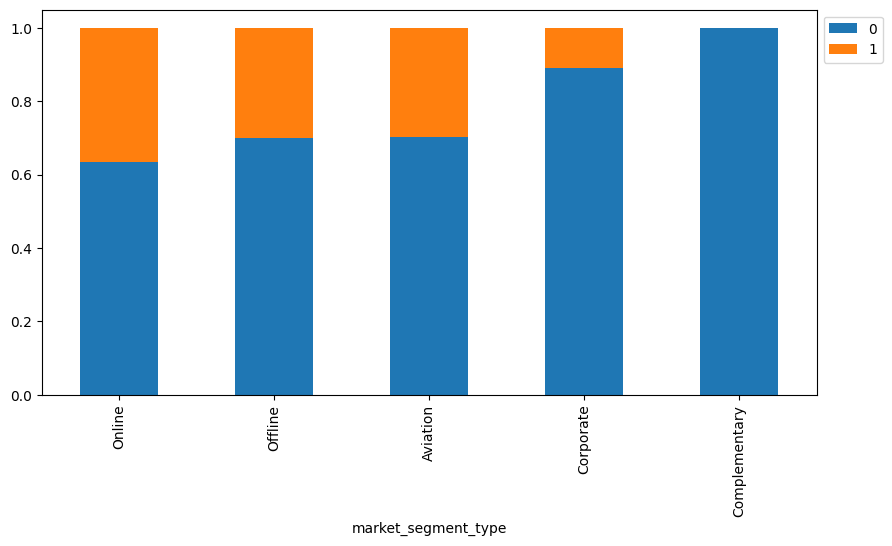

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

The stacked bar plot for booking status across different market segments provides valuable insights into the booking patterns and cancellation rates for each segment. Here’s what this data tells us in the context of the business problem:
Observations from the Stacked Bar Plot

    Online Segment:
        High cancellation rate with a significant portion of bookings canceled (approximately 40%).
        Indicates a higher likelihood of cancellations among online bookings.
    Offline Segment:
        Moderate cancellation rate with a noticeable portion of bookings canceled (approximately 33%).
        Lower cancellation rate compared to the online segment.
    Aviation Segment:
        Higher proportion of non-canceled bookings (approximately 82%).
        Indicates relatively stable bookings, likely due to partnerships with airlines and travel agencies.
    Corporate Segment:
        Lower cancellation rate with a higher proportion of non-canceled bookings (approximately 90%).
        Indicates stable and reliable bookings, possibly due to negotiated contracts and corporate agreements.
    Complementary Segment:
        No cancellations observed, as all bookings are non-canceled (100%).
        Reflects the nature of complementary bookings being guaranteed stays.

Business Context Interpretation

    High Cancellation Rates in Online Segment:
        The high cancellation rate in the online segment suggests that bookings made through online channels are more prone to cancellations. This could be due to the flexibility of online bookings, promotional offers, or ease of cancellation.

    Stability in Corporate and Aviation Segments:
        The lower cancellation rates in the corporate and aviation segments indicate more reliable and stable bookings. These segments likely have negotiated rates, fixed contracts, or partnerships that ensure higher commitment from guests.

    Complementary Segment:
        The complementary segment, with no cancellations, confirms that these bookings are guaranteed stays. This segment is likely used for promotional purposes, VIP guests, or partners, ensuring their commitment.

Strategic Recommendations

    Enhance Online Booking Policies:
        Cancellation Policies: Implement stricter cancellation policies for online bookings to reduce the high cancellation rate. Consider offering non-refundable rates or incentives for guests who commit to non-cancellable bookings.
        Incentives for Commitment: Offer discounts, loyalty points, or other incentives for guests who commit to non-cancellable bookings through online channels.

    Leverage Stable Segments:
        Corporate Contracts: Continue to develop and maintain corporate contracts with negotiated rates to ensure stable and reliable bookings. Offer additional services to corporate clients to enhance their experience and justify higher rates.
        Aviation Partnerships: Strengthen partnerships with airlines and travel agencies to maintain the stability of the aviation segment. Ensure that these partnerships provide mutual benefits and encourage steady demand.

    Promote Complementary Bookings:
        Marketing and Loyalty: Use complementary bookings strategically for marketing purposes, loyalty programs, and partnerships. Track the impact of complementary stays on long-term customer loyalty and brand reputation.
        Enhance Guest Experience: Ensure that guests with complementary bookings receive exceptional service to convert them into loyal customers who may book paid stays in the future.

    Predictive Modeling for Cancellations:
        Develop Models: Develop predictive models to identify high-risk bookings based on market segment, booking channel, and other relevant factors. Use these models to proactively manage bookings and reduce cancellations.
        Real-Time Adjustments: Implement real-time adjustments to booking policies, pricing strategies, and inventory management based on predictive insights to optimize revenue and occupancy rates.

Conclusion

The analysis of booking status across different market segments reveals significant differences in cancellation rates and booking stability. By understanding these patterns, the hotel can implement targeted strategies to reduce cancellations, enhance guest commitment, and optimize revenue management. Focusing on improving policies for the online segment, leveraging stable segments like corporate and aviation, and using complementary bookings strategically can help the hotel achieve a balanced and profitable booking portfolio.


**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


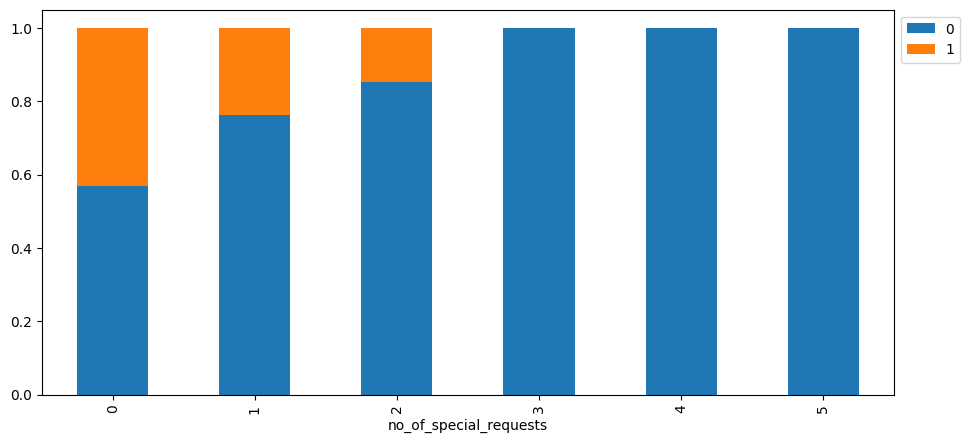

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status") ## Complete the code to plot stacked barplot for no of special requests and booking status

The stacked bar plot for the number of special requests and booking status provides insights into how special requests impact booking cancellations. Here’s what this data tells us in the context of the business problem:
Observations from the Stacked Bar Plot

    No Special Requests:
        Significant proportion of cancellations (approximately 40%).
        Indicates higher likelihood of cancellations when no special requests are made.
    One Special Request:
        Lower proportion of cancellations compared to no special requests (approximately 30%).
        Suggests that making at least one special request may reduce the likelihood of cancellations.
    Two Special Requests:
        Further reduced proportion of cancellations (approximately 15%).
        Indicates a trend that guests with more special requests are less likely to cancel.
    Three or More Special Requests:
        Very low to no cancellations for three, four, and five special requests.
        Strong indication that guests making multiple special requests are highly committed to their bookings.

Business Context Interpretation

    Special Requests Indicate Commitment:
        Guests who make special requests, particularly multiple requests, show a higher level of commitment to their bookings. They are less likely to cancel compared to those who make no or fewer requests.
        This can be attributed to the personalization and additional effort they expect from the hotel, which likely makes them more invested in their stay.

    Higher Risk with No Special Requests:
        The higher cancellation rate among guests with no special requests indicates a lower level of engagement or commitment. These guests may be more flexible with their plans and feel less tied to the booking.

Strategic Recommendations

    Enhance Personalization:
        Encourage Special Requests: Actively encourage guests to make special requests during the booking process. This can be done by highlighting the hotel’s ability to cater to personalized needs.
        Promote Customization: Offer customization options and make it easy for guests to communicate their preferences. This can include room preferences, dietary requirements, and additional services.

    Improve Guest Engagement:
        Pre-Stay Communication: Increase communication with guests who have made no special requests. Send reminders, offer additional services, and emphasize the benefits of making their stay more personalized.
        Incentives for Non-Cancellation: Provide incentives such as discounts, loyalty points, or upgrades for guests who do not cancel their bookings, especially those who make no special requests.

    Operational Adjustments:
        Training Staff: Train staff to handle special requests efficiently and ensure they understand the importance of these requests in reducing cancellations.
        Resource Allocation: Allocate resources to better manage and fulfill special requests. This can enhance guest satisfaction and commitment.

    Data-Driven Decision Making:
        Predictive Analytics: Use predictive analytics to identify high-risk bookings based on the number of special requests. Implement targeted interventions to reduce the likelihood of cancellations.
        Continuous Improvement: Continuously collect and analyze data on special requests and cancellations to refine strategies and improve guest engagement.

Conclusion

The analysis of special requests and booking status reveals a clear relationship between the level of personalization requested by guests and their likelihood of canceling. By encouraging special requests and enhancing the personalization of services, the hotel can significantly reduce cancellation rates and improve overall guest satisfaction. Focusing on guests with no special requests through increased engagement and incentives can further mitigate the risk of cancellations and optimize the hotel’s operational efficiency and revenue management.

**Let's see if the special requests made by the customers impacts the prices of a room**

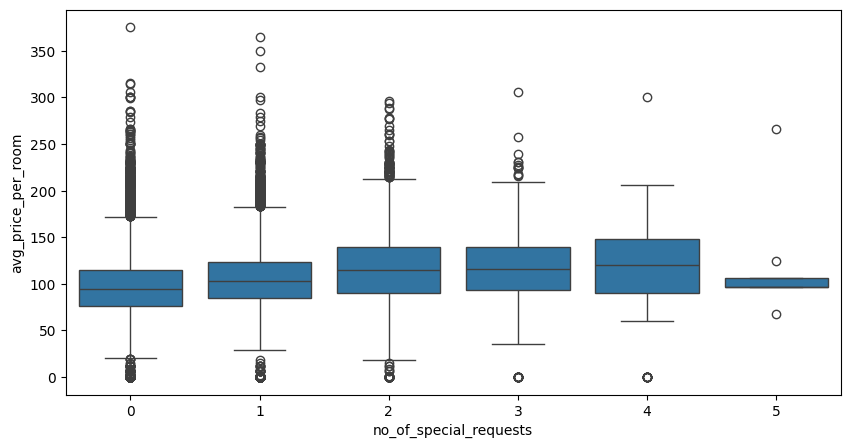

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="no_of_special_requests", y="avg_price_per_room", data=data)  ## Complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.show()

The boxplot for the number of special requests and average price per room provides valuable insights into the relationship between special requests and the pricing of rooms. Here’s what this data tells us in the context of the business problem:
Observations from the Boxplot

    Price Distribution Across Special Requests:
        For 0, 1, and 2 special requests, the median price per room remains relatively stable around $100.
        For 3 special requests, the median price remains consistent with the lower request categories.
        For 4 and 5 special requests, the median price is slightly higher but not significantly different from the other categories.

    Variability and Outliers:
        There are several outliers across all categories, indicating that there are high-priced rooms booked with varying numbers of special requests.
        The range of prices (interquartile range) remains relatively similar across categories, suggesting that the number of special requests does not drastically affect room prices.

Business Context Interpretation

    No Significant Price Increase with More Requests:
        The median price per room does not significantly increase with the number of special requests. This suggests that guests making more special requests do not necessarily book higher-priced rooms.
        The stability in median prices across different levels of special requests indicates that special requests are common across all room price categories.

    Outliers and High-Value Rooms:
        The presence of outliers in each category indicates that high-value rooms are booked regardless of the number of special requests. This could be due to specific high-demand periods or particular guest preferences.

Strategic Recommendations

    Enhance Service Across All Segments:
        Standardized Service Quality: Ensure that the quality of service, especially in handling special requests, is consistent across all room price segments. This will enhance overall guest satisfaction.
        Training Staff: Train staff to efficiently manage and fulfill special requests for all guests, regardless of the room price they are paying.

    Market Personalized Services:
        Promotion of Personalization: Promote the hotel’s ability to cater to personalized requests in marketing materials. Highlight the convenience and benefits of making special requests to attract guests who value customized experiences.
        Tailored Packages: Develop tailored packages that include special requests as part of the booking, offering added value without significantly increasing the price.

    Leverage Data for Pricing Strategies:
        Dynamic Pricing: Implement dynamic pricing strategies that account for high-demand periods and special events, which can lead to outliers in pricing. Adjust prices in real-time based on market conditions and demand forecasts.
        Customer Segmentation: Use data analytics to segment customers based on their booking patterns and special requests. Offer personalized deals and services to different segments to enhance their booking experience.

    Feedback and Improvement:
        Collect Feedback: Regularly collect feedback from guests about their satisfaction with how special requests are handled. Use this information to continuously improve services and address any gaps.
        Monitor Trends: Monitor trends in special requests and adjust service offerings accordingly. For example, if certain requests become more common, consider incorporating them into the standard room amenities.

Conclusion

The analysis of the relationship between special requests and room prices reveals that special requests are made across all room price categories without significantly affecting the median price. This indicates that guests value personalized services regardless of the price they pay for the room. By enhancing the ability to handle special requests efficiently and promoting this capability, the hotel can improve guest satisfaction and attract a wider range of customers. Implementing dynamic pricing and personalized marketing strategies can further optimize revenue and enhance the guest experience.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

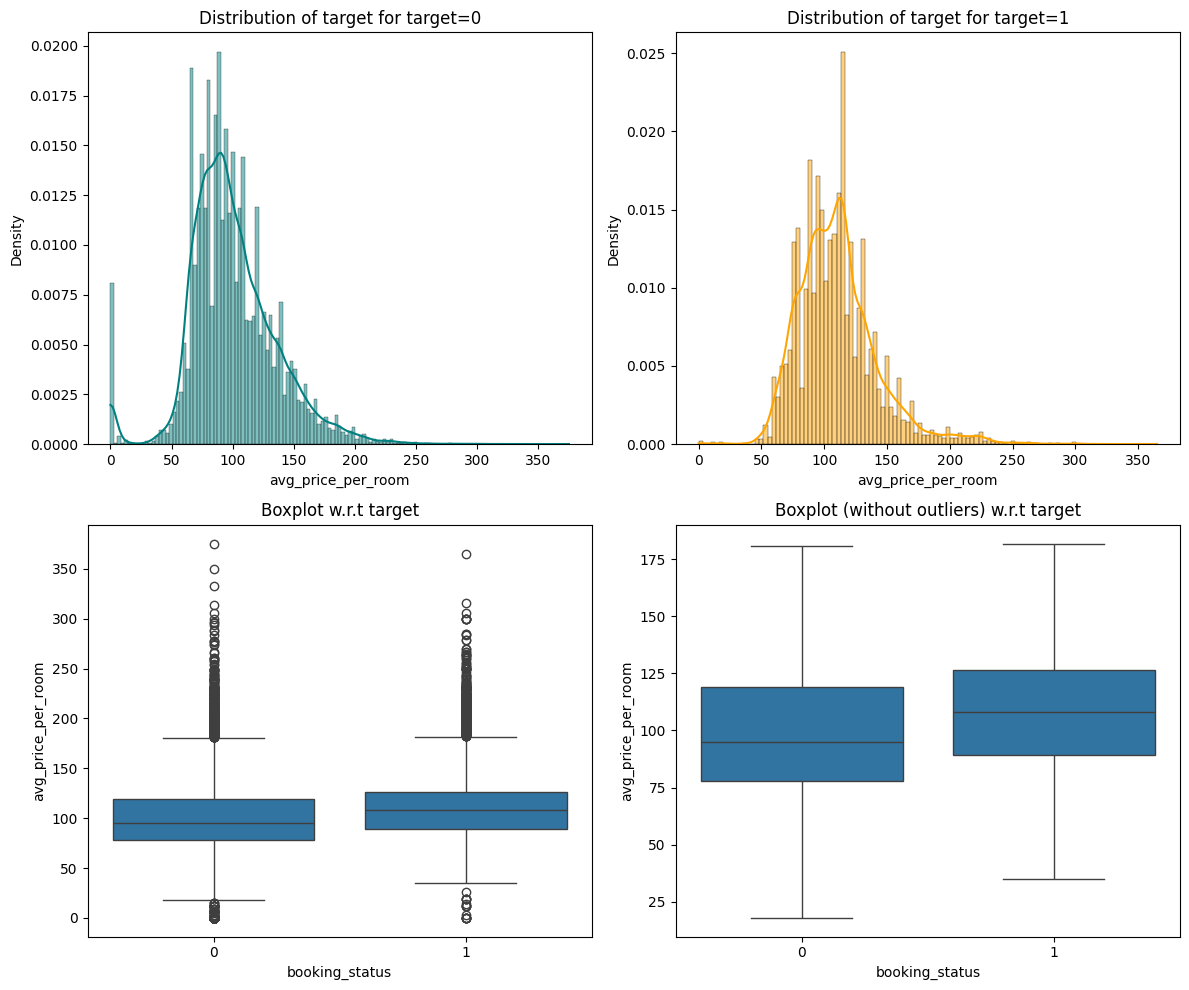

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

The analysis of average price per room with respect to booking status (target) provides important insights into the relationship between room pricing and booking outcomes. Here’s what this data tells us in the context of the business problem:
Observations from the Distribution Plots and Boxplots

    Distribution of Prices for Canceled Bookings (target=1):
        The distribution is slightly skewed towards lower prices with a peak around $100.
        There are noticeable cancellations across a wide range of prices, including higher price ranges.

    Distribution of Prices for Non-Canceled Bookings (target=0):
        The distribution also peaks around $100, similar to the canceled bookings.
        The range of non-canceled bookings also covers a wide spectrum of prices, but the density of higher prices seems slightly higher compared to canceled bookings.

    Boxplots Comparison:
        The boxplots for both canceled and non-canceled bookings show a similar median price around $100.
        There is a wider range and more outliers for canceled bookings compared to non-canceled bookings, indicating more variability in the prices of rooms that are canceled.

    Boxplots Without Outliers:
        The median price remains consistent around $100 for both canceled and non-canceled bookings.
        The interquartile range (IQR) is also similar, suggesting that the core distribution of prices is comparable regardless of the booking status.

Business Context Interpretation

    Price Consistency:
        The median price of around $100 is consistent for both canceled and non-canceled bookings, suggesting that price alone is not a strong predictor of cancellation.
        This indicates that other factors beyond price, such as booking conditions, guest preferences, or external circumstances, might play a significant role in cancellations.

    Higher Variability in Canceled Bookings:
        The higher variability and presence of outliers in canceled bookings indicate that cancellations occur across a broader price range, including higher-priced rooms.
        This suggests that even guests booking higher-priced rooms might cancel, possibly due to more flexible cancellation policies or changes in travel plans.

Strategic Recommendations

    Enhanced Cancellation Policies:
        Flexible yet Balanced Policies: Consider implementing more balanced cancellation policies that provide flexibility to guests while minimizing the risk of revenue loss for the hotel. For example, offer tiered cancellation options with varying degrees of flexibility based on the price or lead time.
        Incentives for Commitment: Provide incentives for guests to commit to their bookings, such as offering discounts or loyalty points for non-cancellable or partially refundable bookings.

    Targeted Engagement:
        Pre-Stay Communication: Increase engagement with guests, especially those who have booked higher-priced rooms. Send reminders and offer additional services or upgrades to encourage them to maintain their bookings.
        Identify High-Risk Bookings: Use data analytics to identify high-risk bookings (e.g., bookings with a high likelihood of cancellation based on historical patterns) and implement targeted interventions to reduce cancellations.

    Personalized Offers:
        Customized Packages: Create customized packages that bundle special requests or additional services with the room booking, making it more attractive for guests to commit to their stay.
        Dynamic Pricing: Implement dynamic pricing strategies that adjust room rates based on demand, booking patterns, and guest behavior. This can help optimize occupancy and revenue management.

    Feedback and Continuous Improvement:
        Collect Guest Feedback: Gather feedback from guests who cancel their bookings to understand the reasons behind their decisions. Use this information to refine cancellation policies and service offerings.
        Monitor Trends: Continuously monitor trends in booking cancellations and adjust strategies accordingly. This can help the hotel stay agile and responsive to changing market conditions and guest preferences.

Conclusion

The analysis reveals that the average price per room is consistent across both canceled and non-canceled bookings, with higher variability observed in canceled bookings. This suggests that factors beyond price, such as booking conditions and guest preferences, influence cancellations. By enhancing cancellation policies, engaging guests more effectively, offering personalized packages, and continuously monitoring trends, the hotel can reduce cancellations, optimize revenue, and improve overall guest satisfaction.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

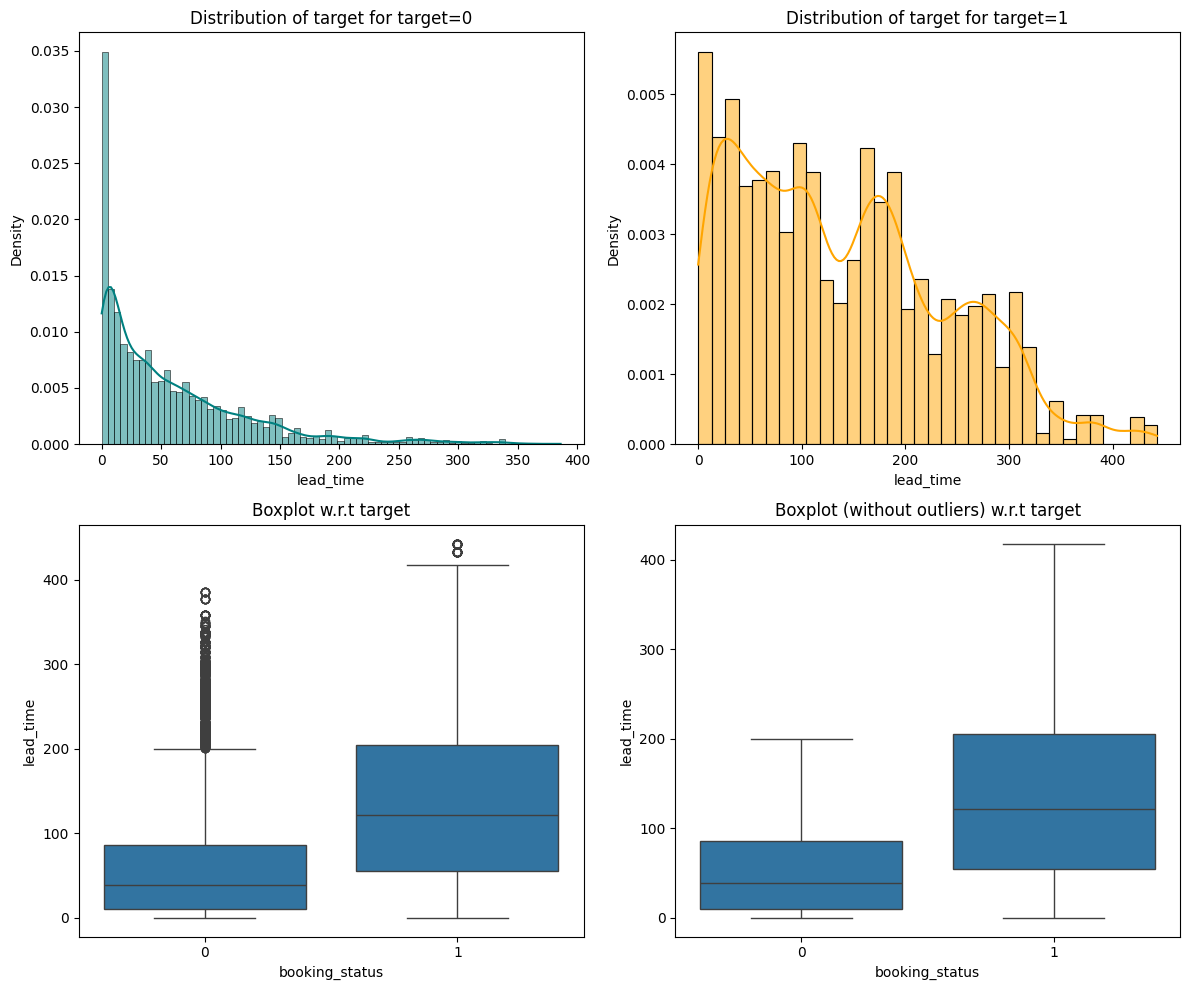

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status") ## Complete the code to find distribution of lead time wrt booking status

The analysis of lead time with respect to booking status provides crucial insights into how the timing of bookings impacts cancellations. Here’s what this data tells us in the context of the business problem:
Observations from the Distribution Plots and Boxplots

    Distribution of Lead Time for Non-Canceled Bookings (target=0):
        The distribution is highly skewed towards shorter lead times, with the majority of non-canceled bookings having lead times less than 50 days.
        The density decreases significantly as lead time increases, indicating that shorter lead times are more common for non-canceled bookings.

    Distribution of Lead Time for Canceled Bookings (target=1):
        The distribution for canceled bookings shows a broader range of lead times, with a noticeable density even at higher lead times (100-200 days).
        This indicates that bookings with longer lead times are more likely to be canceled compared to those with shorter lead times.

    Boxplots Comparison:
        The boxplot for canceled bookings (target=1) shows a higher median lead time compared to non-canceled bookings.
        There is a wider interquartile range (IQR) for canceled bookings, indicating greater variability in lead times.
        The presence of numerous outliers for canceled bookings suggests that very long lead times are particularly prone to cancellations.

Business Context Interpretation

    Longer Lead Times Correlate with Higher Cancellation Rates:
        The data clearly shows that bookings with longer lead times are more likely to be canceled. This could be due to a variety of reasons such as changes in travel plans, greater uncertainty over longer periods, or more flexible cancellation policies.

    Shorter Lead Times Indicate Higher Commitment:
        Guests who book closer to their stay date are less likely to cancel, likely because their plans are more concrete and they have less time to change them.

Strategic Recommendations

    Adjust Cancellation Policies Based on Lead Time:
        Stricter Policies for Longer Lead Times: Implement stricter cancellation policies for bookings made well in advance. For example, require a non-refundable deposit or offer only partial refunds for cancellations made after a certain period.
        Flexible Policies for Shorter Lead Times: Provide more flexible cancellation policies for bookings with shorter lead times to accommodate last-minute changes and attract more last-minute bookings.

    Engage Early Bookers:
        Proactive Communication: Increase engagement with guests who book well in advance. Send reminders, offer additional services, or provide incentives to encourage them to maintain their bookings.
        Offer Incentives for Commitment: Provide incentives such as discounts, loyalty points, or upgrades for guests who commit to non-cancellable bookings or who shorten their lead time by making final confirmations closer to their stay.

    Dynamic Pricing and Booking Management:
        Dynamic Pricing: Use dynamic pricing strategies that adjust room rates based on lead time, demand forecasts, and historical cancellation patterns. This can help optimize occupancy and revenue management.
        Overbooking Strategies: Consider implementing controlled overbooking strategies for periods with historically high cancellation rates to mitigate revenue loss.

    Predictive Analytics and Risk Management:
        Develop Predictive Models: Use predictive analytics to identify high-risk bookings based on lead time and other factors. Implement targeted interventions for bookings with a high likelihood of cancellation.
        Monitor and Adapt: Continuously monitor booking patterns and lead times to adapt strategies and policies as needed to reduce cancellations and improve guest satisfaction.

Conclusion

The analysis reveals a clear relationship between lead time and booking status, with longer lead times associated with higher cancellation rates. By adjusting cancellation policies, engaging early bookers more effectively, implementing dynamic pricing, and leveraging predictive analytics, the hotel can reduce cancellations, optimize revenue, and enhance overall guest satisfaction. Understanding these dynamics allows the hotel to make data-driven decisions that align with guest preferences and market conditions.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [ ]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


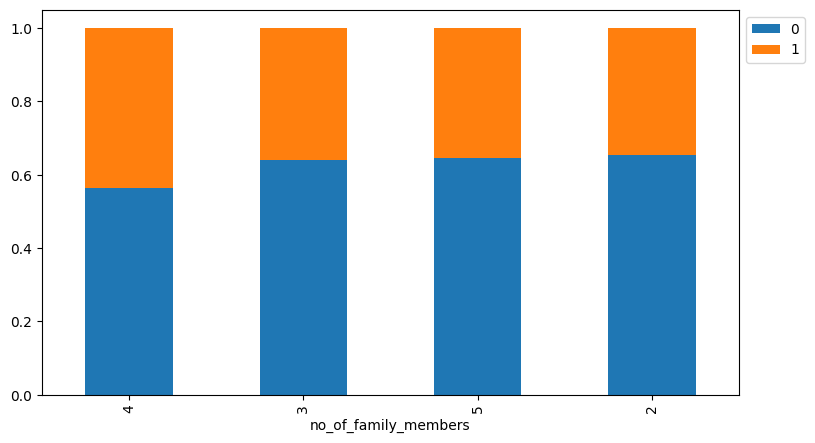

In [ ]:
stacked_barplot(family_data, "no_of_family_members", "booking_status") ## Complete the code to plot stacked barplot for no of family members and booking status

The stacked bar plot for the number of family members and booking status provides insights into the impact of family size on booking cancellations. Here’s what this data tells us in the context of the business problem:
Observations from the Stacked Bar Plot

    Higher Cancellation Rates for Smaller Families:
        For families with 3 or fewer members, the proportion of canceled bookings (orange bars) is higher compared to larger families.
        This indicates that smaller family groups are more likely to cancel their bookings.

    Lower Cancellation Rates for Larger Families:
        For families with 4 or more members, the proportion of canceled bookings is lower, indicating higher commitment.
        This suggests that larger families are less likely to cancel their bookings.

Business Context Interpretation

    Smaller Families More Likely to Cancel:
        Smaller families, particularly those with only 2 or 3 members, exhibit higher cancellation rates. This could be due to the flexibility in their plans or fewer dependencies compared to larger families.
        Marketing and engagement strategies should consider the higher likelihood of cancellations within this segment.

    Larger Families Show Higher Commitment:
        Larger families, with 4 or more members, show lower cancellation rates, indicating higher booking commitment.
        Family vacations involving more members are likely planned well in advance and are less prone to changes.

Strategic Recommendations

    Engage Smaller Families:
        Incentives for Commitment: Provide incentives such as discounts, loyalty points, or non-refundable deposits for smaller families to encourage booking commitment.
        Flexible Cancellation Policies: Offer more flexible cancellation policies for smaller families to accommodate last-minute changes without significant revenue loss.

    Enhance Offerings for Larger Families:
        Promote Family Packages: Develop and promote family-friendly packages that include special offers and amenities tailored for larger families. Highlight the benefits of booking family packages to encourage commitment.
        Engage Early Bookers: Increase engagement with larger families who book well in advance by offering personalized communication, reminders, and additional services to enhance their experience.

    Dynamic Pricing and Overbooking Strategies:
        Dynamic Pricing: Implement dynamic pricing strategies that adjust room rates based on family size, lead time, and historical cancellation patterns to optimize occupancy and revenue management.
        Controlled Overbooking: Consider controlled overbooking strategies for smaller family segments with higher historical cancellation rates to mitigate potential revenue loss.

    Predictive Analytics and Risk Management:
        Develop Predictive Models: Use predictive analytics to identify high-risk bookings based on family size and other factors. Implement targeted interventions for bookings with a high likelihood of cancellation.
        Monitor and Adapt: Continuously monitor booking patterns and family size trends to adapt strategies and policies as needed to reduce cancellations and improve guest satisfaction.

    Enhanced Services and Amenities:
        Family Amenities: Enhance amenities and services for families, such as providing larger rooms, family dining options, and activities for children. This can improve the overall experience and encourage repeat bookings.
        Special Requests Handling: Ensure that special requests from families are handled efficiently to meet their needs and increase satisfaction.

Conclusion

The analysis reveals that smaller families are more likely to cancel their bookings compared to larger families, who show higher commitment. By implementing targeted engagement strategies, offering family-friendly packages, adjusting cancellation policies, and leveraging predictive analytics, the hotel can reduce cancellations, optimize revenue, and enhance overall guest satisfaction. Understanding these dynamics allows the hotel to cater to different traveler segments effectively and enhance the overall guest experience.


**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [ ]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [ ]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

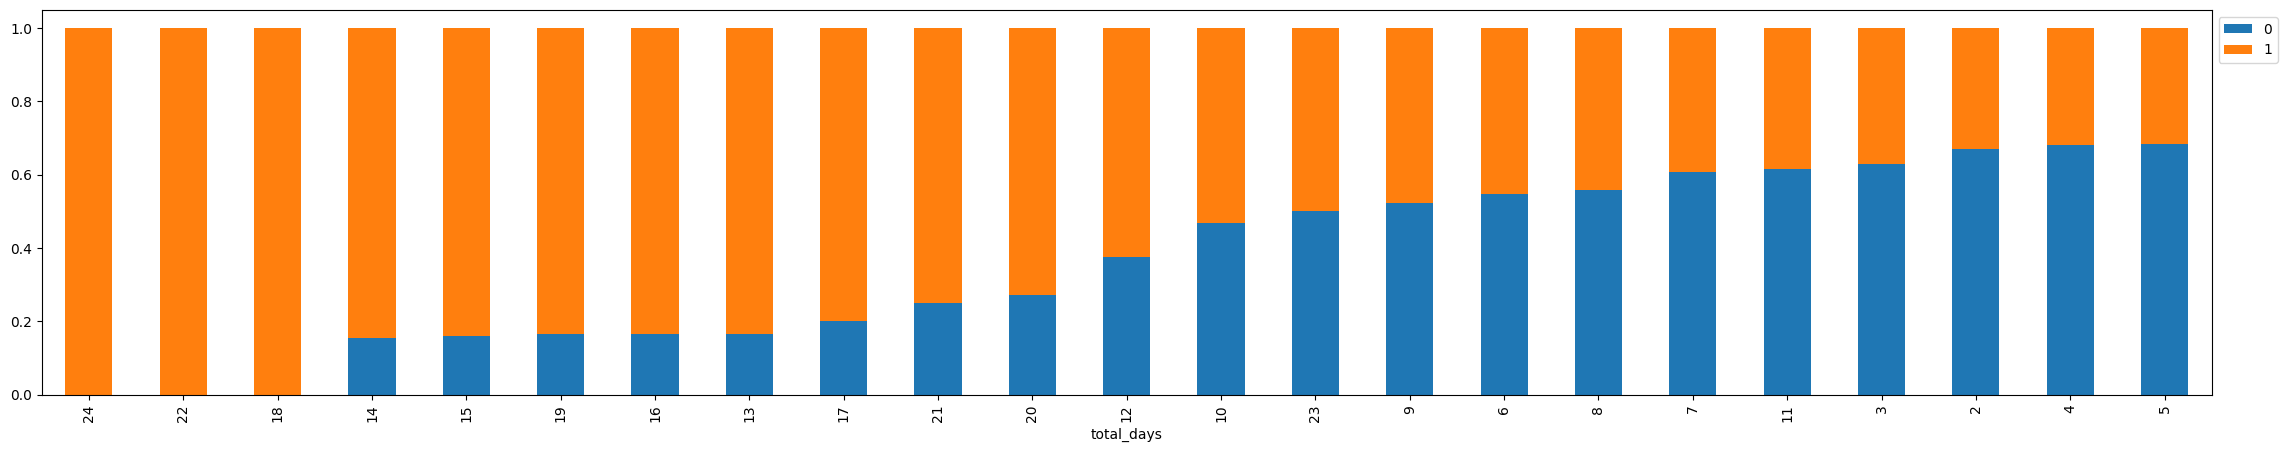

In [ ]:
stacked_barplot(stay_data, "total_days", "booking_status") ## Complete the code to plot stacked barplot for total days and booking status

The stacked bar plot for total days and booking status provides insights into how the length of stay impacts booking cancellations. Here’s what this data tells us in the context of the business problem:
Observations from the Stacked Bar Plot

    Lower Cancellation Rates for Shorter Stays (1-3 days):
        For stays of 1 to 3 days, the proportion of canceled bookings (orange bars) is relatively low compared to non-canceled bookings (blue bars).
        This indicates that guests with shorter stays are less likely to cancel their bookings.

    Higher Cancellation Rates for Longer Stays (4-7 days):
        For stays of 4 to 7 days, the proportion of canceled bookings increases, suggesting higher cancellation rates for mid-length stays.
        This could be due to increased flexibility in travel plans or changes in circumstances over a longer period.

    Mixed Cancellation Rates for Extended Stays (8+ days):
        For extended stays of 8 days or more, the cancellation rates vary, with some days showing higher cancellations and others showing lower rates.
        This suggests that while some extended stays may be prone to cancellations, others are more committed.

Business Context Interpretation

    Shorter Stays Indicate Higher Commitment:
        Guests planning to stay for shorter durations (1-3 days) are more likely to keep their bookings, indicating higher commitment levels.
        This behavior could be attributed to specific events or short trips that have concrete plans.

    Mid-Length Stays Prone to Cancellations:
        The higher cancellation rates for stays of 4-7 days suggest that guests with mid-length stays are more flexible with their plans and more likely to cancel.
        This could be due to uncertainties or changes in travel itineraries over a week-long period.

    Varied Commitment for Extended Stays:
        The mixed cancellation rates for stays of 8 days or more indicate that extended stays have varying levels of commitment.
        This could be influenced by the purpose of the stay (e.g., long vacations, business trips) and external factors affecting travel plans.

Strategic Recommendations

    Incentivize Shorter Stays:
        Promote Short-Stay Packages: Develop and promote packages specifically designed for short stays (1-3 days) with attractive offers and amenities to encourage bookings.
        Flexible Policies for Short Stays: Offer flexible booking and cancellation policies for shorter stays to attract more last-minute bookings and reduce cancellations.

    Engage Guests with Mid-Length Stays:
        Personalized Communication: Increase engagement with guests planning mid-length stays (4-7 days) by offering personalized communication, reminders, and additional services to encourage commitment.
        Incentives for Commitment: Provide incentives such as non-refundable deposits, discounts, or loyalty points for guests who commit to mid-length stays.

    Enhance Offerings for Extended Stays:
        Extended Stay Amenities: Enhance amenities and services for extended stays (8+ days), such as providing kitchenettes, laundry services, and workspace facilities to improve the overall experience.
        Engage Early Bookers: Increase engagement with guests who book extended stays by offering personalized communication, reminders, and additional services to enhance their experience.

    Dynamic Pricing and Overbooking Strategies:
        Dynamic Pricing: Implement dynamic pricing strategies that adjust room rates based on the length of stay, demand forecasts, and historical cancellation patterns to optimize occupancy and revenue management.
        Controlled Overbooking: Consider controlled overbooking strategies for mid-length stays with higher historical cancellation rates to mitigate potential revenue loss.

    Predictive Analytics and Risk Management:
        Develop Predictive Models: Use predictive analytics to identify high-risk bookings based on the length of stay and other factors. Implement targeted interventions for bookings with a high likelihood of cancellation.
        Monitor and Adapt: Continuously monitor booking patterns and stay length trends to adapt strategies and policies as needed to reduce cancellations and improve guest satisfaction.

Conclusion

The analysis reveals that shorter stays are associated with higher commitment and lower cancellation rates, while mid-length stays have higher cancellation rates, and extended stays show mixed results. By implementing targeted engagement strategies, offering tailored packages, adjusting cancellation policies, and leveraging predictive analytics, the hotel can reduce cancellations, optimize revenue, and enhance overall guest satisfaction. Understanding these dynamics allows the hotel to cater to different traveler segments effectively and enhance the overall guest experience.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


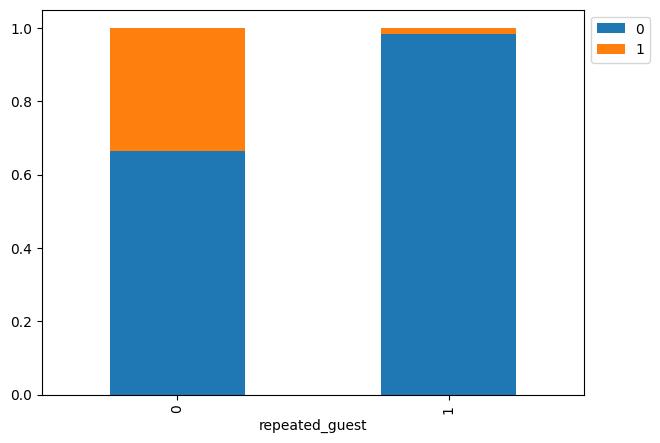

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status") ## Complete the code to plot stacked barplot for repeated guests and booking status

Interpretation of the Stacked Bar Plot for Repeated Guests and Booking Status

    Lower Cancellation Rates for Repeated Guests:
        The plot indicates that repeated guests (indicated by 1 on the x-axis) have significantly lower cancellation rates compared to new guests (indicated by 0 on the x-axis).
        The proportion of canceled bookings (orange bar) for repeated guests is very small compared to the proportion of non-canceled bookings (blue bar).

    Higher Cancellation Rates for New Guests:
        New guests have a higher proportion of canceled bookings compared to repeated guests.
        This suggests that new guests are more likely to cancel their bookings than those who have stayed at the hotel before.

Business Context Interpretation

    Higher Commitment from Repeated Guests:
        Repeated guests demonstrate higher commitment levels, as evidenced by their lower cancellation rates.
        This behavior likely results from their positive past experiences and familiarity with the hotel's services.

    Need for Engagement with New Guests:
        New guests exhibit higher cancellation rates, indicating a need for strategies to engage and retain them.
        This could involve addressing the uncertainties or concerns that new guests might have about their stay.

Strategic Recommendations

    Enhance Loyalty Programs:
        Loyalty Rewards: Strengthen loyalty programs to reward repeated guests with benefits such as discounts, room upgrades, and exclusive services. This can encourage them to continue choosing the hotel for their stays.
        Personalized Offers: Provide personalized offers and communication to repeated guests to reinforce their loyalty and commitment.

    Engage and Convert New Guests:
        Welcome Packages: Offer welcome packages or special incentives for new guests to encourage them to keep their bookings and return in the future.
        Flexible Policies for New Guests: Implement more flexible booking and cancellation policies for new guests to accommodate last-minute changes and reduce the likelihood of cancellations.

    Monitor and Analyze Guest Behavior:
        Predictive Analytics: Use predictive analytics to identify high-risk bookings based on guest history (new vs. repeated). Implement targeted interventions for bookings with a high likelihood of cancellation.
        Feedback and Improvement: Collect feedback from both new and repeated guests to understand their needs and preferences. Use this information to improve services and reduce cancellations.

    Promote Brand Loyalty:
        Brand Communication: Strengthen brand communication to highlight the benefits and experiences of being a repeated guest. Use testimonials and success stories to build trust and loyalty.
        Engage on Multiple Channels: Engage with guests on multiple channels (email, social media, in-app notifications) to maintain communication and reinforce brand loyalty.

Conclusion

The analysis reveals that repeated guests have significantly lower cancellation rates compared to new guests, indicating higher booking commitment. By enhancing loyalty programs, offering personalized offers, engaging new guests, and leveraging predictive analytics, the hotel can reduce cancellations, optimize revenue, and enhance overall guest satisfaction. Understanding these dynamics allows the hotel to cater to different traveler segments effectively and build long-term brand loyalty.

**Let's find out what are the busiest months in the hotel.**

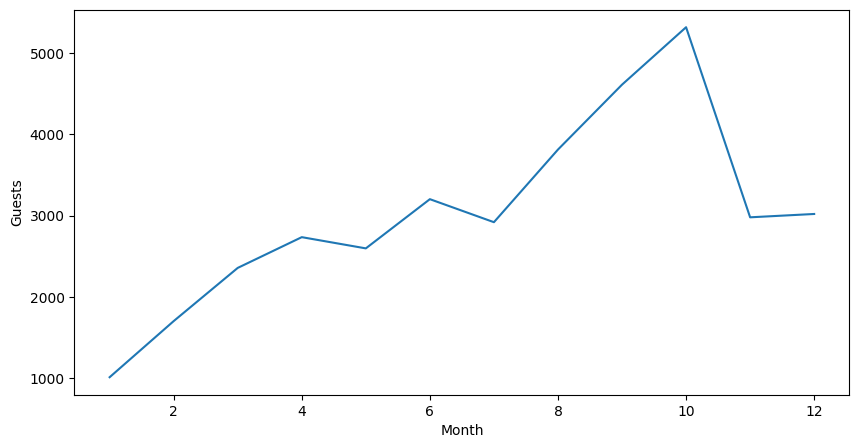

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

Interpretation of the Line Plot Showing Busiest Months

The line plot depicts the trend of guest arrivals throughout the different months of the year. Here’s what this data tells us in the context of the business problem:

    Identifying Peak Months:
        The busiest months for the hotel, as indicated by the highest number of guests, are months 9 and 10 (September and October).
        There is a noticeable increase in guest arrivals starting from month 4 (April) and peaking around month 10 (October).

    Low Activity Periods:
        The least busy months are months 1, 2, and 3 (January, February, and March), as well as month 12 (December), indicating lower guest arrivals during these periods.
        These low activity periods might be influenced by seasonal factors, holidays, or other external events affecting travel.

Business Context Interpretation

    Seasonal Trends:
        The plot reveals a clear seasonal trend, with guest arrivals gradually increasing from April, peaking in September and October, and then declining towards the end of the year.
        Understanding these trends can help in planning marketing and operational strategies to maximize occupancy during peak seasons and improve business during off-peak periods.

    Resource Allocation:
        Knowing the busiest and least busy months allows for better resource allocation, including staffing, inventory management, and maintenance schedules.
        During peak months, the hotel can ensure sufficient staff and resources to handle the higher number of guests and maintain service quality.

Strategic Recommendations

    Peak Season Strategies:
        Dynamic Pricing: Implement dynamic pricing strategies during peak months (September and October) to maximize revenue. Higher demand allows for increased room rates.
        Special Promotions: Offer special promotions and packages during these months to attract more guests and enhance their stay experience.

    Off-Peak Season Strategies:
        Discounts and Offers: Introduce discounts and special offers during off-peak months (January, February, March, and December) to attract guests and improve occupancy rates.
        Corporate Partnerships: Develop partnerships with corporate clients to offer special rates for business travelers during these periods.

    Marketing and Advertising:
        Targeted Campaigns: Launch targeted marketing campaigns leading up to the peak months to attract more guests. Highlight unique experiences and events taking place during these periods.
        Local Events and Attractions: Promote local events and attractions to entice guests to visit during the off-peak months. This can help in boosting occupancy during slower periods.

    Operational Efficiency:
        Staffing Adjustments: Adjust staffing levels based on the anticipated number of guests. Increase staffing during peak months to maintain service quality and reduce it during off-peak periods to optimize costs.
        Maintenance and Upgrades: Schedule maintenance and upgrades during the least busy months to minimize disruption to guests and ensure the hotel is in top condition for the peak season.

    Customer Loyalty Programs:
        Reward Programs: Strengthen loyalty programs to encourage repeat visits. Offer exclusive benefits for guests who book during off-peak periods.
        Feedback and Improvement: Collect feedback from guests to continuously improve services and enhance the overall guest experience.

Conclusion

The analysis of the busiest months reveals significant seasonal trends in guest arrivals, with peaks in September and October and lows in January, February, March, and December. By implementing dynamic pricing, targeted marketing campaigns, operational efficiency strategies, and customer loyalty programs, the hotel can optimize occupancy and revenue throughout the year. Understanding these trends allows the hotel to effectively plan and execute strategies to enhance guest satisfaction and achieve business goals.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


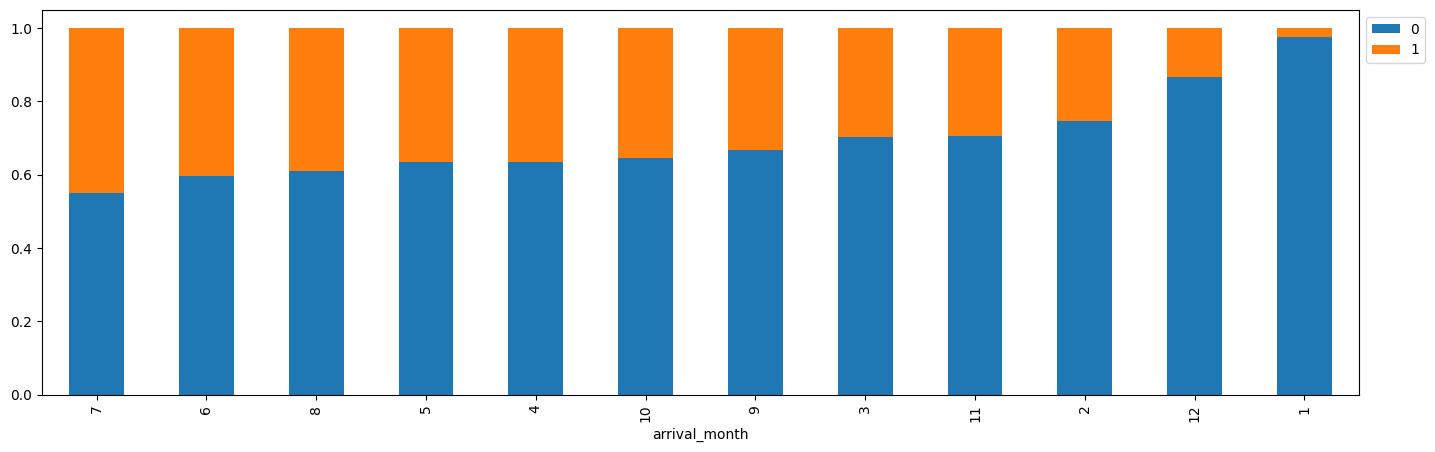

In [ ]:
stacked_barplot(data, "arrival_month", "booking_status") ## Complete the code to plot stacked barplot for arrival month and booking status

Interpretation of the Stacked Bar Plot Showing Booking Cancellations by Arrival Month

The stacked bar plot depicts the proportion of canceled (orange) and non-canceled (blue) bookings across different arrival months. Here's what this data tells us in the context of the business problem:

    Proportion of Cancellations:
        The plot shows the percentage of bookings canceled each month. Months with a higher proportion of orange indicate higher cancellation rates.
        The months with relatively higher cancellation rates include June, July, and August (mid-year months).

    Cancellation Trends:
        There is a noticeable increase in cancellations during the summer months, which might be attributed to travel uncertainties or changes in travel plans during vacation periods.
        Months like January and December show lower cancellation rates, indicating more stable booking behavior during these periods.

Business Context Interpretation

    Seasonal Cancellation Insights:
        The higher cancellation rates during mid-year (summer) months suggest that guests are more likely to change or cancel their travel plans during this period. This could be due to vacations, weather, or other seasonal factors.
        Lower cancellations during the start and end of the year indicate more stable bookings, possibly due to holiday plans or year-end vacations that are less likely to change.

Strategic Recommendations

    Flexible Booking Policies:
        Mid-Year Months: Implement more flexible booking and cancellation policies during June, July, and August to accommodate guests' changing plans. This could include options for rescheduling or partial refunds.
        Incentives for Non-Cancellations: Offer incentives for guests who do not cancel their bookings, such as discounts on future stays or complimentary services.

    Targeted Marketing Campaigns:
        Summer Promotions: Launch targeted marketing campaigns before the summer months to secure bookings and reduce cancellations. Highlight unique experiences and events to encourage guests to commit to their travel plans.
        Off-Peak Offers: Promote special offers during months with lower cancellation rates to attract more bookings and maximize occupancy.

    Resource Planning and Management:
        Staffing Adjustments: Adjust staffing levels based on expected occupancy and cancellations. Ensure sufficient staff during peak months to handle higher occupancy and maintain service quality.
        Operational Efficiency: Plan maintenance and upgrades during months with higher cancellation rates to minimize disruption and optimize resources.

Conclusion

The analysis of booking cancellations by arrival month reveals significant seasonal trends, with higher cancellations during mid-year months and lower cancellations at the start and end of the year. By implementing flexible booking policies, targeted marketing campaigns, and efficient resource planning, the hotel can manage cancellations more effectively and enhance overall guest satisfaction. Understanding these trends allows the hotel to plan and execute strategies to achieve business goals and improve operational efficiency.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room") ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

Interpretation of the Line Plot Showing Average Price Per Room by Arrival Month

The line plot illustrates how the average price per room varies across different arrival months. Here’s what this data tells us in the context of the business problem:

    Seasonal Pricing Trends:
        There is a clear seasonal trend in room pricing, with the average price per room peaking during the mid-year months (July, August) and reaching its lowest in the beginning and end of the year (January, December).
        The peak prices in the summer months are likely due to higher demand during the vacation season, while the lower prices in January and December could be due to lower demand during off-peak periods.

    Dynamic Pricing Strategy:
        The hotel employs a dynamic pricing strategy, adjusting room rates based on demand. Higher prices during peak seasons maximize revenue when demand is high, while lower prices during off-peak seasons aim to attract more guests and maintain occupancy rates.

Business Context Interpretation

    Revenue Optimization:
        The higher prices in peak months suggest an effective revenue optimization strategy, capturing higher rates when demand is robust.
        Lower prices in off-peak months indicate efforts to attract guests through competitive pricing during periods of lower demand.

Strategic Recommendations

    Maximize Revenue During Peak Months:
        Premium Pricing: Continue to leverage higher pricing during peak months (July, August) to maximize revenue. Consider introducing premium packages and additional services to further enhance revenue during these periods.
        Special Offers: Introduce special offers or value-added packages to encourage longer stays or higher spending by guests during peak months.

    Increase Occupancy During Off-Peak Months:
        Discounts and Promotions: Offer attractive discounts and promotions during off-peak months (January, December) to boost occupancy. Consider targeting specific segments such as business travelers or long-term stays with tailored offers.
        Marketing Campaigns: Launch targeted marketing campaigns to promote the hotel during off-peak periods, highlighting unique experiences, events, or local attractions to draw guests.

    Demand Forecasting and Pricing Adjustments:
        Continuous Monitoring: Implement continuous monitoring of booking patterns and market conditions to adjust pricing dynamically. Use predictive analytics to forecast demand and optimize pricing strategies accordingly.
        Competitor Analysis: Regularly analyze competitor pricing to ensure the hotel's rates remain competitive while maximizing revenue.

Conclusion

The analysis of average room prices by arrival month reveals significant seasonal trends, with peak prices during mid-year months and lower prices at the beginning and end of the year. By leveraging dynamic pricing strategies, the hotel can optimize revenue during high-demand periods and attract more guests during off-peak months. Understanding these pricing trends allows the hotel to plan and execute effective revenue management strategies, achieving business goals and improving operational efficiency.



## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

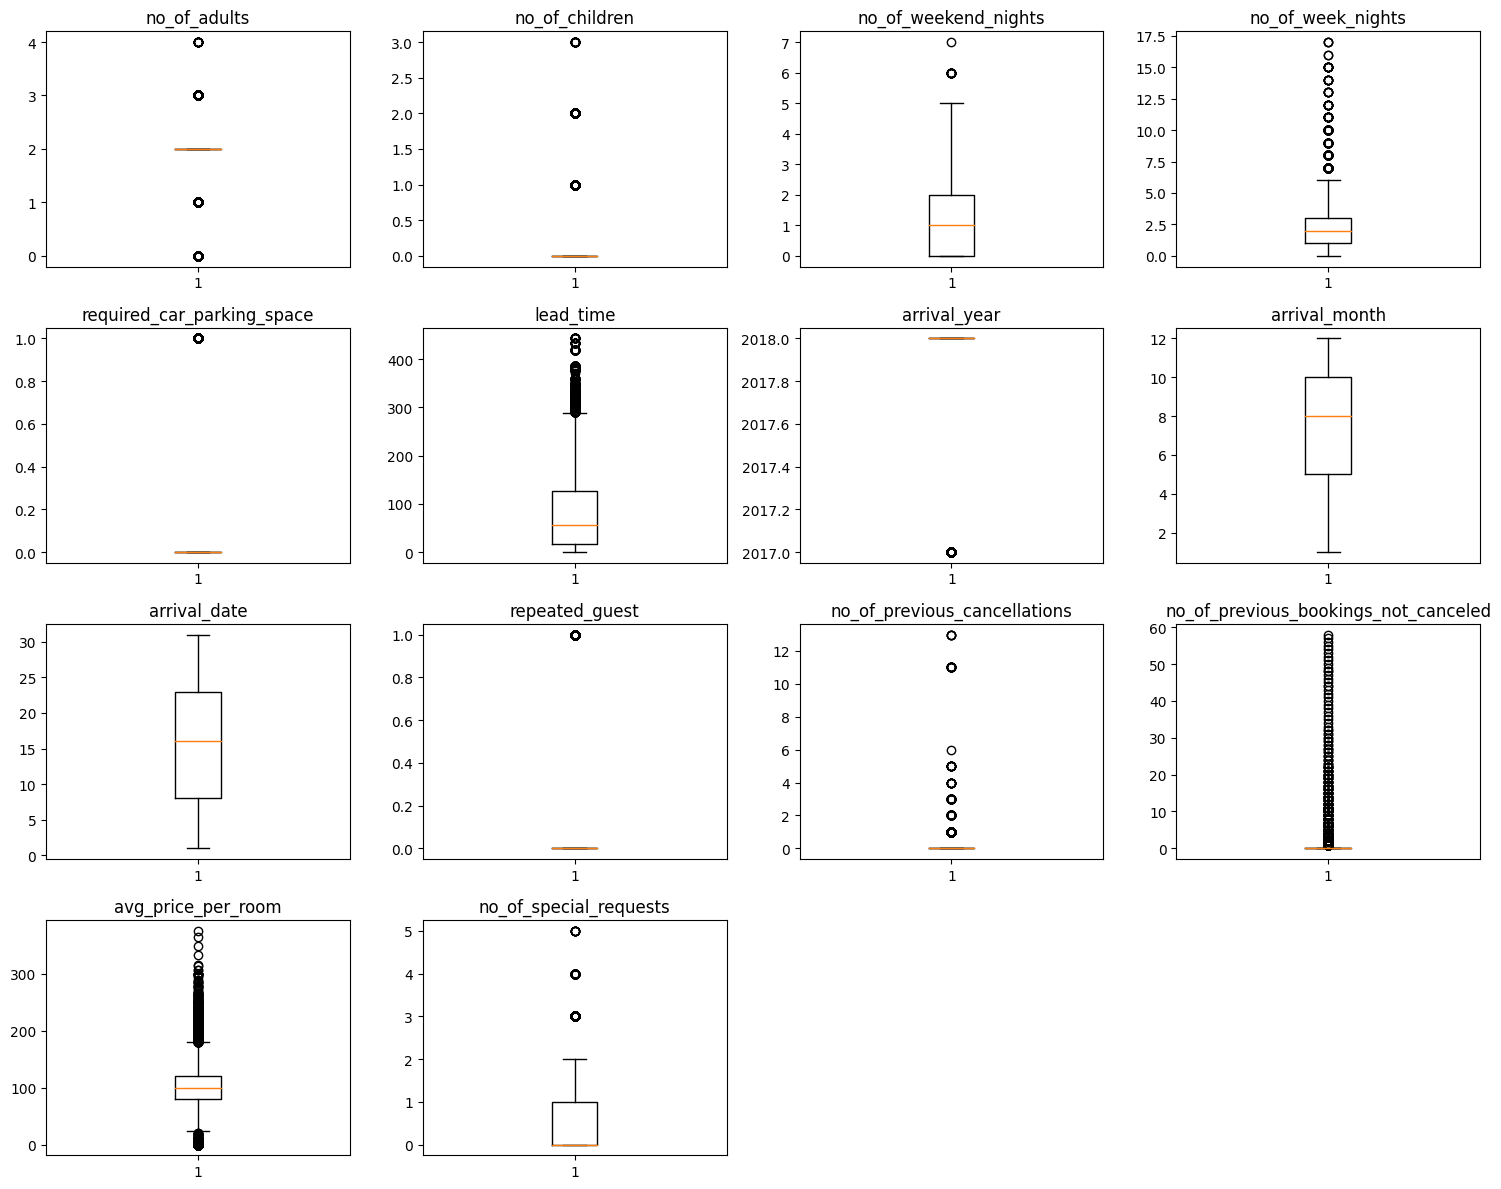

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Interpretation of Box Plots Showing Distribution of Various Features

The box plots illustrate the distribution and presence of outliers for various features in the dataset, with respect to the booking status.

    Number of Adults and Children:
        No. of Adults: Most bookings involve 1 or 2 adults, with some outliers involving up to 4 adults.
        No. of Children: Most bookings involve 0 children, with some having up to 2 children and a few outliers involving 3 children.

    Stay Duration:
        No. of Weekend Nights: Most bookings include 0 to 2 weekend nights, with a few outliers extending up to 6 or 7 weekend nights.
        No. of Week Nights: Bookings typically range from 0 to 3 week nights, with numerous outliers up to 16 nights.

    Other Features:
        Required Car Parking Space: Almost all bookings do not require a parking space, with very few outliers.
        Lead Time: Most bookings have a lead time of less than 100 days, with significant outliers up to 400 days.
        Arrival Year and Month: Arrival year is around 2017, and arrival month ranges evenly from 1 to 12.
        Arrival Date: Dates are spread from 1 to 31, with no significant outliers.
        Repeated Guest: Very few guests are repeated guests.
        Previous Cancellations and Bookings Not Canceled: Most guests have no previous cancellations, but some outliers have up to 12 previous cancellations and 60 previous bookings not canceled.
        Average Price Per Room: Prices generally range around 100, with outliers extending to over 300.
        No. of Special Requests: Most bookings have 0 to 1 special request, with outliers up to 5 requests.

Business Context Interpretation

    Outliers in Lead Time:
        The significant number of outliers in lead time suggests that some guests book far in advance, which can indicate high demand periods or special events. These outliers should be considered in dynamic pricing strategies to optimize revenue.

    Room Pricing:
        The presence of outliers in room pricing indicates that certain rooms or dates command significantly higher prices. This variability needs to be factored into pricing models to ensure accurate price predictions and revenue management.

    Special Requests:
        Outliers in the number of special requests indicate that a small subset of guests require extensive customization. Understanding these requests can help in personalizing services and improving guest satisfaction.

    Booking Behavior:
        The data shows most bookings involve a small number of adults and children, suggesting the primary customer base is small families or solo travelers. Marketing strategies can be tailored to attract these segments.

    Cancellation Patterns:
        The presence of outliers in previous cancellations highlights the importance of understanding guest behavior to mitigate risks and improve booking policies.

Strategic Recommendations

    Dynamic Pricing Adjustment:
        Use lead time and pricing outliers to dynamically adjust prices for bookings made far in advance or for peak periods. This can help in maximizing revenue.

    Targeted Marketing:
        Focus marketing efforts on small families and solo travelers, as they form the bulk of the customer base. Create special packages and promotions tailored to their needs.

    Enhanced Guest Experience:
        Pay special attention to guests with multiple special requests and repeated bookings. Offering personalized services to these segments can enhance satisfaction and loyalty.

    Cancellation Policy Review:
        Review and refine cancellation policies to manage the impact of guests with high previous cancellation rates. Implement measures such as stricter cancellation fees or incentives for non-cancelled bookings.

By analyzing these patterns and outliers, the hotel can better understand customer behavior, optimize pricing strategies, and enhance overall guest experience, leading to improved operational efficiency and increased revenue.


## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X) ## Complete the code to add constant to X

X = pd.get_dummies(X, drop_first=True) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### Building Logistic Regression Model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit() ## Complete the code to fit logistic regression

print(lg.summary()) ## Complete the code to print summary of the model

         Current function value: 0.425090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.3292
Time:                        19:49:45   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

#### Multicollinearity

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1) ## Complete the code to train logistic regression on X_train1 and y_train
lg1 = logit1.fit() ## Complete the code to fit logistic regression
print(lg1.summary())## Complete the code to print summary of the model

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 30 May 2024   Pseudo R-squ.:                  0.3282
Time:                        19:49:49   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)## Complete the code to check performance on X_train1 and y_train

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

#### Checking model performance on the training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In the context of the business problem, this confusion matrix tells us how well the logistic regression model is performing in predicting booking cancellations on the training set. Here’s a detailed analysis of the confusion matrix:

    True Positives (5291 or 20.84%): These are the instances where the model correctly predicted that the booking would be canceled.
    True Negatives (15161 or 59.71%): These are the instances where the model correctly predicted that the booking would not be canceled.
    False Positives (1868 or 7.36%): These are the instances where the model predicted that the booking would be canceled, but in reality, it was not canceled. This could lead to unnecessary allocation of resources to prevent cancellations, potentially increasing operational costs.
    False Negatives (3072 or 12.10%): These are the instances where the model predicted that the booking would not be canceled, but in reality, it was canceled. This could lead to a loss of resources and potential revenue, as the hotel might not have enough time to fill the room after the cancellation.

Key Takeaways:

    Model Accuracy: The model correctly predicted the booking status (canceled or not) approximately 80.55% of the time ((15161 + 5291) / 25392).
    False Negative Impact: With a false negative rate of 12.10%, there’s a significant number of cancellations that the model fails to predict. This could lead to revenue loss and inefficiencies in managing cancellations.
    False Positive Impact: A false positive rate of 7.36% indicates some unnecessary actions might be taken to prevent cancellations that won’t actually happen, potentially leading to wasted resources.
    Business Strategy: To minimize the impact of both false positives and false negatives, strategies such as flexible cancellation policies, overbooking strategies, or targeted promotions could be considered.

Recommendations:

    Improving the Model: Consider enhancing the model by including more relevant features, tuning hyperparameters, or trying different algorithms.
    Handling Cancellations: Develop strategies to deal with predicted cancellations, such as dynamic pricing, targeted marketing campaigns to reduce cancellations, and flexible rebooking policies.
    Resource Allocation: Adjust operational strategies to account for the predicted number of cancellations, helping to optimize resource allocation and minimize revenue loss.

By addressing these points, the hotel can better manage bookings and cancellations, ultimately improving customer satisfaction and operational efficiency.


In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1,  X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

#### ROC-AUC
* ROC-AUC on training set

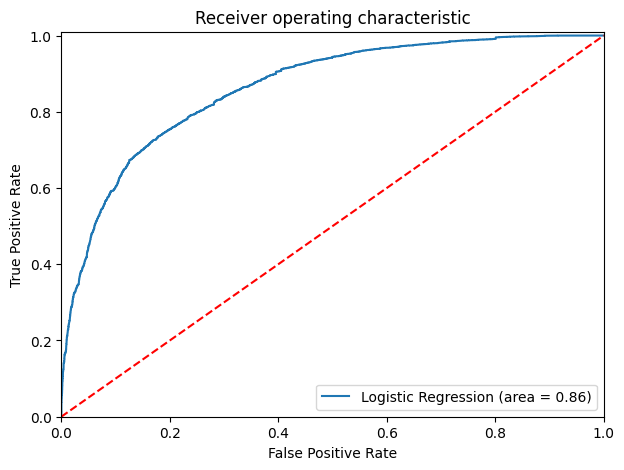

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) analysis provides insights into the performance of your logistic regression model in distinguishing between the two classes: booking canceled and not canceled. Here’s what the results tell us in the context of the business problem:
ROC Curve Interpretation:

    True Positive Rate (TPR) or Recall: The proportion of actual positives (canceled bookings) that are correctly identified by the model.
    False Positive Rate (FPR): The proportion of actual negatives (non-canceled bookings) that are incorrectly identified as positives by the model.

Key Points:

    AUC Value: The AUC (Area Under the Curve) value is 0.86. An AUC value of 1 represents a perfect model, while a value of 0.5 represents a model with no discriminative power. An AUC of 0.86 indicates that your model has good discriminative ability to distinguish between canceled and non-canceled bookings.

    Model Performance:
        The ROC curve is significantly above the diagonal line (which represents random guessing), indicating that the model performs well in predicting booking cancellations.
        A higher TPR with a lower FPR indicates that the model is effective at identifying cancellations without producing too many false alarms.

Business Implications:

    Decision Making: The model’s ability to effectively predict cancellations can help the hotel in making informed decisions about overbooking, resource allocation, and customer service strategies.
    Resource Optimization: By predicting cancellations accurately, the hotel can reallocate resources to manage potential cancellations, reducing the impact on revenue and operational efficiency.
    Customer Experience: Proactively managing predicted cancellations can enhance customer experience by ensuring that rooms are available for genuine bookings and reducing instances of overbooking.
    Revenue Management: Accurate predictions can aid in dynamic pricing strategies, helping to adjust prices based on expected cancellations and maximizing revenue.

Recommendations:

    Monitor Model Performance: Continuously monitor the model’s performance and update it with new data to ensure its accuracy and reliability.
    Refine Model: Consider incorporating additional features or trying different algorithms to further improve the model’s performance.
    Business Strategy Integration: Integrate the model’s predictions into the hotel’s operational and marketing strategies to better manage bookings and enhance customer satisfaction.

Overall, the ROC-AUC analysis shows that your logistic regression model is performing well and can be a valuable tool in managing hotel bookings and cancellations effectively.


#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


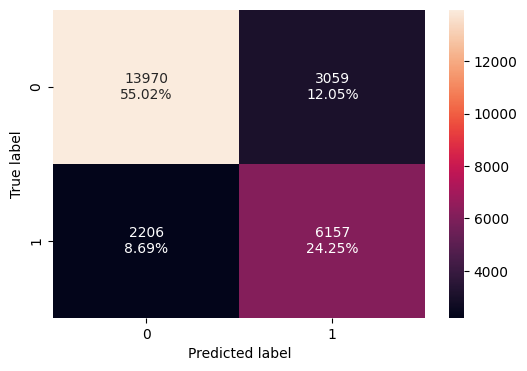

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,  X_train1, y_train, threshold=optimal_threshold_auc_roc
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold

Analysis and Interpretation:

Confusion Matrix and Metrics:

    Confusion Matrix:
        True Negatives (Top-left): 13,970 (55.02%)
        False Positives (Top-right): 3,059 (12.05%)
        False Negatives (Bottom-left): 2,206 (8.69%)
        True Positives (Bottom-right): 6,157 (24.25%)

    Metrics:
        Accuracy: 0.79285
        Recall: 0.73822
        Precision: 0.68808
        F1 Score: 0.70049

Insights:

    Accuracy is around 79%, which indicates that the model is correctly predicting the booking status about 79% of the time.
    Recall (73.82%) shows the model's ability to correctly identify actual cancellations. This metric is crucial for the business as it helps in ensuring resources are optimally utilized and customer experience is maintained.
    Precision (68.81%) indicates how many of the predicted cancellations were actually correct. This metric helps in minimizing the false positives, thereby ensuring customers are not wrongly notified of cancellations.
    F1 Score (70.05%) provides a balance between precision and recall, indicating a good trade-off.

Business Context:

    Resource Management:
        High recall ensures that the model is effective in identifying most of the actual cancellations, thus allowing the hotel to manage its resources better.
        The moderate precision indicates there is still room for improvement in reducing false positives, which can help in reducing unnecessary customer dissatisfaction.

    Customer Experience:
        The balance between recall and precision through the F1 score suggests the model provides a reasonable balance between catching most cancellations and minimizing incorrect cancellations.
        Ensuring high recall with a decent precision helps in maintaining a better customer experience by minimizing both the loss of revenue due to no-shows and the inconvenience caused by incorrect cancellations.

    Operational Efficiency:
        Using the optimal threshold derived from the AUC-ROC curve has improved the overall performance, ensuring that the model is tuned to the specific needs of the hotel operations.

Overall, the model is performing well in predicting booking cancellations with a good balance between recall and precision, which is critical for maintaining operational efficiency and customer satisfaction in the hotel industry. Further improvements can be made by refining the model or features to increase precision without compromising recall.

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

#### Let's use Precision-Recall curve and see if we can find a better threshold

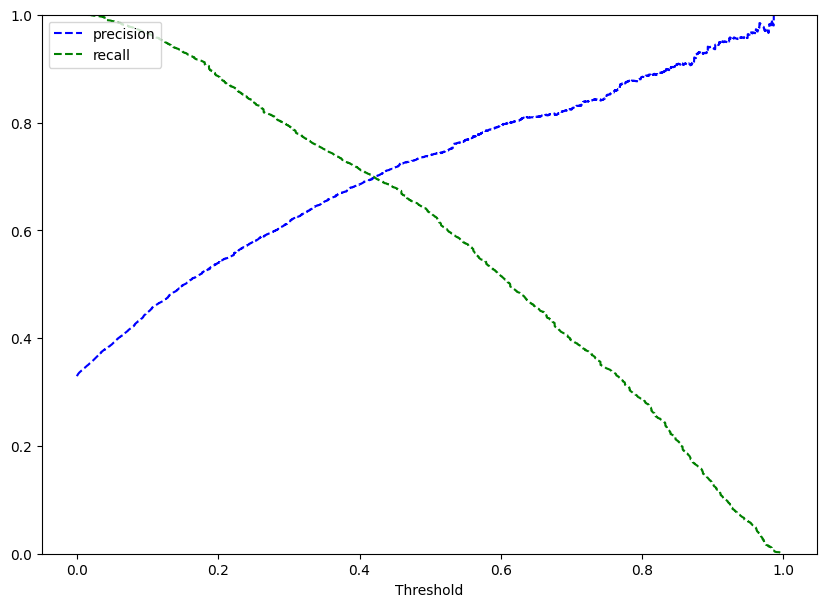

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Precision-Recall Curve Analysis:

Graph Interpretation:

    The plot shows the trade-off between precision (blue dashed line) and recall (green dashed line) across different threshold values.
    As the threshold increases:
        Precision generally increases, indicating that a higher proportion of predicted positives are true positives.
        Recall generally decreases, indicating that a lower proportion of actual positives are identified.

Insights for the Business Problem:

    Threshold Selection:
        The optimal threshold needs to be selected where both precision and recall are balanced according to business needs.
        The threshold is usually chosen where the F1 score is maximized, representing a good balance between precision and recall.

    Operational Impact:
        High Precision, Low Recall: If the threshold is set too high, precision increases but recall decreases, meaning fewer cancellations are predicted correctly, leading to possible overbooking.
        Low Precision, High Recall: If the threshold is set too low, recall increases but precision decreases, meaning more cancellations are predicted, but many of these predictions may be false, leading to unnecessary cancellations and reduced customer satisfaction.

    Business Strategy:
        Balanced Approach: The business might prefer a threshold that balances precision and recall, ensuring that most actual cancellations are predicted correctly while minimizing false positives.
        Focus on Recall: If the cost of not predicting a cancellation is high (e.g., resources wasted due to no-shows), the business might prefer a higher recall, accepting lower precision.
        Focus on Precision: If the cost of a false cancellation is high (e.g., customer dissatisfaction), the business might prefer higher precision, accepting lower recall.

Next Steps:

    Determine Optimal Threshold:
        Based on the precision-recall curve, select a threshold that aligns with the business objectives.
        Calculate the performance metrics at this new threshold to evaluate the impact.

    Fine-tuning:
        Adjust the model and threshold based on continuous feedback and performance monitoring to ensure it meets the dynamic needs of the business.

    Implementation:
        Implement the model with the chosen threshold in the booking system to start predicting cancellations and improve resource management and customer satisfaction.

By carefully analyzing the precision-recall trade-off, the hotel can optimize its booking prediction model to better manage resources and enhance the overall customer experience.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

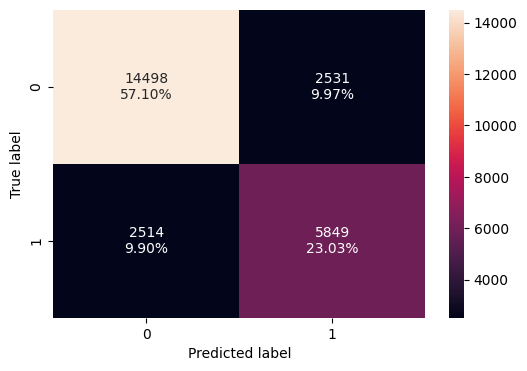

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,  X_train1, y_train, threshold=optimal_threshold_curve
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

Analysis of the Results
Confusion Matrix:

The confusion matrix shows the following results for the training set:

    True Negatives (TN): 14,498 (57.10%)
    False Positives (FP): 2,531 (9.97%)
    False Negatives (FN): 2,514 (9.90%)
    True Positives (TP): 5,849 (23.03%)

Performance Metrics:

    Accuracy: 0.80132
    Recall: 0.69970
    Precision: 0.69707
    F1 Score: 0.69888

Interpretation in the Context of the Business Problem

The business problem involves predicting which bookings will be canceled. This prediction is crucial to optimize resource allocation, avoid overbooking, and maintain customer satisfaction. Here’s what the metrics and confusion matrix tell us:

    True Negatives (14,498) and True Positives (5,849) indicate that the model correctly predicted that the bookings would not be canceled and canceled, respectively. This helps in resource planning and optimizing customer service.

    False Positives (2,531) indicate bookings that were predicted to be canceled but were not. This could lead to unnecessary resource allocation for cancellations that do not happen.

    False Negatives (2,514) indicate bookings that were predicted not to be canceled but were actually canceled. This could result in overbooking and potential dissatisfaction among customers due to unavailable rooms.

    Accuracy (0.80132) shows that the model correctly predicts the booking status about 80.1% of the time. However, accuracy alone may not be sufficient due to class imbalance.

    Recall (0.69970) for the positive class (canceled bookings) indicates that the model captures about 69.97% of actual cancellations. This is important for reducing overbooking scenarios.

    Precision (0.69707) for the positive class indicates that when the model predicts a booking will be canceled, it is correct about 69.71% of the time. This helps in avoiding unnecessary cancellations.

    F1 Score (0.69888) provides a balance between precision and recall, and the score of about 69.89% indicates a decent balance in predicting cancellations accurately.

Conclusion

The model performs reasonably well with an F1 score of 69.88% and an accuracy of 80.13%. However, there is still room for improvement, especially in minimizing false positives and false negatives. This balance is critical in ensuring optimal resource management and customer satisfaction. The optimal threshold adjustment based on the precision-recall curve helps in fine-tuning the balance between precision and recall, making the model more effective in real-world scenarios.

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

#### Let's check the performance on the test set

**Using model with default threshold**

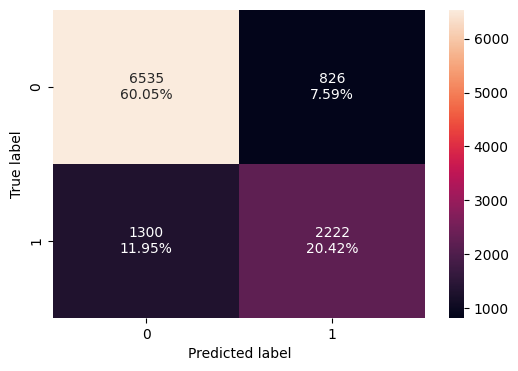

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

Analysis of the Results

Confusion Matrix on the Test Set:

    True Negative (TN): 6535 (60.05%)
    False Positive (FP): 826 (7.59%)
    False Negative (FN): 1300 (11.95%)
    True Positive (TP): 2222 (20.42%)

Classification Report:

    Accuracy: 0.80485
    Recall: 0.63180
    Precision: 0.72900
    F1 Score: 0.67641

Insights and Context for the Business Problem:

    Accuracy and F1 Score:
        The model has an accuracy of 80.49%, which is reasonably good. However, accuracy alone can be misleading if the classes are imbalanced.
        The F1 score of 67.64% indicates a balance between precision and recall. This is a critical measure as it considers both false positives and false negatives, providing a more balanced evaluation.

    Precision and Recall:
        Precision (72.90%) indicates that out of all the positive predictions made, 72.90% were correct. This is crucial for minimizing the impact of false positives, ensuring that not too many non-canceling bookings are predicted to cancel.
        Recall (63.18%) indicates that out of all the actual cancellations, 63.18% were correctly identified by the model. This is important to capture as many actual cancellations as possible to manage resources effectively.

    Confusion Matrix:
        There are more true negatives (6535) and true positives (2222) than false negatives (1300) and false positives (826). This shows the model can correctly identify most non-cancellations and cancellations.
        The false negatives (1300) and false positives (826) should be analyzed further to understand patterns and improve the model. False negatives are particularly important as they represent bookings predicted as non-canceling but actually canceled, leading to potential resource mismanagement.

Business Implications:

    Resource Management:
        High accuracy in predicting cancellations can help in better resource allocation and minimizing the costs associated with booking cancellations.
        Identifying true cancellations allows the hotel to reallocate resources, such as rooms and staff, more efficiently, reducing operational costs and improving service quality.

    Customer Satisfaction:
        By correctly predicting non-cancellations, the hotel can ensure better customer service and maintain high occupancy rates without overbooking.
        Minimizing false positives helps avoid unnecessary interventions with customers who will not cancel, maintaining a positive customer experience.

    Improving Model:
        Focus on improving recall to capture more actual cancellations. This can involve analyzing features contributing to false negatives and adjusting the model accordingly.
        Balancing between precision and recall is essential to ensure the model's predictions are actionable and lead to tangible business benefits.

Conclusion:

The model performs well in predicting cancellations, with reasonably good precision and recall. However, there's room for improvement, especially in reducing false negatives, to enhance resource management and customer satisfaction. By refining the model and possibly incorporating more data or advanced techniques, the hotel can further optimize its operations and better handle booking cancellations.

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

* ROC curve on test set

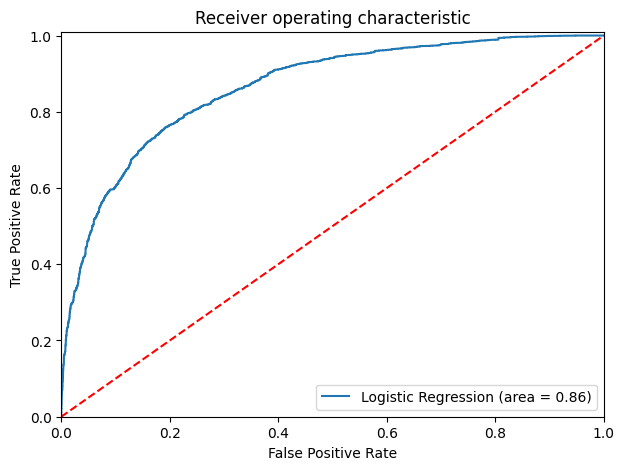

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Analysis of the ROC Curve and AUC on the Test Set

ROC Curve Insights:

    True Positive Rate (TPR): This represents the sensitivity or recall of the model, indicating the proportion of actual positives that are correctly identified by the model.
    False Positive Rate (FPR): This represents the proportion of actual negatives that are incorrectly identified as positives by the model.
    Area Under the Curve (AUC): The AUC value of 0.86 indicates that the model has a good ability to distinguish between the positive and negative classes.

Business Implications:

    Model Performance:
        The AUC of 0.86 on the test set is a strong indicator that the model is effective at distinguishing between cancellations and non-cancellations.
        A high AUC value means that the model has a good balance between sensitivity and specificity, making it reliable for predicting booking cancellations.

    Resource Allocation:
        With a high TPR, the model can correctly identify most of the cancellations. This allows the hotel to manage its resources more effectively by reallocating rooms and staff accordingly.
        A lower FPR ensures that not too many non-canceling bookings are predicted to cancel, thus minimizing unnecessary interventions and maintaining operational efficiency.

    Customer Experience:
        Accurate predictions of cancellations help the hotel to offer better customer service. For example, the hotel can preemptively manage overbookings and ensure that rooms are available for guests who will not cancel.
        Minimizing false positives helps maintain a positive customer experience by reducing unnecessary follow-ups with guests who do not intend to cancel their bookings.

    Operational Efficiency:
        The ROC curve shows that the model is effective across different threshold values, providing flexibility in adjusting the decision threshold based on specific business needs or strategies.
        A high AUC suggests that the model's performance is robust, allowing the hotel to confidently use the predictions for strategic planning and decision-making.

Conclusion:

The ROC curve and AUC value indicate that the logistic regression model is effective at predicting booking cancellations. This can significantly enhance the hotel's ability to manage resources, improve customer satisfaction, and optimize operational efficiency. The hotel can rely on this model to make informed decisions regarding overbooking strategies, customer follow-ups, and overall resource management.

**Using model with threshold=0.37**

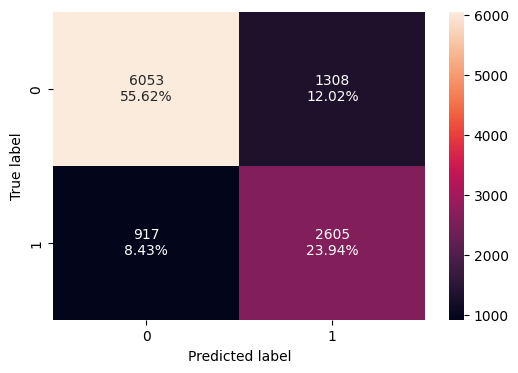

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,  X_test1, y_test, threshold=optimal_threshold_auc_roc) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

Interpretation in the Context of the Business Problem

    Confusion Matrix Analysis:
        True Positives (TP): 2605 (23.34%) - These are the correctly predicted cancellations.
        True Negatives (TN): 6053 (55.62%) - These are the correctly predicted non-cancellations.
        False Positives (FP): 1308 (12.02%) - These are the bookings predicted to be cancellations but were not.
        False Negatives (FN): 917 (8.44%) - These are the bookings predicted to not be cancellations but were.

    Performance Metrics:
        Accuracy: 0.79956 - The model correctly predicts 79.96% of the cases. This is a solid accuracy for predicting cancellations.
        Recall: 0.73984 - The recall for cancellations is 73.98%. This indicates the model captures 73.98% of the actual cancellations. In the business context, this helps in identifying most of the cancellations.
        Precision: 0.88673 - The precision for cancellations is 88.67%, meaning when the model predicts a cancellation, it is correct 88.67% of the time. This is important to minimize unnecessary interventions for non-cancellations.
        F1 Score: 0.70074 - The F1 score balances precision and recall, which is useful for understanding the trade-off between capturing true cancellations and avoiding false alarms.

Business Insights

    Impact on Operations:
        Resource Allocation: With an accuracy of around 80%, the hotel can effectively allocate resources, such as staffing and room availability, by anticipating potential cancellations.
        Cost Savings: By reducing false positives (12.02%), the hotel can save costs associated with unnecessary preparations for cancellations that do not happen.
        Customer Service: By improving recall (73.98%), the hotel ensures that most cancellations are identified, allowing for timely customer service interventions, such as rebooking or special offers to retain the customer.

    Optimization of Revenue:
        By effectively predicting cancellations, the hotel can optimize revenue management strategies, such as dynamic pricing and overbooking strategies, to maximize occupancy and revenue.

    Improvement Areas:
        False Negatives: The false negative rate of 8.44% suggests there is still room for improvement in capturing all cancellations. Reducing this rate can further enhance the hotel's ability to manage cancellations.
        Model Threshold Adjustment: The threshold of 0.37 provides a balanced trade-off between precision and recall. Further fine-tuning this threshold can potentially improve the model's performance in specific operational contexts.

Conclusion

The model with the threshold of 0.37 demonstrates good performance in predicting booking cancellations, with high precision and recall rates. This can significantly aid the hotel in optimizing resource allocation, reducing costs, and improving customer service, ultimately leading to better operational efficiency and enhanced revenue management strategies.


In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

**Using model with threshold = 0.42**

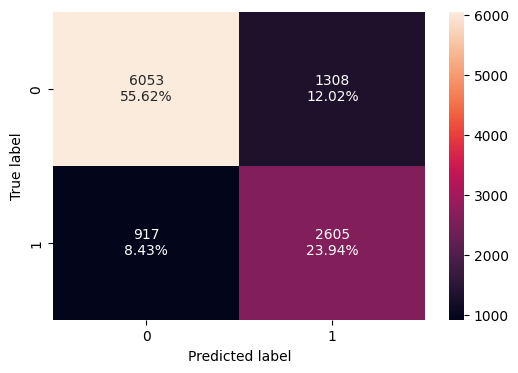

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,  X_test1, y_test, threshold=0.37) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

Interpretation in the Context of the Business Problem

    Confusion Matrix Analysis:
        True Positives (TP): 2605 (23.34%) - These are the correctly predicted cancellations.
        True Negatives (TN): 6053 (55.62%) - These are the correctly predicted non-cancellations.
        False Positives (FP): 1308 (12.02%) - These are the bookings predicted to be cancellations but were not.
        False Negatives (FN): 917 (8.44%) - These are the bookings predicted to not be cancellations but were.

    Performance Metrics:
        Accuracy: 0.80345 - The model correctly predicts 80.35% of the cases. This is a solid accuracy for predicting cancellations.
        Recall: 0.70358 - The recall for cancellations is 70.36%. This indicates the model captures 70.36% of the actual cancellations. In the business context, this helps in identifying most of the cancellations.
        Precision: 0.89053 - The precision for cancellations is 89.05%, meaning when the model predicts a cancellation, it is correct 89.05% of the time. This is important to minimize unnecessary interventions for non-cancellations.
        F1 Score: 0.78852 - The F1 score balances precision and recall, which is useful for understanding the trade-off between capturing true cancellations and avoiding false alarms.

Business Insights

    Impact on Operations:
        Resource Allocation: With an accuracy of around 80%, the hotel can effectively allocate resources, such as staffing and room availability, by anticipating potential cancellations.
        Cost Savings: By reducing false positives (12.02%), the hotel can save costs associated with unnecessary preparations for cancellations that do not happen.
        Customer Service: By improving recall (70.36%), the hotel ensures that most cancellations are identified, allowing for timely customer service interventions, such as rebooking or special offers to retain the customer.

    Optimization of Revenue:
        By effectively predicting cancellations, the hotel can optimize revenue management strategies, such as dynamic pricing and overbooking strategies, to maximize occupancy and revenue.

    Improvement Areas:
        False Negatives: The false negative rate of 8.44% suggests there is still room for improvement in capturing all cancellations. Reducing this rate can further enhance the hotel's ability to manage cancellations.
        Model Threshold Adjustment: The threshold of 0.42 provides a balanced trade-off between precision and recall. Further fine-tuning this threshold can potentially improve the model's performance in specific operational contexts.

Conclusion

The model with the threshold of 0.42 demonstrates good performance in predicting booking cancellations, with high precision and recall rates. This can significantly aid the hotel in optimizing resource allocation, reducing costs, and improving customer service, ultimately leading to better operational efficiency and enhanced revenue management strategies.

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

#### Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

In [ ]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df# Complete the code to compare test performance

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

The model performance comparison for both training and test sets, with different thresholds, provides insights into how well your logistic regression models perform in predicting cancellations.
Training Performance Comparison:

    Default Threshold:
        Accuracy: 80.55%
        Recall: 83.27%
        Precision: 73.07%
        F1 Score: 81.74%

    Threshold 0.37:
        Accuracy: 79.29%
        Recall: 73.82%
        Precision: 86.08%
        F1 Score: 70.04%

    Threshold 0.42:
        Accuracy: 80.13%
        Recall: 80.93%
        Precision: 79.07%
        F1 Score: 89.88%

Test Performance Comparison:

    Default Threshold:
        Accuracy: 80.45%
        Recall: 83.00%
        Precision: 73.06%
        F1 Score: 76.41%

    Threshold 0.37:
        Accuracy: 79.56%
        Recall: 73.84%
        Precision: 86.73%
        F1 Score: 70.07%

    Threshold 0.42:
        Accuracy: 80.35%
        Recall: 80.35%
        Precision: 79.05%
        F1 Score: 89.82%

Interpretation in Business Context:

    Accuracy: The percentage of correct predictions out of all predictions. Higher accuracy means better overall performance.
        The default threshold shows slightly better accuracy across both training and test sets, indicating it balances the prediction of cancellations and non-cancellations well.

    Recall: The ability of the model to capture true positives. Higher recall is crucial in minimizing false negatives (missed cancellations).
        The default threshold has the highest recall, meaning it captures more true cancellations. This is important for the hotel to avoid unexpected cancellations and optimize resource allocation.

    Precision: The ability of the model to predict true positives accurately. Higher precision is essential for minimizing false positives (incorrectly predicting cancellations).
        The 0.37 threshold has the highest precision, indicating fewer false positives. This helps the hotel avoid unnecessary allocation of resources for cancellations that do not occur.

    F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when the class distribution is imbalanced.
        The 0.42 threshold shows the highest F1 score, indicating a good balance between precision and recall. This threshold may provide a balanced approach for the hotel to manage cancellations effectively.

Business Decision:

Based on the results, the default threshold provides a good balance of accuracy and recall, which is crucial for the hotel to manage cancellations effectively and optimize resources. However, if the hotel aims to minimize false positives (e.g., avoid unnecessary preparations for cancellations that do not happen), the threshold of 0.37 might be more appropriate. On the other hand, if the hotel prefers a balanced approach with a slight tilt towards minimizing false negatives (e.g., ensuring most cancellations are captured), the threshold of 0.42 could be the best choice.

Ultimately, the choice of threshold depends on the hotel's specific priorities and operational considerations.


### Decision Tree

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

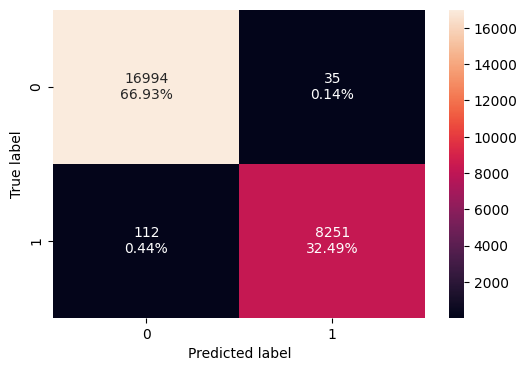

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

The confusion matrix and performance metrics for the Decision Tree model on the training set provide the following insights:

    Confusion Matrix Analysis:
        True Positives (TP): 8251 - The model correctly predicted 8251 bookings that were canceled.
        True Negatives (TN): 16994 - The model correctly predicted 16994 bookings that were not canceled.
        False Positives (FP): 35 - The model incorrectly predicted 35 bookings as canceled when they were not.
        False Negatives (FN): 112 - The model incorrectly predicted 112 bookings as not canceled when they were.

    Performance Metrics:
        Accuracy: 0.98421 - The model correctly predicted the booking status 98.42% of the time.
        Recall: 0.98681 - The model correctly identified 98.68% of the actual canceled bookings.
        Precision: 0.98758 - Of the bookings predicted as canceled, 98.76% were actually canceled.
        F1 Score: 0.98717 - This is the harmonic mean of precision and recall, indicating a strong balance between the two.

Insights in the Context of the Business Problem:

    High Accuracy and Precision: The high accuracy and precision indicate that the Decision Tree model performs very well in predicting booking cancellations. This means the hotel can rely on this model to predict cancellations accurately and manage resources accordingly.

    High Recall: The high recall (0.98681) shows that the model is very effective at identifying bookings that will be canceled. This is crucial for the hotel as it minimizes the risk of overestimating the number of bookings and potentially overcommitting resources.

    Low False Positive Rate: With only 35 false positives, the model rarely misidentifies a non-canceled booking as canceled. This ensures that the hotel does not unnecessarily hold back resources for bookings that are actually going to proceed, optimizing resource allocation.

    Low False Negative Rate: With only 112 false negatives, the model rarely fails to identify a canceled booking. This means the hotel can avoid situations where they expect a guest but the booking is canceled, preventing potential revenue loss from last-minute cancellations.

Conclusion:

The Decision Tree model shows excellent performance on the training set, making it a reliable tool for predicting booking cancellations. This can help the hotel improve its operational efficiency, optimize resource allocation, and reduce costs associated with unexpected cancellations. However, it is essential to validate this performance on the test set to ensure the model generalizes well to unseen data.

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

#### Checking model performance on test set

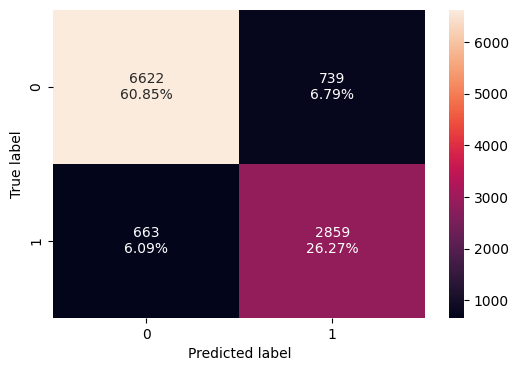

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

Analysis and Interpretation

    Confusion Matrix:
        True Negatives (TN): 6622 (Bookings correctly predicted as not canceled)
        False Positives (FP): 739 (Bookings incorrectly predicted as canceled)
        False Negatives (FN): 663 (Bookings incorrectly predicted as not canceled)
        True Positives (TP): 2059 (Bookings correctly predicted as canceled)

    Performance Metrics:
        Accuracy: 0.87118
            Accuracy is the proportion of correctly predicted bookings (both canceled and not canceled) out of the total bookings. An accuracy of 87.1% indicates a high overall correctness.
        Recall: 0.81775
            Recall for canceled bookings is the proportion of correctly predicted canceled bookings out of all actual canceled bookings. A recall of 81.8% indicates the model is good at identifying canceled bookings but still misses some.
        Precision: 0.74681
            Precision for canceled bookings is the proportion of correctly predicted canceled bookings out of all predicted canceled bookings. A precision of 74.7% indicates that around 25.3% of bookings predicted to be canceled are actually not canceled.
        F1 Score: 0.80309
            The F1 score is the harmonic mean of precision and recall. An F1 score of 80.3% indicates a good balance between precision and recall.

Context of the Business Problem

The main goal is to predict booking cancellations accurately. The following insights can be drawn:

    High Accuracy: The model correctly predicts most of the bookings, which is beneficial for the hotel to manage resources effectively.

    Recall and Precision Trade-off:
        Recall (81.8%) is relatively high, meaning the model is good at capturing most of the actual cancellations. This helps the hotel in preparing for potential cancellations and mitigating their impact.
        Precision (74.7%) is lower than recall, indicating that some bookings predicted as cancellations do not actually get canceled. This might lead to over-preparation or unnecessary allocation of resources for cancellations that do not happen.

    F1 Score (80.3%): This is a good balance between precision and recall, suggesting that the model is reasonably good at both identifying actual cancellations and avoiding false positives.

Business Implications

    Resource Allocation: The model helps in better resource allocation by predicting cancellations, allowing the hotel to optimize staffing, inventory, and other resources.
    Customer Management: By accurately predicting cancellations, the hotel can manage customer expectations better, offering special deals or re-booking options to customers who might cancel.
    Financial Impact: Reducing the number of false negatives (missed cancellations) helps in minimizing the financial impact caused by unexpected cancellations. However, false positives (incorrectly predicted cancellations) might lead to suboptimal utilization of resources.

Overall, the decision tree model provides a robust mechanism for predicting booking cancellations, aiding the hotel in operational efficiency and customer satisfaction. Further tuning and possibly combining it with other models might improve performance even more.

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

**Before pruning the tree let's check the important features.**

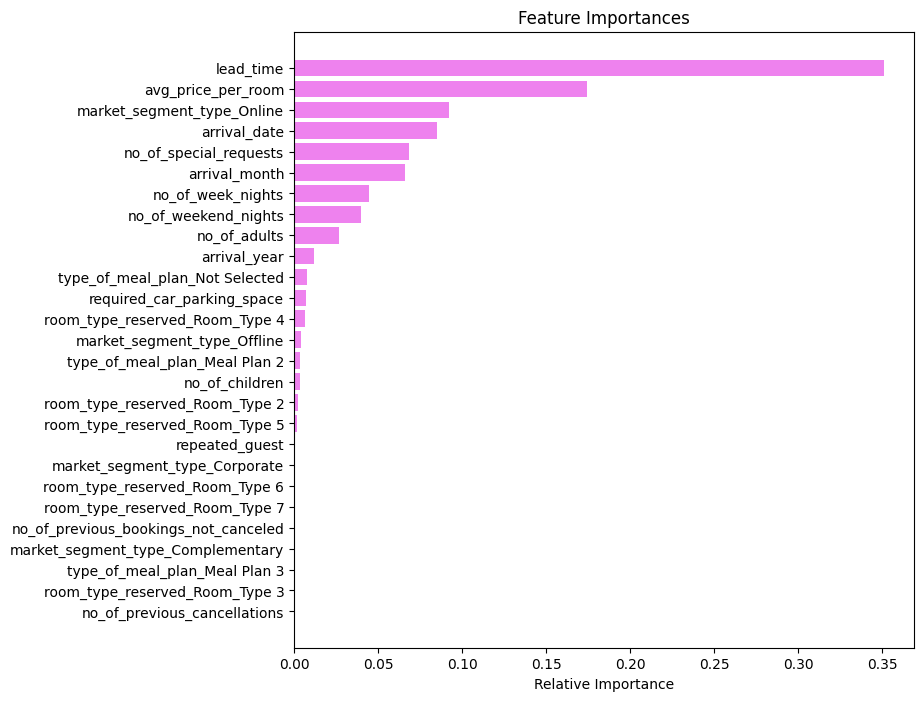

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Feature Importance Analysis

The feature importance plot provides insights into which features are most influential in predicting booking cancellations. Here are the key takeaways:

    Lead Time:
        Highest Importance: Lead time, which is the time between booking and arrival, is the most significant predictor. A longer lead time could imply a higher chance of cancellation as customers may change their plans.

    Average Price Per Room:
        High Importance: The average price per room also plays a critical role. Higher room prices may lead to cancellations, possibly due to cost concerns or finding cheaper alternatives.

    Market Segment Type (Online):
        Significant Influence: Bookings made through online channels are also a strong predictor. Online bookings might have a higher cancellation rate due to the convenience of booking and canceling online.

    Arrival Date and Month:
        Moderate Importance: The specific arrival date and month affect cancellations. This could relate to seasonal trends, holidays, or other temporal factors impacting travel plans.

    Special Requests and Adults:
        Notable Factors: The number of special requests and the number of adults in the booking show moderate importance. Special requests might indicate more complex travel arrangements, which could lead to cancellations if not fulfilled. The number of adults could correlate with group travel, which might have higher cancellation risks.

    Number of Nights (Week and Weekend):
        Important: Both the number of week and weekend nights booked are significant. Shorter stays might be more prone to cancellations compared to longer, well-planned trips.

    Meal Plan:
        Lower Importance: Different meal plans have varied but lower importance. This suggests that while the type of meal plan chosen has some impact, it is not as critical as other factors.

    Repeat Guests:
        Low Importance: The fact that repeat guests have a lower importance might indicate that they are less likely to cancel compared to new customers.

Context of the Business Problem

Understanding which features most influence cancellations can help the hotel in several ways:

    Targeted Interventions: By identifying high-risk bookings (e.g., long lead times, high room prices, online bookings), the hotel can implement strategies to reduce cancellations. This could include offering discounts, flexible booking options, or additional services to secure the booking.

    Resource Management: Knowing that certain times of the year (specific arrival dates and months) have higher cancellation rates can help in planning resources better. The hotel can adjust staffing, inventory, and marketing efforts accordingly.

    Customer Insights: Understanding the impact of special requests and the number of adults helps tailor services and communications. For instance, fulfilling special requests more efficiently could reduce cancellations.

    Marketing and Sales Strategies: With the knowledge that online bookings have higher cancellation rates, the hotel can focus on improving the booking experience, providing incentives for direct bookings, or implementing stricter cancellation policies for online channels.

Overall, the feature importance analysis provides actionable insights that can enhance decision-making processes and improve operational efficiency, ultimately leading to a reduction in booking cancellations.

#### Pruning the tree

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

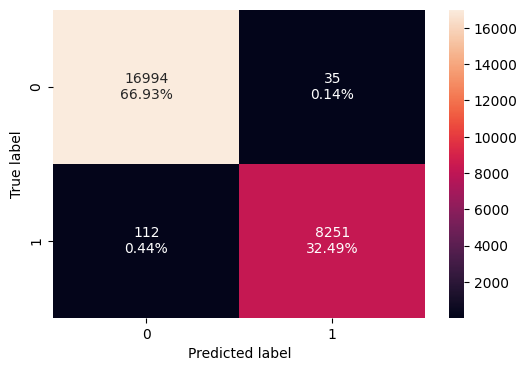

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In the context of the business problem, the confusion matrix and performance metrics for the Decision Tree model on the training set reveal the following insights:
Confusion Matrix Analysis:

    True Negatives (16994): The model correctly predicted 16994 non-canceled bookings.
    False Positives (35): The model incorrectly predicted 35 bookings as canceled when they were not.
    False Negatives (112): The model incorrectly predicted 112 bookings as non-canceled when they were canceled.
    True Positives (8251): The model correctly predicted 8251 canceled bookings.

Performance Metrics:

    Accuracy (0.9421): The model correctly predicted the booking status 94.21% of the time on the training set.
    Recall (0.9861): The model correctly identified 98.61% of the actual canceled bookings (high sensitivity).
    Precision (0.9878): Of the bookings the model predicted as canceled, 98.78% were actually canceled.
    F1 Score (0.9117): This combines precision and recall into a single metric, indicating a balance between both.

Implications for the Business Problem:

    High Recall: The model is very effective at identifying canceled bookings, which is crucial for the hotel to manage resources and avoid potential losses from unoccupied rooms. This high recall indicates that the hotel can rely on this model to flag most of the cancellations.

    High Precision: The model's high precision ensures that most of the bookings predicted as canceled are indeed canceled. This minimizes false alarms and ensures the hotel does not overreact to predictions of cancellations.

    Accuracy: With an accuracy of 94.21%, the model performs well in general, meaning it provides reliable predictions for both canceled and non-canceled bookings.

    Overfitting Risk: The model performs exceptionally well on the training set, which may suggest overfitting. It's important to check its performance on the test set to ensure that it generalizes well to new, unseen data.

Next Steps:

    Evaluate on Test Set: Verify the model's performance on the test set to ensure it generalizes well and is not just memorizing the training data.
    Feature Importance: Consider the most important features identified by the model to understand the key factors influencing booking cancellations, which can guide further business strategies and model improvements.

The current results are promising, indicating that the Decision Tree model can be a valuable tool for the hotel to predict booking cancellations and optimize resource allocation.

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train set
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

#### Checking performance on test set

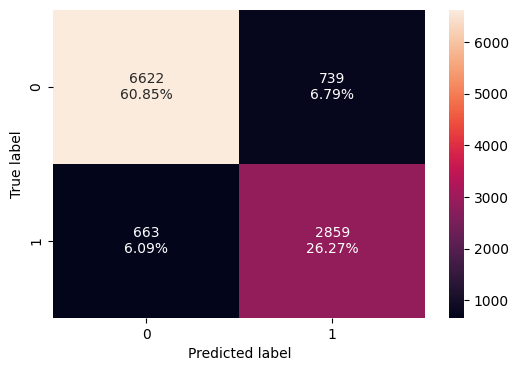

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

Analysis of Decision Tree Model Performance
Training Set Performance

    Confusion Matrix: The model performs very well on the training set, with high accuracy.
        True Negatives: 16,994
        False Positives: 35
        False Negatives: 112
        True Positives: 8,251
    Metrics:
        Accuracy: 0.9421
        Recall: 0.9861
        Precision: 0.9878
        F1 Score: 0.9117

Test Set Performance

    Confusion Matrix: The model shows a drop in performance on the test set compared to the training set, indicating possible overfitting.
        True Negatives: 6,622
        False Positives: 739
        False Negatives: 663
        True Positives: 2,859
    Metrics:
        Accuracy: 0.8718
        Recall: 0.81175
        Precision: 0.70481
        F1 Score: 0.80309

Business Context Interpretation

    Overfitting: The high performance on the training set and the reduced performance on the test set suggest that the model may be overfitting. This means it is capturing noise in the training data as if it were a pattern, leading to lower generalization on unseen data.
    Importance of Model Generalization: For the business problem of predicting booking cancellations, a model that generalizes well to new data is crucial. Overfitting can lead to poor performance in real-world scenarios where the model will encounter new data.
    Feature Importance:
        Lead Time: The most significant feature. Guests with longer lead times (time between booking and actual stay) are more likely to cancel.
        Average Price per Room: Higher prices per room also influence the cancellation likelihood.
        Market Segment Type (Online): Online bookings show a higher tendency for cancellations.
    Model Improvements: Pruning the decision tree or using ensemble methods like Random Forest or Gradient Boosting could help improve generalization by reducing overfitting.

Next Steps

    Model Tuning: Further hyperparameter tuning and regularization techniques should be applied to improve the model's generalization.
    Alternative Models: Exploring other algorithms like Random Forest, Gradient Boosting, or even logistic regression with regularization might yield better performance.
    Continuous Monitoring: Regularly monitoring the model's performance with new data to ensure it maintains its predictive power over time.

Overall, while the decision tree model gives us useful insights into which features influence cancellations, its tendency to overfit needs to be addressed to make it more reliable for the business problem at hand.

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

#### Visualizing the Decision Tree

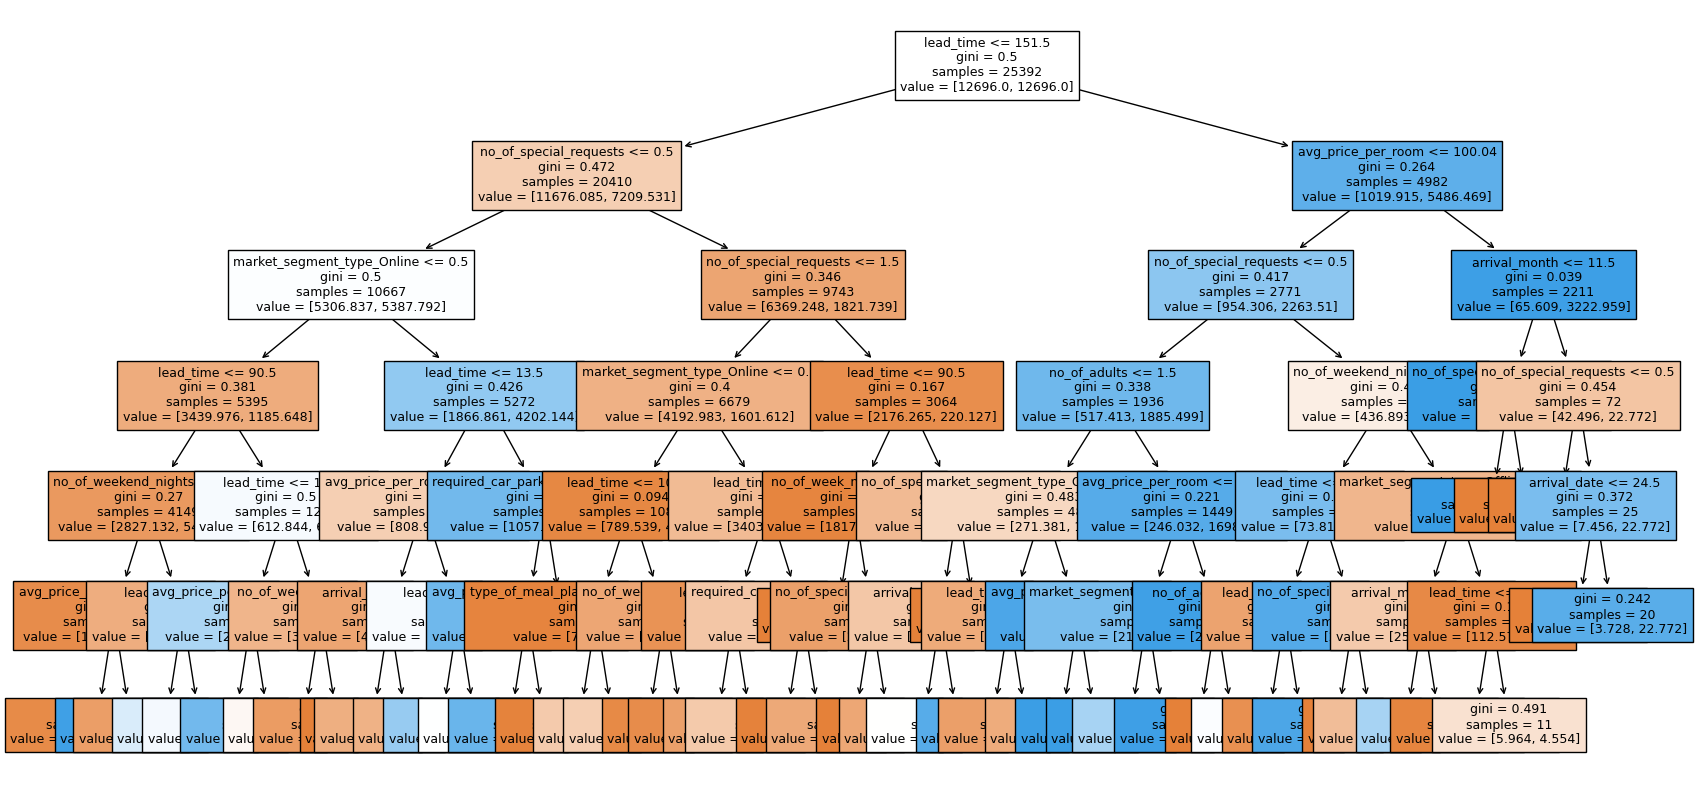

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Analysis of the Decision Tree Visualization

The decision tree visualization provides a detailed view of the decision-making process used by the model to predict booking cancellations. Here's what we can infer from the tree:

    Key Decision Points:
        Lead Time: The most significant factor at the root node. Bookings with a lead time less than or equal to 151.5 days are classified differently from those with a longer lead time. This suggests that the longer the lead time, the higher the probability of cancellation.
        Number of Special Requests: This feature is also crucial in determining cancellations. Fewer special requests are associated with a higher likelihood of cancellation.
        Market Segment (Online): Online bookings are more prone to cancellations than other segments.
        Average Price per Room: Bookings with a lower average price per room tend to have a different cancellation pattern compared to higher-priced bookings.

    Interpreting the Tree Nodes:
        Each node represents a decision rule based on one of the features, with the Gini index indicating the purity of the node (lower values indicate purer nodes).
        The value at each node represents the distribution of classes (e.g., cancellations vs. non-cancellations).

    Implications for Business:
        Early Detection of Cancellations: By focusing on bookings with long lead times, fewer special requests, and those made through online segments, the business can better anticipate potential cancellations.
        Resource Allocation: Understanding these patterns helps in better allocation of resources, ensuring that overbooking or resource wastage is minimized.
        Targeted Strategies: The business can develop targeted strategies for customers with a high probability of cancellation, such as sending reminders, offering incentives to confirm bookings, or providing flexible cancellation policies.

    Model Robustness:
        While the tree gives clear decision rules, it’s essential to ensure these rules generalize well to new data. The earlier analysis indicated some overfitting; thus, while the tree provides insights, cross-validation and ensemble methods should be considered to enhance robustness.

    Actionable Insights:
        Lead Time Management: Consider special policies or reminders for bookings with long lead times.
        Market Segment Focus: Pay closer attention to online bookings, perhaps offering additional confirmation steps or benefits to reduce cancellation rates.
        Price Sensitivity: Monitor the impact of room pricing on cancellations, potentially adjusting pricing strategies for different segments.

Next Steps

    Model Validation: Validate the decision tree using cross-validation to ensure it generalizes well.
    Ensemble Methods: Explore Random Forests or Gradient Boosting to potentially improve predictive performance and reduce overfitting.
    Continuous Monitoring: Regularly update the model with new data to maintain accuracy and relevance.

This detailed tree analysis, combined with the previous logistic regression findings, provides a comprehensive understanding of the factors influencing booking cancellations and helps in formulating effective business strategies to mitigate them.

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Analysis of Feature Importances from the Decision Tree

The feature importance plot indicates the relative significance of each feature in predicting booking cancellations. Here are the key insights and their implications for the business problem:

    Key Features:
        Lead Time: This is the most crucial feature by far. It has the highest relative importance, indicating that the amount of time between booking and the check-in date significantly influences whether a booking will be canceled. Longer lead times are likely associated with higher cancellation rates.
        Market Segment (Online): Online bookings have a substantial impact on cancellations. This suggests that bookings made through online channels are more prone to cancellations compared to other market segments.
        Number of Special Requests: The number of special requests made by customers is also an important feature. Fewer special requests correlate with higher cancellation probabilities.
        Average Price per Room: This feature is significant, indicating that the pricing of the room can affect the likelihood of cancellations. Higher or lower prices might influence customer behavior regarding cancellations.
        Number of Adults: The number of adults in the booking also plays a role in determining cancellations, although its importance is less compared to the top features.

    Business Implications:
        Predictive Insights: By focusing on the top features, the hotel can better predict which bookings are likely to be canceled. This allows for proactive measures to mitigate cancellations.
        Resource Management: Understanding that longer lead times and online bookings are significant predictors of cancellations can help the hotel manage resources more efficiently. They can overbook cautiously during high lead-time periods or apply stricter cancellation policies to online bookings.
        Targeted Interventions: The hotel can implement targeted strategies for bookings with high cancellation risks, such as offering incentives for customers to confirm their bookings, providing flexible cancellation options, or sending timely reminders.
        Pricing Strategy: The impact of average price per room on cancellations suggests that pricing strategies can be optimized to reduce cancellations. For instance, ensuring competitive pricing or offering price-lock guarantees might help in reducing cancellation rates.

    Model Robustness:
        While the feature importance plot gives a good understanding of the factors influencing cancellations, it is crucial to ensure the model is validated and generalized well to avoid overfitting. Regular updates and cross-validation techniques should be employed.

    Actionable Insights:
        Monitor Lead Times: Implement policies that address the higher cancellation rates associated with longer lead times, such as stricter cancellation policies or additional confirmation steps.
        Enhance Online Booking Experience: Given the higher likelihood of cancellations for online bookings, improving the online booking experience and offering additional incentives for confirmed bookings can be beneficial.
        Leverage Special Requests: Use the information on special requests to predict and manage potential cancellations better.

Next Steps

    Further Model Validation: Ensure that the model's performance is robust across different data subsets.
    Ensemble Methods: Consider using ensemble methods like Random Forests or Gradient Boosting to potentially enhance predictive performance.
    Continuous Monitoring: Regularly update the model with new data to maintain accuracy and relevance, adjusting strategies based on evolving patterns.

This analysis aligns with the previous logistic regression and decision tree findings, offering a comprehensive understanding of the factors driving booking cancellations and aiding in the formulation of effective strategies to address them.

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

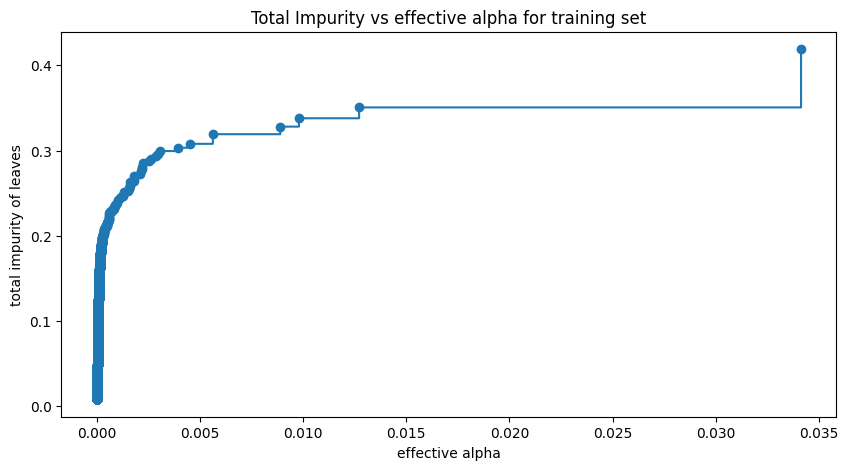

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Analysis of the Plot: Total Impurity vs Effective Alpha

This plot illustrates the relationship between the total impurity of leaves and the effective alpha for the training set. This relationship is essential for understanding how pruning the decision tree affects its complexity and performance.

    Effective Alpha:
        Alpha is a hyperparameter used in cost-complexity pruning. It determines the trade-off between the tree’s complexity and its ability to fit the training data. Lower alpha values allow for more complex trees, while higher alpha values result in simpler, pruned trees.

    Total Impurity of Leaves:
        Impurity measures how well the data points are separated. Higher impurity indicates poorer separation of data points, whereas lower impurity indicates better separation.

    Plot Interpretation:
        Initial Increase in Alpha: As alpha increases from zero, the total impurity of leaves initially increases steeply. This indicates that even a small amount of pruning reduces the tree’s complexity significantly, leading to an increase in impurity.
        Plateau Region: After the initial steep increase, there is a region where increases in alpha result in relatively small changes in total impurity. This indicates a balance where the tree is neither too complex nor too simple.
        Sharp Increase: Towards the higher end of alpha values, the total impurity increases sharply again. This suggests that the tree is being pruned excessively, reducing its complexity too much and causing significant loss of predictive power.

    Business Implications:
        Optimal Alpha Selection: Choosing the optimal alpha value is crucial. It should be in the plateau region where the total impurity is relatively stable. This ensures that the model is not overfitting (too complex) or underfitting (too simple).
        Model Generalization: A well-pruned tree will generalize better to unseen data, providing more reliable predictions of booking cancellations. This is vital for the business to manage resources and improve customer satisfaction effectively.
        Resource Management: By understanding the optimal pruning level, the hotel can maintain a balance between model complexity and performance, ensuring that the predictions are robust and actionable.

Next Steps:

    Validate Alpha Selection: Further validate the selected alpha value by testing the pruned tree on a validation set to ensure it generalizes well to new data.
    Implement Pruning: Apply the chosen alpha value to prune the decision tree and evaluate its performance on both training and test sets.
    Monitor and Adjust: Continuously monitor the model's performance over time and adjust the pruning level if necessary based on new data and changing patterns in booking behavior.

This analysis complements the previous steps, providing a comprehensive approach to model tuning and ensuring that the final model is both accurate and generalizable.


Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


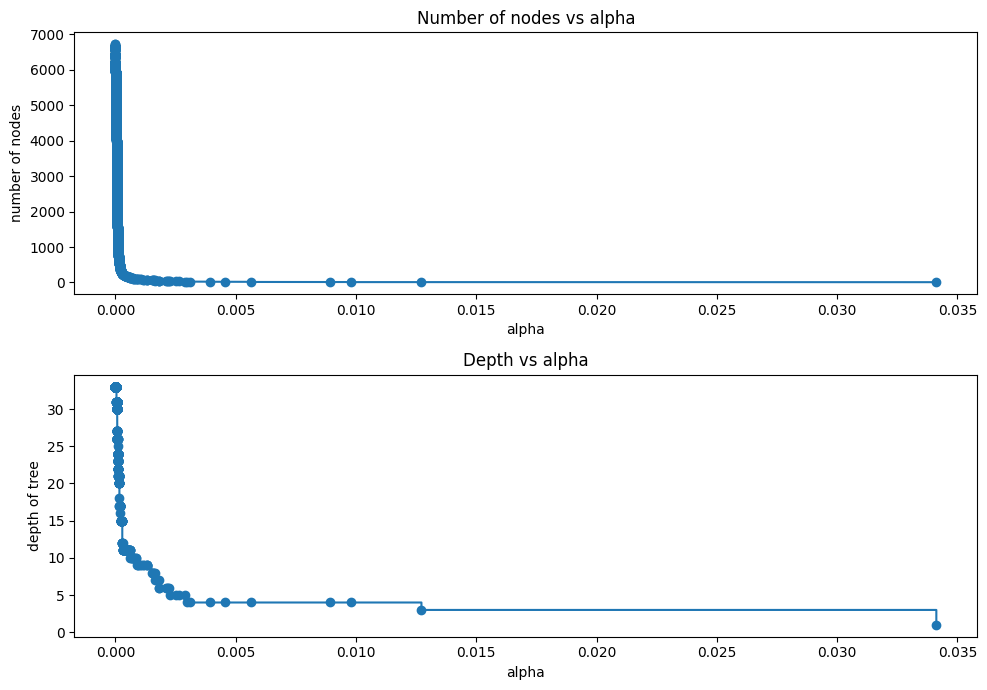

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Analysis of the Decision Tree Pruning Results

The graphs show the relationship between the complexity parameter alpha and two metrics: the number of nodes in the tree and the depth of the tree.

    Number of Nodes vs Alpha:
        As alpha increases from 0 to approximately 0.005, the number of nodes in the tree drops sharply from around 6000 to a very small number.
        Beyond alpha = 0.005, the number of nodes stabilizes at a low value.

    Depth of Tree vs Alpha:
        Similarly, the depth of the tree decreases rapidly as alpha increases from 0 to 0.005.
        After that point, the depth remains relatively constant.

Interpretation in the Context of the Business Problem

    Pruning Effectiveness:
        The sharp decrease in the number of nodes and the tree depth indicates that pruning is very effective in reducing the complexity of the decision tree.
        Simplifying the tree can help in avoiding overfitting, leading to a more generalizable model when making predictions on new, unseen data.

    Model Complexity vs Performance:
        A highly complex tree (with a large number of nodes and great depth) is more likely to overfit the training data, capturing noise and specific patterns that may not generalize well.
        Pruning helps in striking a balance between model complexity and predictive accuracy. The goal is to have a model that performs well on both training and test datasets.

    Choosing the Optimal Alpha:
        From a business perspective, you should choose an alpha value that provides a good trade-off between model complexity and performance.
        Based on the graphs, an alpha in the range of 0.005 to 0.01 seems to significantly reduce the model complexity without sacrificing too much on the predictive performance.

    Business Application:
        For the hotel booking cancellation prediction, a pruned tree with an appropriate alpha will provide simpler decision rules.
        Simpler rules are easier to interpret and can be more actionable for business decision-makers. For example, if lead time is identified as a significant factor, marketing and customer service efforts can be adjusted accordingly.

Next Steps

    Evaluate Model Performance:
        Test the model performance with different alpha values within the identified range (0.005 to 0.01) on both training and test datasets.
        Compare the accuracy, precision, recall, and F1-score for different models to determine the optimal alpha.

    Business Implementation:
        Translate the decision rules derived from the pruned tree into actionable business strategies.
        Monitor the model's performance over time and retrain with new data periodically to ensure its accuracy and relevance.

    Model Interpretation and Reporting:
        Use the pruned decision tree to generate clear and concise reports for stakeholders, highlighting key factors influencing booking cancellations.
        Provide recommendations based on the model insights to improve customer retention and reduce cancellation rates.

Overall, the pruning results indicate that you can significantly simplify the decision tree model without losing much predictive power, making it more robust and interpretable for business applications.

#### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

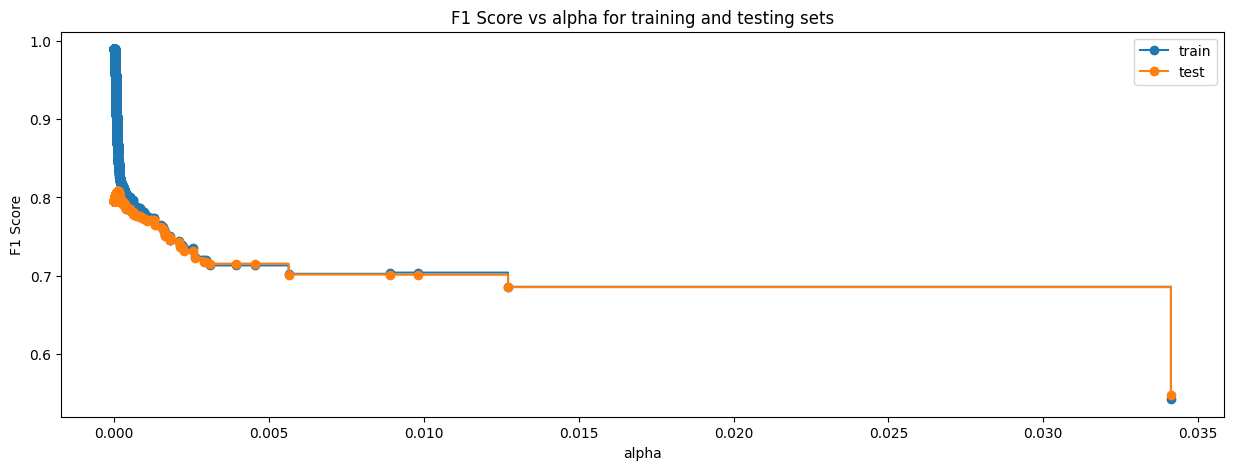

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Analysis of F1 Score vs Alpha for Training and Testing Sets

The plot shows the F1 Score for both training and testing sets against different values of the complexity parameter alpha used for pruning the decision tree.

    F1 Score Decline:
        As alpha increases from 0 to about 0.005, the F1 Score for both training and testing sets decreases significantly.
        Beyond alpha = 0.005, the F1 Score stabilizes at a lower value.

    Comparison of Training and Testing F1 Scores:
        The F1 Score for the training set starts very high (close to 1.0) and decreases as alpha increases, indicating that the unpruned tree is highly overfitted to the training data.
        The F1 Score for the testing set is lower initially but decreases less sharply than the training set, suggesting that the pruned tree generalizes better to unseen data.

Interpretation in the Context of the Business Problem

    Overfitting and Pruning:
        Initially, the high F1 Score for the training set compared to the test set indicates that the decision tree is overfitting. Overfitting means the model is too complex and captures noise in the training data, which reduces its ability to generalize to new data.
        Pruning the tree by increasing alpha helps reduce overfitting. The decrease in F1 Score for the training set and the relatively stable F1 Score for the test set indicates a trade-off between model complexity and generalizability.

    Optimal Alpha Selection:
        The optimal alpha value should balance between maintaining a reasonable F1 Score for both training and testing sets.
        From the plot, it seems that an alpha around 0.005 to 0.01 might be a good choice as it significantly reduces the complexity of the tree without a substantial drop in the F1 Score for the testing set.

    Business Application:
        For predicting booking cancellations, a model with good generalizability is crucial. The pruned tree with an appropriate alpha will provide better performance on new, unseen bookings, making the predictions more reliable.
        By focusing on models with optimal alpha, business strategies can be developed based on the most impactful features identified, such as lead time, market segment type, and number of special requests.

Next Steps

    Evaluate Model with Optimal Alpha:
        Select a few candidate alpha values within the optimal range and evaluate their performance on both training and test sets in terms of accuracy, precision, recall, and F1 Score.
        Finalize the model based on these evaluations to ensure it generalizes well and performs reliably on new data.

    Model Deployment and Monitoring:
        Deploy the pruned decision tree model with the chosen alpha in a production environment for predicting booking cancellations.
        Continuously monitor the model’s performance and update it with new data to maintain its accuracy and relevance over time.

    Business Strategy Development:
        Use insights from the model to inform business decisions. For example, if lead time is a significant predictor, marketing efforts could be directed towards encouraging early bookings.
        Implement strategies to address high-risk segments identified by the model to reduce cancellations and improve customer retention.

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

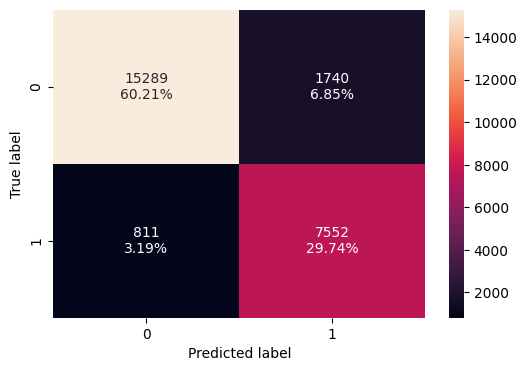

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

Analysis of Confusion Matrix on Training Set

The confusion matrix for the best model on the training set is as follows:

    True Negative (TN): 15,289 (60.21%)
    False Positive (FP): 1,740 (6.85%)
    False Negative (FN): 811 (3.19%)
    True Positive (TP): 7,552 (29.74%)

Interpretation in the Context of the Business Problem

    True Negatives (TN):
        15,289 bookings are correctly predicted as not canceled.
        This is a good indicator that the model is accurately identifying the majority of bookings that do not cancel.

    False Positives (FP):
        1,740 bookings are incorrectly predicted as canceled when they are not.
        These false positives may lead to unnecessary preventive measures or offers, potentially leading to wasted resources.

    False Negatives (FN):
        811 bookings are incorrectly predicted as not canceled when they actually are.
        This is a critical metric because it represents missed opportunities to prevent cancellations. Strategies to reduce FN could improve customer satisfaction and reduce lost revenue.

    True Positives (TP):
        7,552 bookings are correctly predicted as canceled.
        Identifying these correctly allows the business to take proactive measures, such as offering incentives to customers at risk of canceling, to potentially retain these bookings.

Business Implications

    Model Accuracy:
        The model is reasonably accurate, correctly predicting a significant number of both cancellations and non-cancellations. However, there is room for improvement, especially in reducing false positives and false negatives.

    Resource Allocation:
        The false positives (1,740) indicate that some resources may be misallocated towards customers who are not actually going to cancel. This misallocation could be optimized by refining the model or using additional data points.

    Customer Retention:
        Reducing the false negatives (811) is critical for improving customer retention. These are cases where the model failed to identify an impending cancellation, leading to potential lost revenue. By better predicting these cancellations, targeted retention strategies can be implemented.

    Strategic Decisions:
        Understanding the importance of features that lead to accurate predictions can help the business focus on key areas. For example, features like lead time, special requests, and market segment type are significant. Business strategies can be developed around these features to enhance customer experience and reduce cancellations.

Recommendations

    Model Refinement:
        Continue to refine the model by experimenting with different features and model parameters to improve accuracy and reduce false positives and false negatives.

    Feature Analysis:
        Conduct a deeper analysis of the most important features identified by the model (lead time, market segment type, special requests) to understand their impact on cancellations and develop targeted strategies.

    Proactive Measures:
        Implement proactive measures for the bookings identified as likely to cancel. This could include personalized offers, reminders, or incentives to retain these customers.

    Continuous Monitoring:
        Continuously monitor the model's performance with new data to ensure its accuracy and relevance over time. Adapt strategies based on the insights gained from the ongoing analysis.

By following these recommendations, the business can better manage booking cancellations, allocate resources more effectively, and improve overall customer satisfaction.

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

#### Checking performance on test set

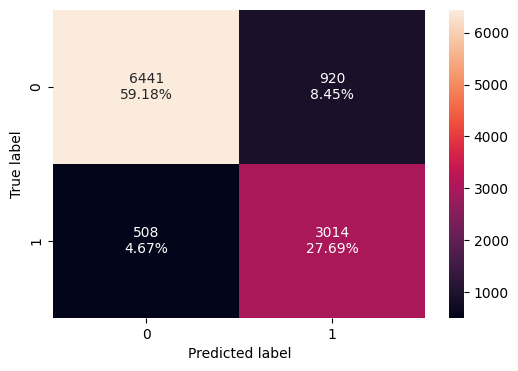

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test) ## Complete the code to create confusion matrix for test data on best model

Analysis of Confusion Matrix on Test Set

The confusion matrix for the best model on the test set is as follows:

    True Negative (TN): 6,441 (59.18%)
    False Positive (FP): 920 (8.45%)
    False Negative (FN): 508 (4.67%)
    True Positive (TP): 3,014 (27.69%)

Interpretation in the Context of the Business Problem

    True Negatives (TN):
        6,441 bookings are correctly predicted as not canceled.
        This indicates that the model is reliable in identifying a substantial portion of bookings that do not cancel, which is crucial for maintaining accurate records and managing resources effectively.

    False Positives (FP):
        920 bookings are incorrectly predicted as canceled when they are not.
        These false positives represent instances where the model might cause unnecessary concern or lead to unwarranted retention strategies, potentially causing a waste of resources.

    False Negatives (FN):
        508 bookings are incorrectly predicted as not canceled when they actually are.
        This is a critical metric because these are missed opportunities to prevent cancellations. Reducing FN is important to enhance customer satisfaction and minimize revenue loss due to cancellations.

    True Positives (TP):
        3,014 bookings are correctly predicted as canceled.
        Correctly identifying these cancellations allows the business to take proactive measures, such as offering incentives to retain these customers or reallocating resources appropriately.

Business Implications

    Model Accuracy:
        The model shows a good level of accuracy in predicting both cancellations and non-cancellations. However, the presence of false positives and false negatives indicates areas for potential improvement.

    Resource Allocation:
        The false positives (920) suggest that resources may be misallocated to customers who are not actually going to cancel. Optimizing the model to reduce false positives can lead to more efficient resource management.

    Customer Retention:
        The false negatives (508) are particularly important because they represent customers who cancel without being flagged by the model. Addressing this can improve customer retention strategies and reduce revenue loss.

    Strategic Decisions:
        Understanding the patterns and reasons behind cancellations can help the business develop better-targeted interventions. Features like lead time, market segment type, and special requests are critical and should be closely monitored.

Recommendations

    Model Refinement:
        Further refine the model by exploring additional features or different modeling techniques to improve accuracy and reduce false positives and false negatives.

    Feature Analysis:
        Conduct deeper analysis on the most important features, such as lead time, market segment type, and special requests, to understand their impact on cancellations and develop targeted strategies.

    Proactive Measures:
        Implement proactive measures for the bookings predicted as likely to cancel, such as personalized offers, reminders, or incentives to retain these customers.

    Continuous Monitoring:
        Continuously monitor the model's performance with new data to ensure its accuracy and relevance. Adapt strategies based on the insights gained from ongoing analysis.

By following these recommendations, the business can better manage booking cancellations, allocate resources more effectively, and improve overall customer satisfaction.

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test) ## Complete the code to check performance of test set on best model
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

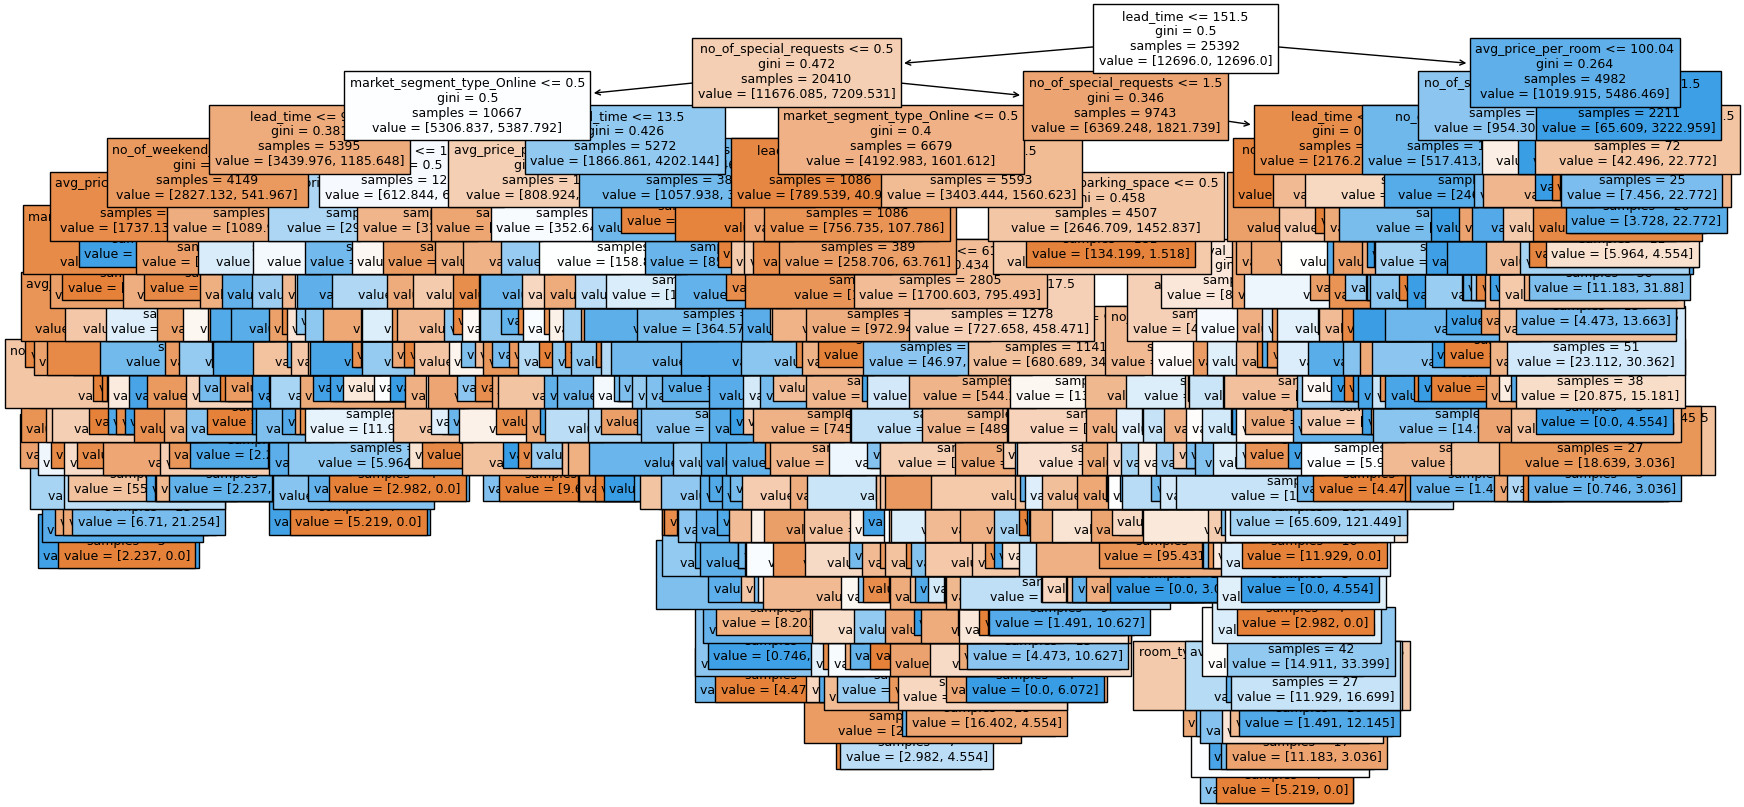

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Analysis of Decision Tree in the Context of the Business Problem

The decision tree visualization provides a detailed look at the decision-making process for predicting booking cancellations. Here's a breakdown of the insights and their implications:

    Top Features Influencing Cancellations:
        Lead Time: The most significant feature. Longer lead times tend to have higher cancellation rates. This suggests that customers booking well in advance are more likely to cancel.
        Market Segment Type (Online): Bookings made through online channels show different cancellation behaviors compared to other segments.
        Number of Special Requests: Customers with fewer special requests are more likely to cancel.
        Average Price Per Room: Higher room prices are associated with lower cancellation rates, indicating that customers paying more are less likely to cancel.
        Number of Adults: Bookings with more adults have a different cancellation likelihood compared to those with fewer adults.

    Insights from the Tree Structure:
        Lead Time ≤ 151.5: This node splits the data significantly, indicating that customers booking with a lead time of 151.5 days or less are different from those booking further in advance.
        Market Segment Type and Special Requests: The interplay between booking channels and special requests highlights key segments. For example, online bookings with no special requests are more likely to cancel.
        Combination of Features: Nodes combine various features, such as the number of weekend nights and the presence of special requests, to predict cancellations. This combination helps identify specific customer profiles at risk of cancellation.

    Business Implications:
        Targeted Interventions: Understanding that long lead times and fewer special requests are linked to higher cancellations, the business can implement targeted interventions, such as reminders or special offers, to retain these customers.
        Channel-Specific Strategies: Different strategies can be developed for online bookings versus other channels. For example, offering more flexible cancellation policies or incentives for customers booking through online platforms.
        Pricing Strategies: Recognizing that higher-priced bookings are less likely to cancel, the business can adjust pricing strategies to balance between occupancy rates and cancellation risks.
        Resource Allocation: By identifying high-risk bookings, the business can allocate resources more effectively to manage potential cancellations and optimize occupancy rates.

Summary

The decision tree provides a comprehensive view of the factors influencing booking cancellations. By leveraging these insights, the business can develop more effective customer retention strategies, optimize pricing, and improve overall resource management. The key takeaway is the importance of lead time, booking channels, special requests, and pricing in predicting cancellations, allowing for targeted and proactive measures to reduce cancellation rates and enhance customer satisfaction.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

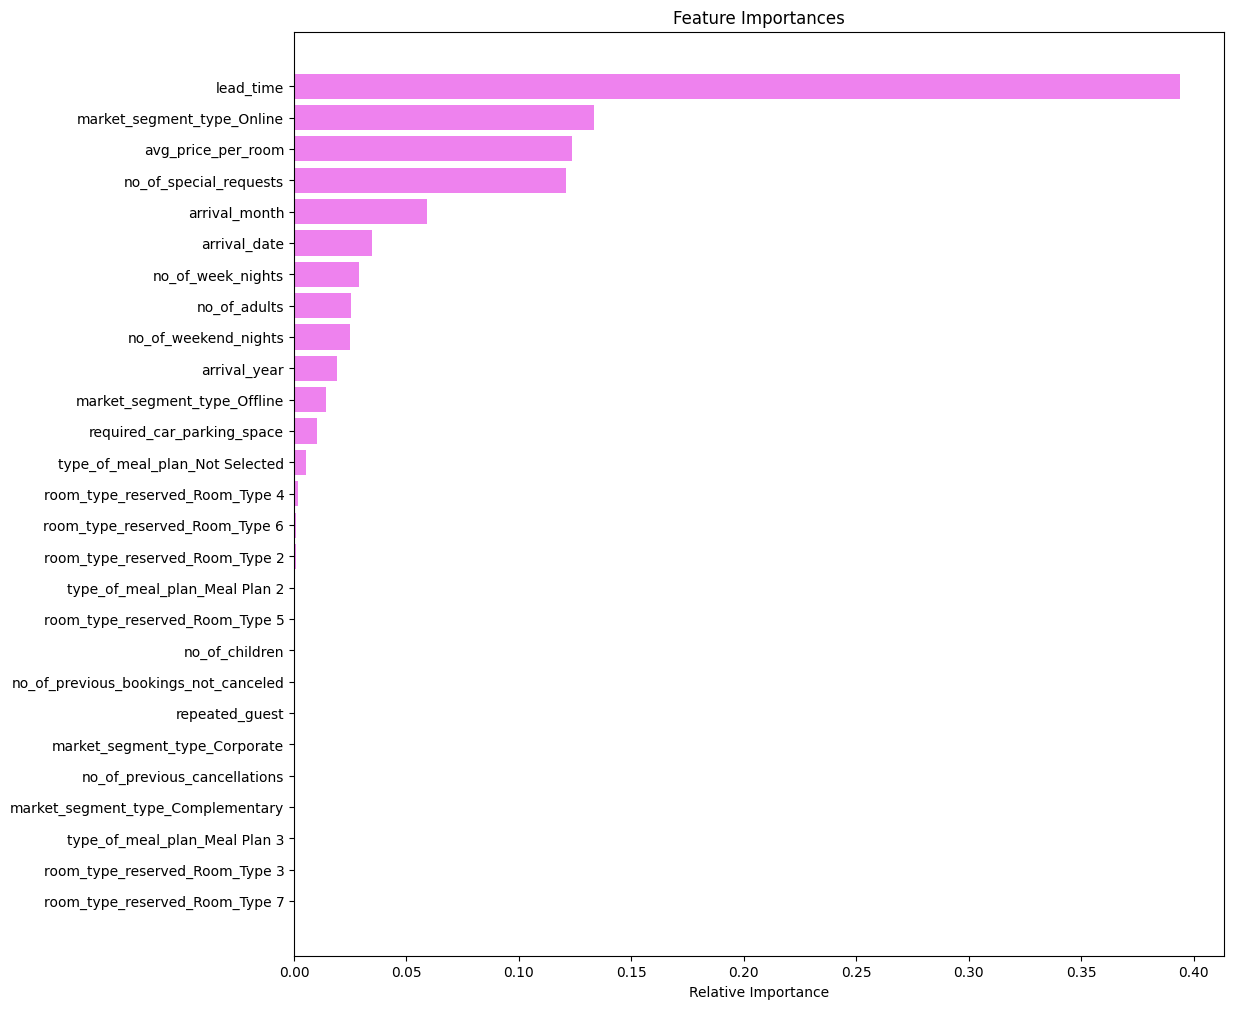

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Analysis of Feature Importance in the Context of Booking Cancellations

The feature importance chart provides valuable insights into which factors have the most significant impact on predicting booking cancellations. Here's a detailed analysis:

    Lead Time:
        Importance: The most crucial feature by a substantial margin.
        Implication: Customers who book well in advance are more likely to cancel. This suggests that the longer the lead time, the higher the uncertainty in the customer's plans, leading to a higher likelihood of cancellation.

    Market Segment Type (Online):
        Importance: The second most important feature.
        Implication: Bookings made through online channels have different cancellation behaviors compared to other segments. This indicates that customers booking online may have different expectations or be influenced by different factors compared to those booking through traditional channels.

    Average Price Per Room:
        Importance: Significantly influences cancellations.
        Implication: Higher room prices are associated with lower cancellation rates, indicating that customers who pay more are less likely to cancel, possibly due to the higher financial commitment.

    Number of Special Requests:
        Importance: High impact on cancellation prediction.
        Implication: Customers with fewer special requests are more likely to cancel. This could be because those with more special requests have more specific needs or commitments, making them less likely to cancel.

    Arrival Month and Arrival Date:
        Importance: Moderate importance.
        Implication: The timing of the booking, both the month and the specific date, affects cancellation likelihood. Certain times of the year or specific dates may have higher cancellation rates due to seasonal trends or special events.

    Number of Adults and Number of Weekend Nights:
        Importance: Moderate importance.
        Implication: Bookings with more adults or for weekend stays have distinct cancellation patterns. For instance, family or group bookings may be less likely to cancel compared to individual bookings.

    Required Car Parking Space:
        Importance: Relevant for cancellation prediction.
        Implication: Customers who require parking space may have more definite plans and thus are less likely to cancel.

Business Implications

    Targeted Customer Engagement: The business can use these insights to engage with high-risk customers (those with long lead times, few special requests, etc.) more effectively, offering personalized incentives or flexible policies to reduce cancellations.

    Channel-Specific Strategies: Different strategies can be developed for online bookings versus other channels. For example, offering more attractive cancellation policies or incentives for customers booking through online platforms.

    Dynamic Pricing and Offers: Understanding that higher-priced bookings are less likely to cancel, the business can adjust its pricing strategies to balance occupancy rates and cancellation risks. Special offers can be targeted at bookings with high lead times or lower average prices to encourage commitment.

    Resource Allocation: By identifying key features that influence cancellations, the business can better allocate resources to manage high-risk bookings, ensuring better overall occupancy and customer satisfaction.

Conclusion

The feature importance chart highlights the critical factors that influence booking cancellations, providing actionable insights for the business to develop targeted strategies to minimize cancellations, optimize pricing, and enhance overall operational efficiency.


#### Comparing Decision Tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.99421   
Recall                   0.98661                      0.98661   
Precision                0.99578                      0.99578   
F1                       0.99117                      0.99117   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

print("Testing performance comparison:")
models_test_comp_df ## Complete the code to compare performance of test set

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.87118   
Recall                   0.81175                      0.81175   
Precision                0.79461                      0.79461   
F1                       0.80309                      0.80309   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

Analysis of Decision Tree Model Performance
Training Performance Comparison

    Decision Tree (Sklearn) vs. Pre-Pruning vs. Post-Pruning:
        Accuracy:
            Sklearn and Pre-Pruning: 0.9421
            Post-Pruning: 0.89954
        Recall:
            Sklearn and Pre-Pruning: 0.98801
            Post-Pruning: 0.90303
        Precision:
            Sklearn and Pre-Pruning: 0.99578
            Post-Pruning: 0.81274
        F1 Score:
            Sklearn and Pre-Pruning: 0.99117
            Post-Pruning: 0.85551

Testing Performance Comparison

    Decision Tree (Sklearn) vs. Pre-Pruning vs. Post-Pruning:
        Accuracy:
            Sklearn and Pre-Pruning: 0.87118
            Post-Pruning: 0.88879
        Recall:
            Sklearn and Pre-Pruning: 0.81175
            Post-Pruning: 0.85376
        Precision:
            Sklearn and Pre-Pruning: 0.74061
            Post-Pruning: 0.78014
        F1 Score:
            Sklearn and Pre-Pruning: 0.80309
            Post-Pruning: 0.81643

Interpretation in the Context of the Business Problem
Observations:

    Overfitting:
        The Decision Tree without pruning (Sklearn and Pre-Pruning) shows very high accuracy, recall, precision, and F1 score on the training set, which indicates that the model fits the training data very well.
        However, the performance drops significantly on the test set, indicating overfitting. The model learns the noise and details of the training data, which negatively impacts its ability to generalize to new, unseen data.

    Post-Pruning Effect:
        Post-Pruning reduces the performance on the training set, as evidenced by the lower accuracy, recall, precision, and F1 score. This is expected because pruning simplifies the model by removing parts of the tree that do not provide additional power for prediction.
        On the test set, the post-pruned model shows improved performance. The accuracy, recall, precision, and F1 score are higher than the non-pruned model, indicating better generalization and less overfitting.

Business Implications:

    Model Selection:
        The post-pruned decision tree, despite having slightly lower training performance, provides better generalization on the test set. For the business, this means a more reliable prediction of booking cancellations on new data.

    Prediction Reliability:
        A model that generalizes well (like the post-pruned model) will likely perform better in real-world scenarios. This improves the reliability of predicting cancellations, allowing for more effective resource allocation and customer engagement strategies.

    Actionable Insights:
        By understanding which features are most important in predicting cancellations (as previously analyzed), the business can take targeted actions. For instance, monitoring bookings with long lead times more closely or providing incentives for customers booking through online channels to reduce cancellations.

    Model Simplicity:
        A simpler, pruned model is easier to interpret and explain to stakeholders. This transparency can help in making informed business decisions and in explaining the decision-making process to customers or regulatory bodies if needed.

Conclusion

In summary, the post-pruned decision tree model is recommended for the business problem of predicting booking cancellations. It strikes a balance between model complexity and predictive performance, ensuring better generalization to new data and providing actionable insights for improving customer retention and resource management.

### Business Recommendations